# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l2_active/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active/2035381640_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active/1878413714_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active/1795225096_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active/790094605_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active/638486177_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.4.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.5.json
Using /home/ashinde/PhD/CaffineBra

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l2_active/2035381640_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, failure)]
1:[(HostObs, none), (ActionResult, success)]
2:[(HostObs, user_files), (ActionResult, failure)]
3:[(HostObs, user_files), (ActionResult, success)]


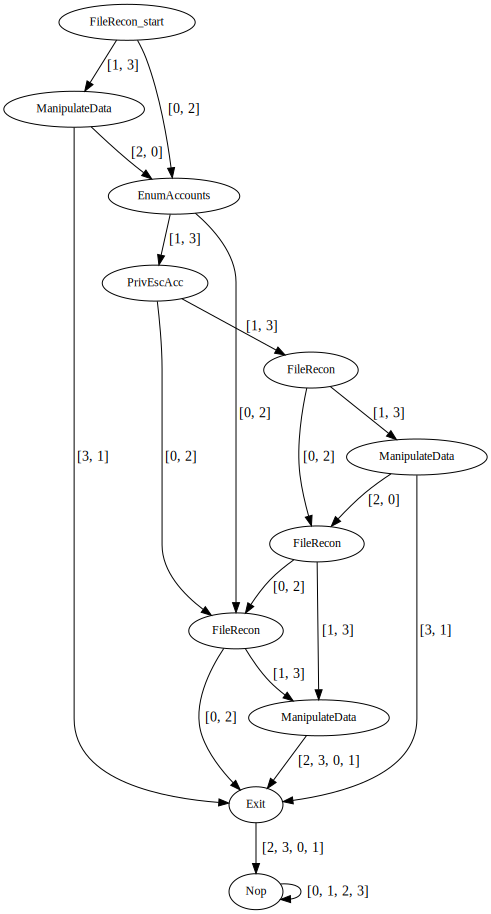

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l2_active/1878413714_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, failure)]
1:[(HostObs, none), (ActionResult, success)]
2:[(HostObs, user_files), (ActionResult, failure)]
3:[(HostObs, user_files), (ActionResult, success)]


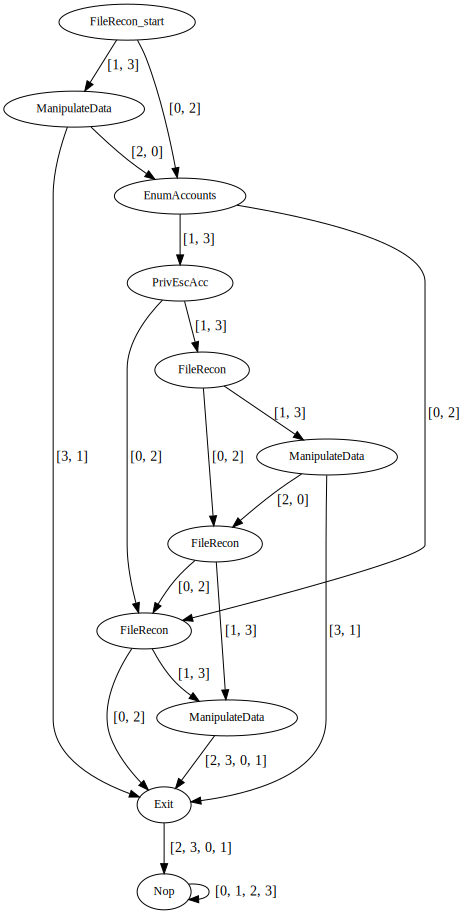

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l2_active/1795225096_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


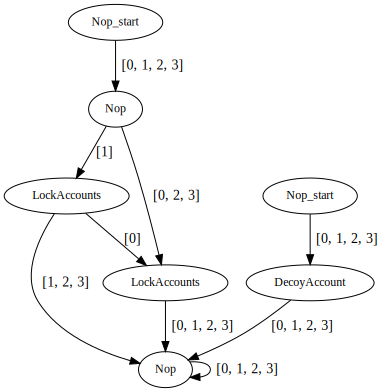

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l2_active/790094605_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


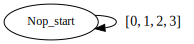

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l2_active/638486177_attl2_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, success), (DefenseObs, acc_policy_change)]
1:[(HostObs, none), (ActionResult, success), (DefenseObs, none)]
2:[(HostObs, none), (ActionResult, success), (DefenseObs, perms_change)]
3:[(HostObs, user_files), (ActionResult, failure), (DefenseObs, acc_policy_change)]
4:[(HostObs, user_files), (ActionResult, failure), (DefenseObs, none)]
5:[(HostObs, user_files), (ActionResult, failure), (DefenseObs, perms_change)]
6:[(HostObs, user_files), (ActionResult, success), (DefenseObs, acc_policy_change)]
7:[(HostObs, user_files), (ActionResult, success), (DefenseObs, none)]
8:[(HostObs, user_files), (ActionResult, success), (DefenseObs, perms_change)]
9:[(HostObs, none), (ActionResult, failure), (DefenseObs, acc_policy_change)]
10:[(HostObs, none), (ActionResult, failure), (DefenseObs, none)]
11:[(HostObs, none), (ActionResult, failure), (DefenseObs,

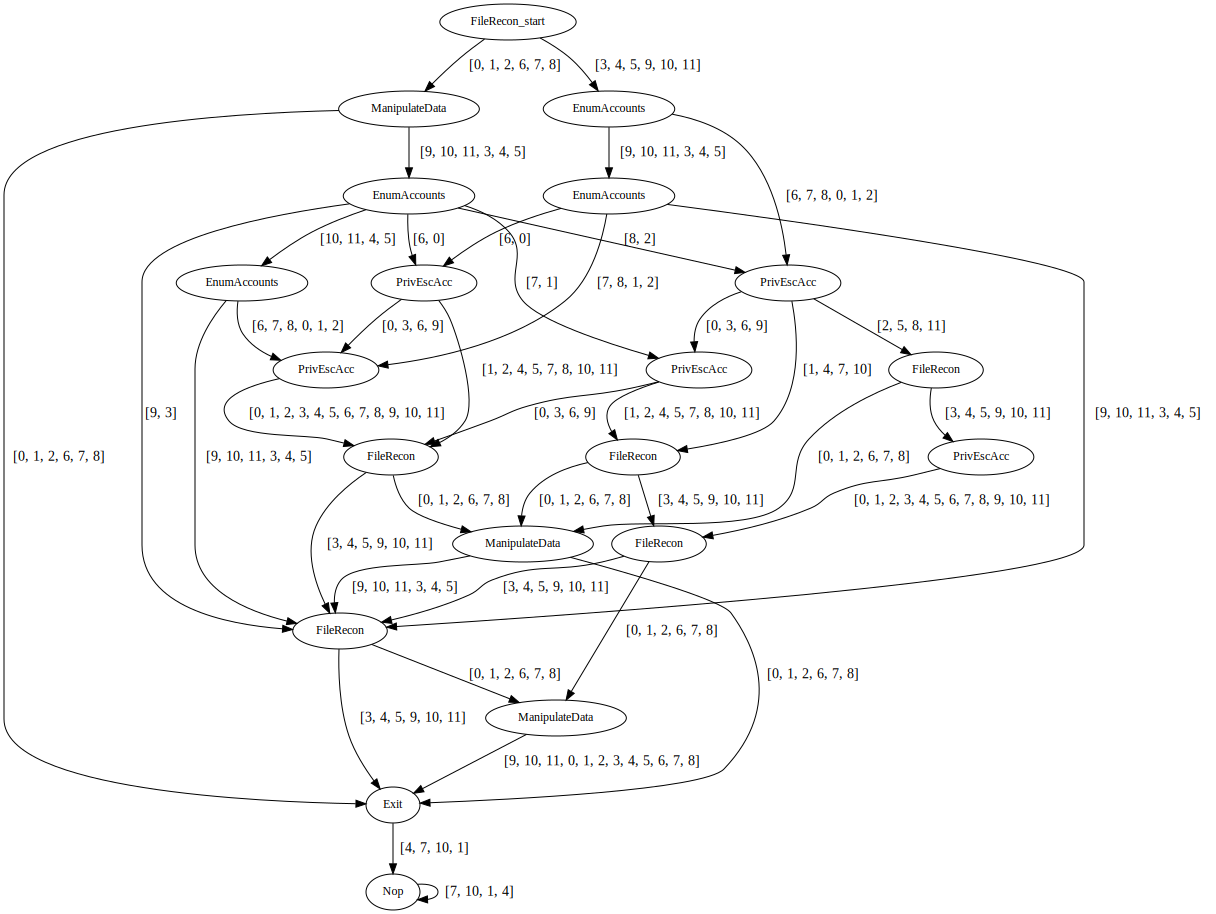

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.577778                        0.422222   
3                         0.472629                        0.527371   
4                         0.485262                        0.514738   
5                         0.491216                        0.508784   
6                         0.491216                        0.508784   
7                         0.491216                        0.508784   
8                         0.491216                        0.508784   
9                         0.491216                        0.508784   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           failure   
7                         none                           failure   
8                         none                           success   
9                   user_files                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

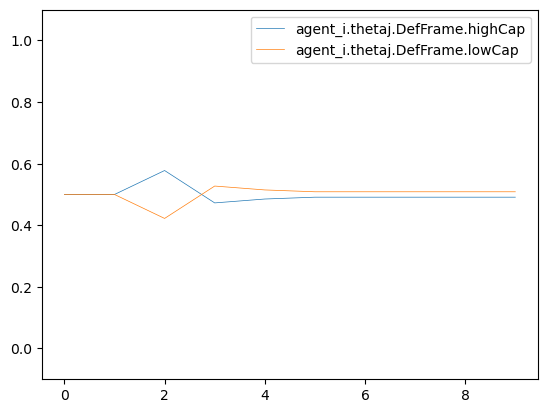

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                       file_write
3                               1.0                   login_activity
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                   login_activity
9                               1.0                             none

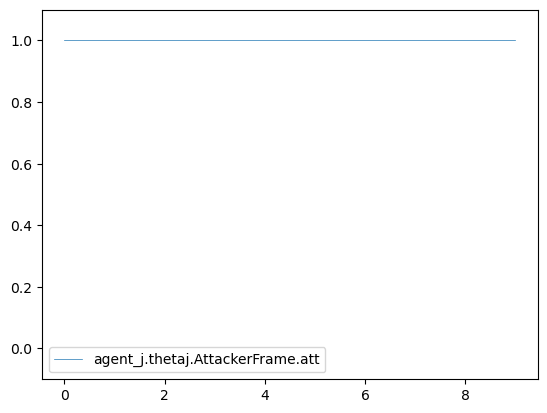

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0      PrivEscAcc            Nop  
3                      1.0       FileRecon            Nop  
4                      1.0  ManipulateData            Nop  
5                      1.0            Exit            Nop  
6                      1.0             Nop            Nop  
7                      1.0             Nop            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

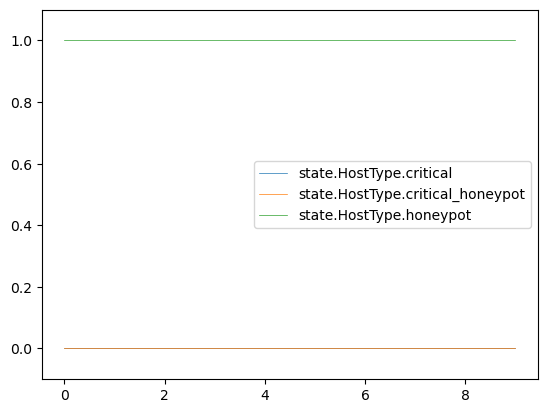

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           failure   
7                         none                           failure   
8                         none                           success   
9                   user_files                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

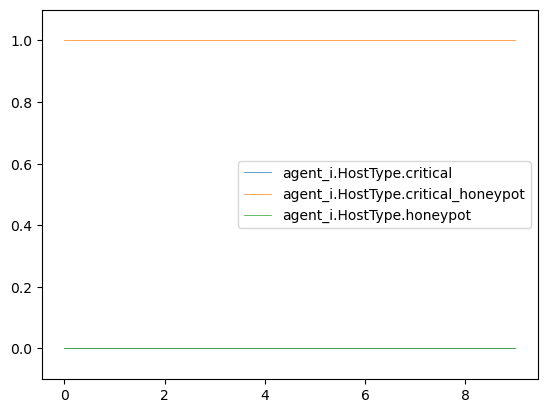

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                       file_write  
3                   login_activity  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                             none

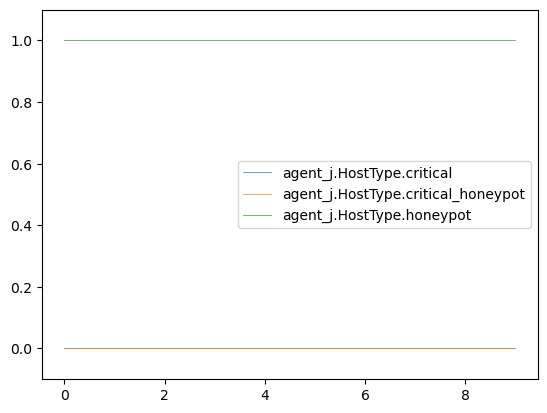

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0      PrivEscAcc            Nop
3                 1.0                  0.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 0.0                  1.0             Nop            Nop
7                 0.0                  1.0             Nop            Nop
8                 0.0                  1.0             Nop            Nop
9                 0.0                  1.0             Nop            Nop

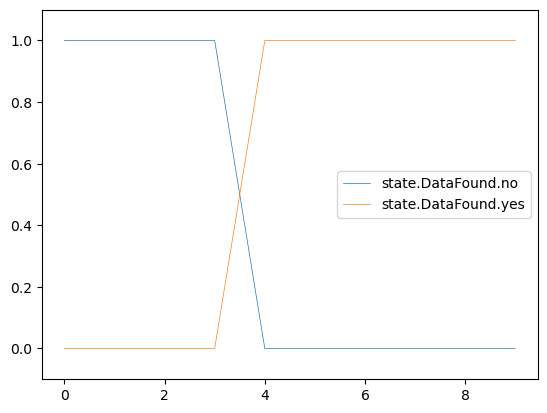

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.234274               0.765727  ManipulateData            Nop   
5              0.000306               0.999694            Exit            Nop   
6              0.000306               0.999694             Nop            Nop   
7              0.000306               0.999694             Nop            Nop   
8              0.000306               0.999694             Nop            Nop   
9              0.000306               0.999694             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           failure   
7                         none                           failure   
8                         none                           success   
9                   user_files                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

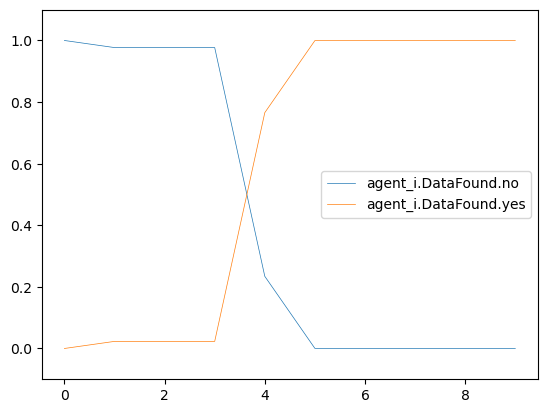

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.909160               0.090840            Nop  ManipulateData   
5              0.290467               0.709533            Nop            Exit   
6              0.239545               0.760455            Nop             Nop   
7              0.235982               0.764018            Nop             Nop   
8              0.236185               0.763815            Nop             Nop   
9              0.236185               0.763815            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                       file_write  
3                   login_activity  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                             none

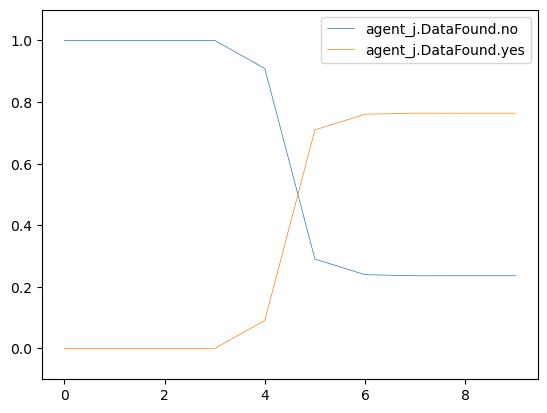

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0      PrivEscAcc   
3                     1.0                     0.0       FileRecon   
4                     1.0                     0.0  ManipulateData   
5                     1.0                     0.0            Exit   
6                     1.0                     0.0             Nop   
7                     1.0                     0.0             Nop   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

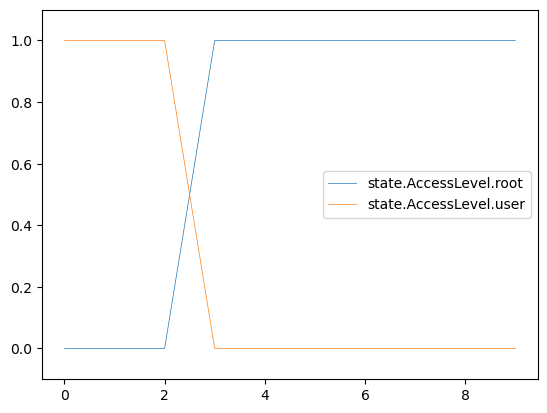

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.874325                  0.125675       FileRecon   
4                  0.932575                  0.067425  ManipulateData   
5                  0.959813                  0.040187            Exit   
6                  0.959813                  0.040187             Nop   
7                  0.959813                  0.040187             Nop   
8                  0.959813                  0.040187             Nop   
9                  0.959813                  0.040187             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           success                            none  
4                           success                            none  
5                           success                            none  
6                           failure                            none  
7                           failure                            none  
8                           success                            none  
9                           success                            none

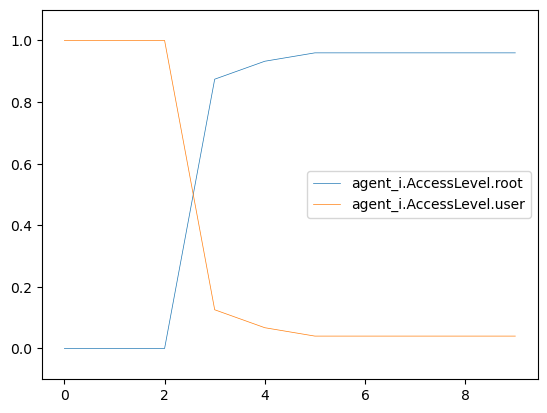

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.354375                  0.645625            Nop   
4                  0.835597                  0.164403            Nop   
5                  0.870498                  0.129502            Nop   
6                  0.775421                  0.224579            Nop   
7                  0.765710                  0.234290            Nop   
8                  0.765328                  0.234672            Nop   
9                  0.765328                  0.234672            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                       file_write  
2      PrivEscAcc                       file_write  
3       FileRecon                   login_activity  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                   login_activity  
9             Nop                             none

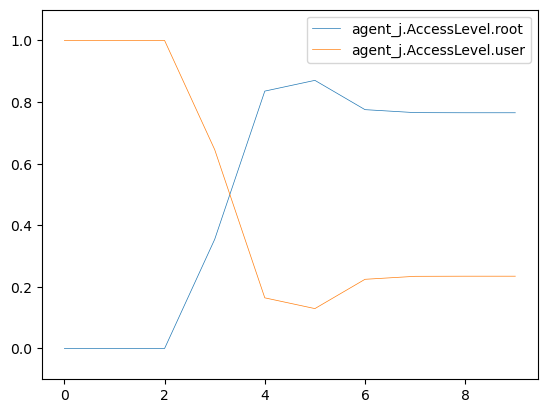

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

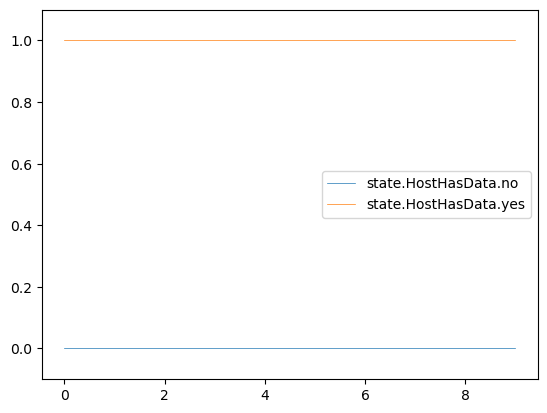

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.189091                 0.810909  ManipulateData   
5                0.000247                 0.999753            Exit   
6                0.000247                 0.999753             Nop   
7                0.000247                 0.999753             Nop   
8                0.000247                 0.999753             Nop   
9                0.000247                 0.999753             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           success                            none  
4                           success                            none  
5                           success                            none  
6                           failure                            none  
7                           failure                            none  
8                           success                            none  
9                           success                            none

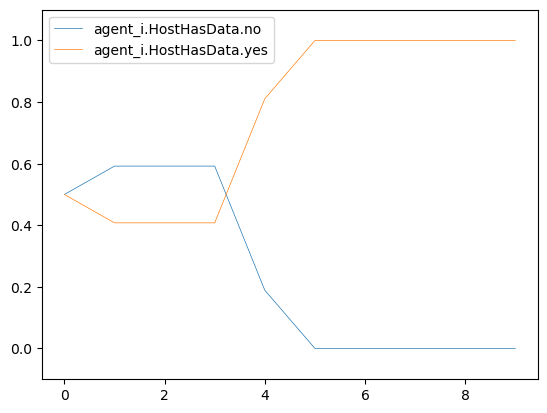

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                       file_write  
2      PrivEscAcc                       file_write  
3       FileRecon                   login_activity  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                   login_activity  
9             Nop                             none

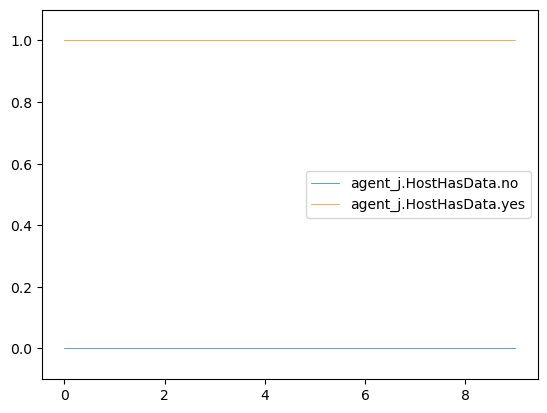

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0      PrivEscAcc            Nop
3                 0.0                  1.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 1.0                  0.0             Nop            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

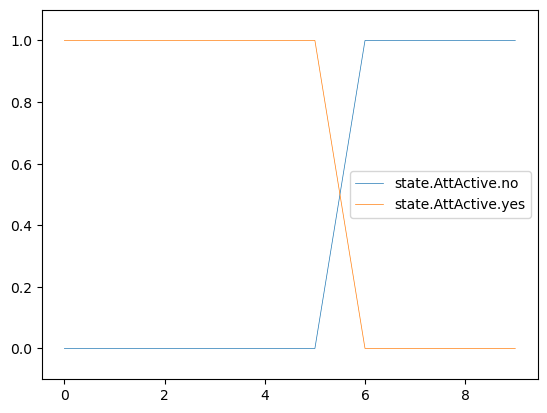

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           failure   
7                         none                           failure   
8                         none                           success   
9                   user_files                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

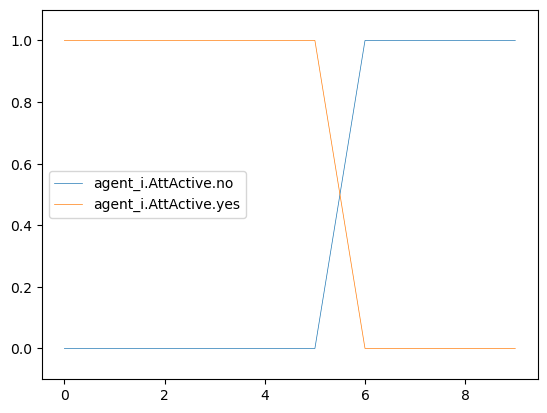

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000               1.000000            Nop       FileRecon   
1              0.000000               1.000000   DecoyAccount    EnumAccounts   
2              0.000000               1.000000            Nop      PrivEscAcc   
3              0.000438               0.999563            Nop       FileRecon   
4              0.063192               0.936808            Nop  ManipulateData   
5              0.080485               0.919516            Nop            Exit   
6              0.873380               0.126620            Nop             Nop   
7              0.992789               0.007211            Nop             Nop   
8              0.999728               0.000272            Nop             Nop   
9              0.999982               0.000018            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                       file_write  
3                   login_activity  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                             none

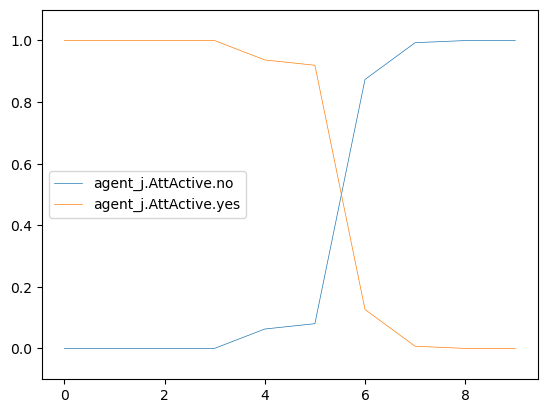

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

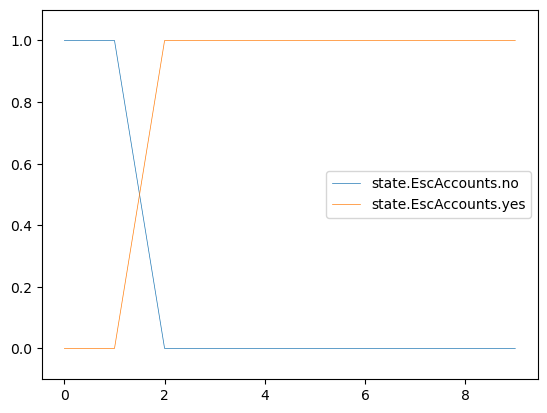

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.083333                 0.916667      PrivEscAcc   
3                0.071318                 0.928682       FileRecon   
4                0.038295                 0.961705  ManipulateData   
5                0.022825                 0.977175            Exit   
6                0.022825                 0.977175             Nop   
7                0.022825                 0.977175             Nop   
8                0.022825                 0.977175             Nop   
9                0.022825                 0.977175             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           success                            none  
4                           success                            none  
5                           success                            none  
6                           failure                            none  
7                           failure                            none  
8                           success                            none  
9                           success                            none

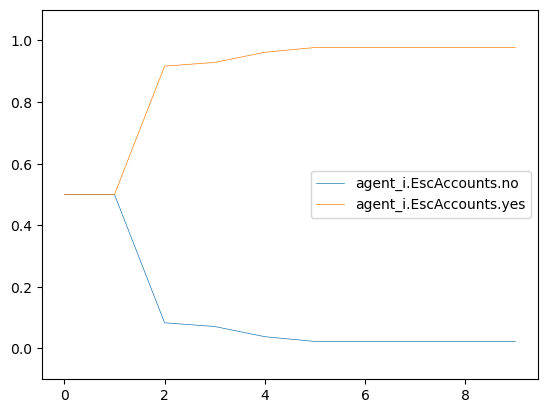

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                       file_write  
2      PrivEscAcc                       file_write  
3       FileRecon                   login_activity  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                   login_activity  
9             Nop                             none

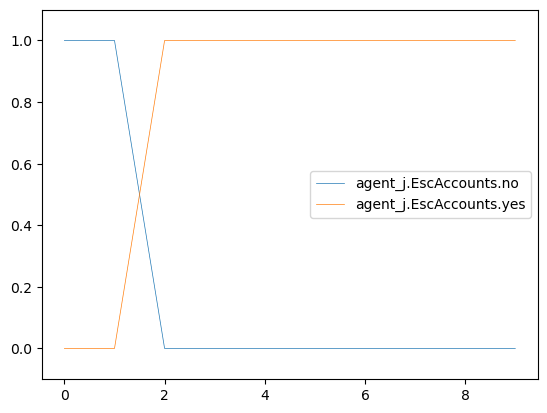

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                0.0                 1.0      PrivEscAcc            Nop
3                0.0                 1.0       FileRecon            Nop
4                0.0                 1.0  ManipulateData            Nop
5                0.0                 1.0            Exit            Nop
6                0.0                 1.0             Nop            Nop
7                0.0                 1.0             Nop            Nop
8                0.0                 1.0             Nop            Nop
9                0.0                 1.0             Nop            Nop

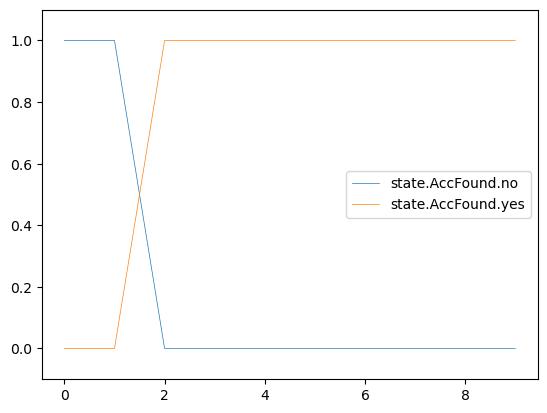

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.125000              0.875000      PrivEscAcc            Nop   
3             0.113531              0.886469       FileRecon            Nop   
4             0.060964              0.939036  ManipulateData            Nop   
5             0.036336              0.963664            Exit            Nop   
6             0.036336              0.963664             Nop            Nop   
7             0.036336              0.963664             Nop            Nop   
8             0.036336              0.963664             Nop            Nop   
9             0.036336              0.963664             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           failure   
7                         none                           failure   
8                         none                           success   
9                   user_files                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

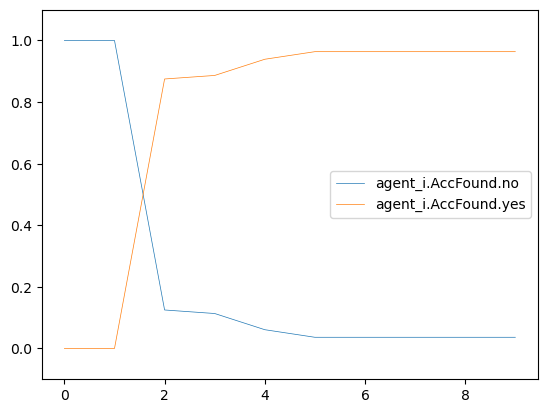

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.606250              0.393750            Nop      PrivEscAcc   
3             0.300306              0.699694            Nop       FileRecon   
4             0.138781              0.861219            Nop  ManipulateData   
5             0.108638              0.891362            Nop            Exit   
6             0.187864              0.812137            Nop             Nop   
7             0.195986              0.804014            Nop             Nop   
8             0.196306              0.803694            Nop             Nop   
9             0.196306              0.803694            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                       file_write  
3                   login_activity  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                             none

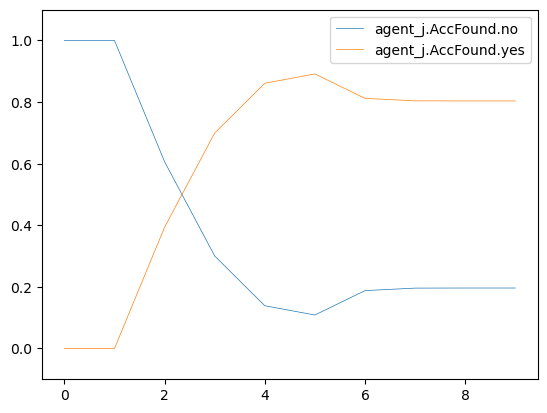

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0      PrivEscAcc            Nop
3                   1.0                   0.0       FileRecon            Nop
4                   1.0                   0.0  ManipulateData            Nop
5                   1.0                   0.0            Exit            Nop
6                   1.0                   0.0             Nop            Nop
7                   1.0                   0.0             Nop            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

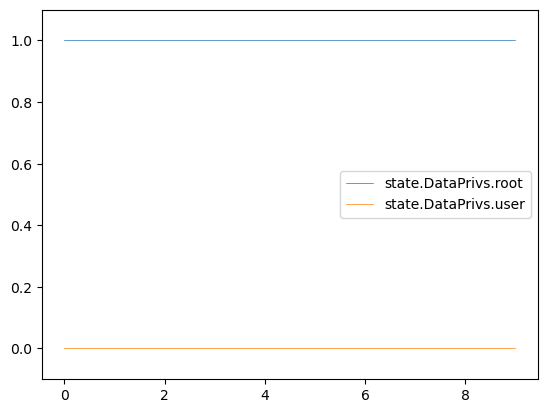

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895      PrivEscAcc   
3                0.592105                0.407895       FileRecon   
4                0.652072                0.347928  ManipulateData   
5                0.680171                0.319829            Exit   
6                0.680171                0.319829             Nop   
7                0.680171                0.319829             Nop   
8                0.680171                0.319829             Nop   
9                0.680171                0.319829             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           success                            none  
4                           success                            none  
5                           success                            none  
6                           failure                            none  
7                           failure                            none  
8                           success                            none  
9                           success                            none

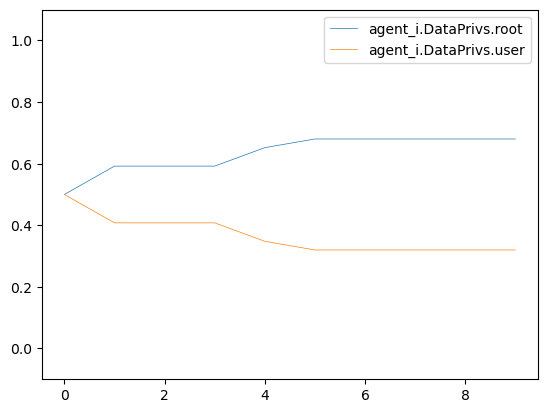

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                       file_write  
2      PrivEscAcc                       file_write  
3       FileRecon                   login_activity  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                   login_activity  
9             Nop                             none

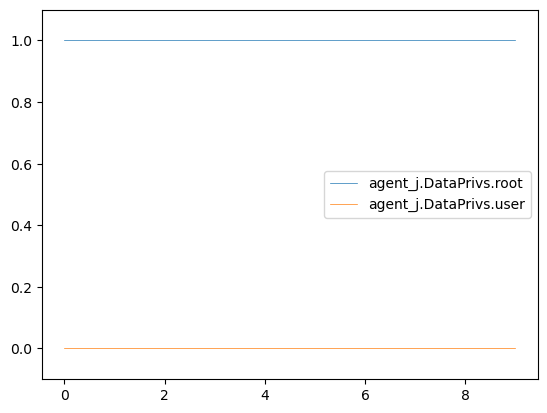

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0       FileRecon   
4                    1.0                     0.0  ManipulateData   
5                    0.0                     1.0            Exit   
6                    0.0                     1.0             Nop   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

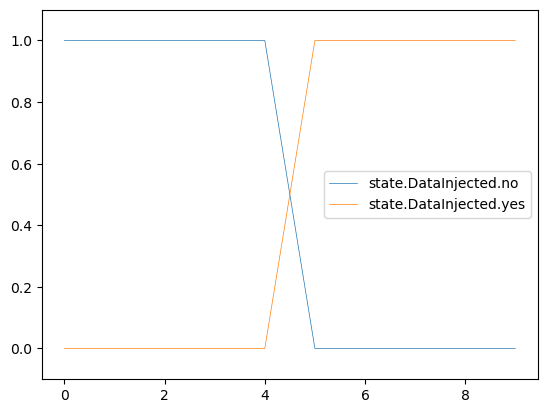

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000306                  0.999694            Exit   
6                 0.000306                  0.999694             Nop   
7                 0.000306                  0.999694             Nop   
8                 0.000306                  0.999694             Nop   
9                 0.000306                  0.999694             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           success                            none  
4                           success                            none  
5                           success                            none  
6                           failure                            none  
7                           failure                            none  
8                           success                            none  
9                           success                            none

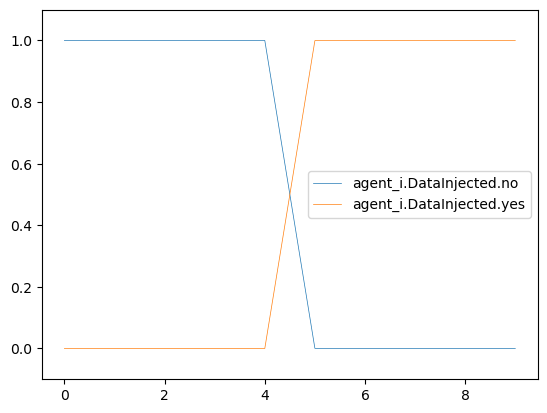

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.630840                  0.369160            Nop   
6                 0.273931                  0.726070            Nop   
7                 0.238059                  0.761941            Nop   
8                 0.236590                  0.763410            Nop   
9                 0.236573                  0.763427            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                       file_write  
2      PrivEscAcc                       file_write  
3       FileRecon                   login_activity  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                   login_activity  
9             Nop                             none

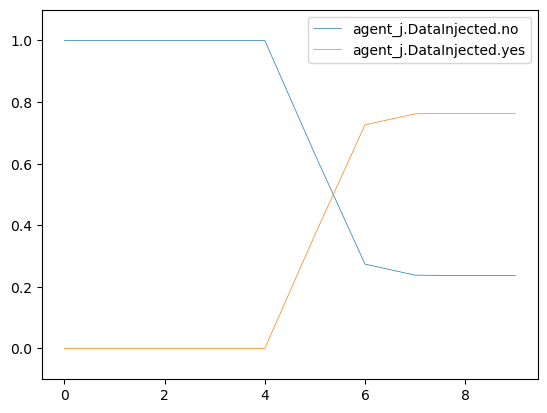

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.436364                        0.563636   
3                         0.120100                        0.879900   
4                         0.118676                        0.881324   
5                         0.118676                        0.881324   
6                         0.118676                        0.881324   
7                         0.118676                        0.881324   
8                         0.118676                        0.881324   
9                         0.118676                        0.881324   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

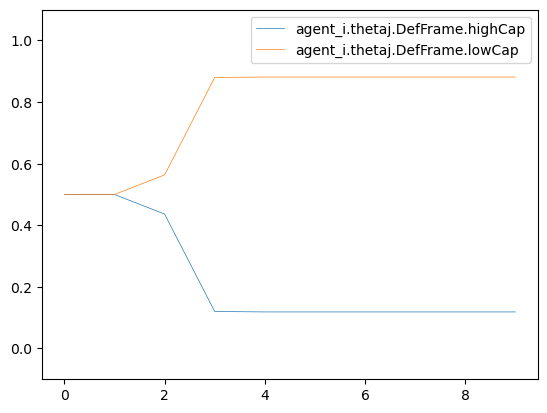

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                        file_enum
8                               1.0                             none
9                               1.0                             none

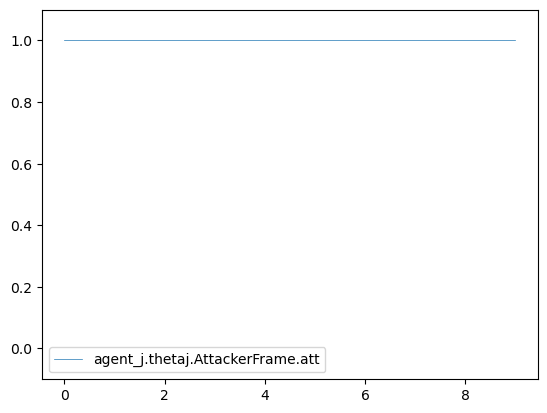

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0      FileRecon            Nop  
1                      1.0   EnumAccounts   DecoyAccount  
2                      1.0   EnumAccounts            Nop  
3                      1.0      FileRecon            Nop  
4                      1.0           Exit            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

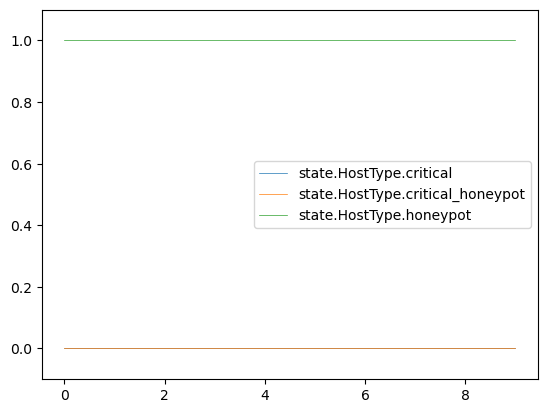

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        0.0      FileRecon            Nop   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0   EnumAccounts            Nop   
3                        0.0      FileRecon            Nop   
4                        0.0           Exit            Nop   
5                        0.0            Nop            Nop   
6                        0.0            Nop            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

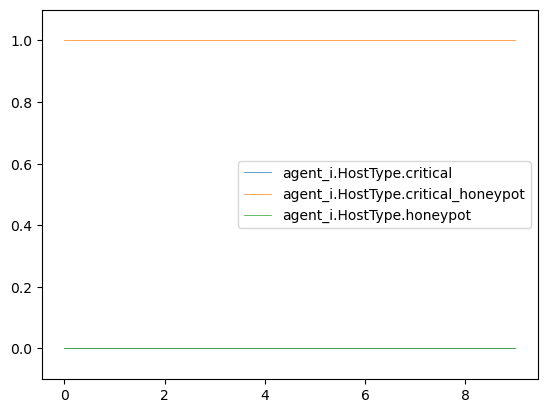

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        1.0            Nop      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0            Nop   EnumAccounts   
3                        1.0            Nop      FileRecon   
4                        1.0            Nop           Exit   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

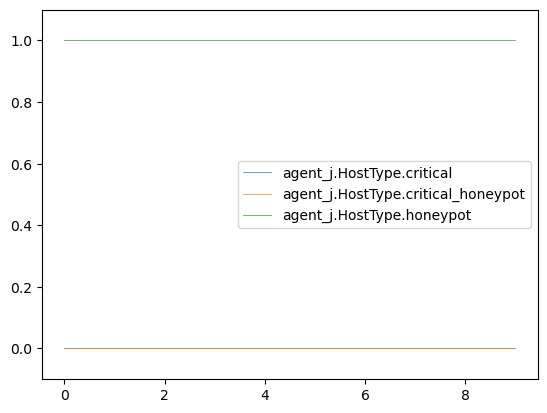

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0      FileRecon            Nop
1                 1.0                  0.0   EnumAccounts   DecoyAccount
2                 1.0                  0.0   EnumAccounts            Nop
3                 1.0                  0.0      FileRecon            Nop
4                 1.0                  0.0           Exit            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

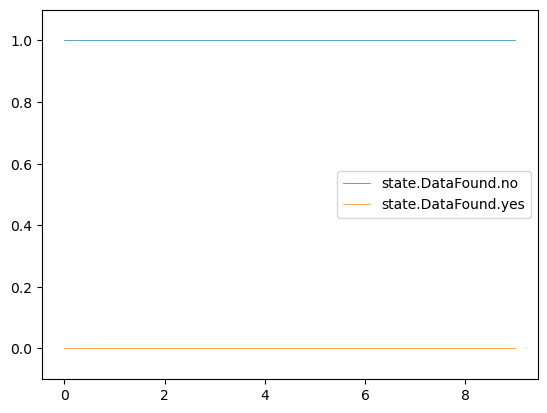

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.976974               0.023026   EnumAccounts   DecoyAccount   
2              0.976974               0.023026   EnumAccounts            Nop   
3              0.976974               0.023026      FileRecon            Nop   
4              0.989758               0.010242           Exit            Nop   
5              0.989758               0.010242            Nop            Nop   
6              0.989758               0.010242            Nop            Nop   
7              0.989758               0.010242            Nop            Nop   
8              0.989758               0.010242            Nop            Nop   
9              0.989758               0.010242            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

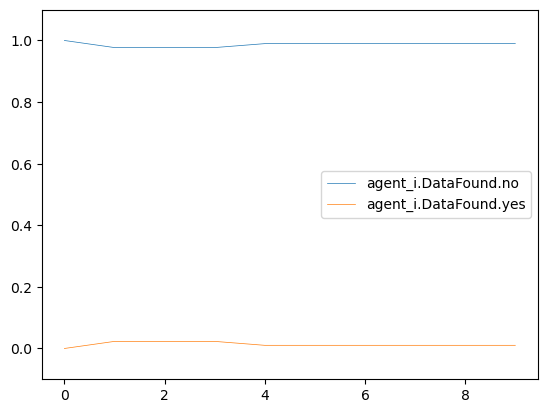

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000   DecoyAccount   EnumAccounts   
2              1.000000               0.000000            Nop   EnumAccounts   
3              1.000000               0.000000            Nop      FileRecon   
4              0.868835               0.131164            Nop           Exit   
5              0.941945               0.058055            Nop            Nop   
6              0.967261               0.032739            Nop            Nop   
7              0.968655               0.031345            Nop            Nop   
8              0.968621               0.031379            Nop            Nop   
9              0.968648               0.031352            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

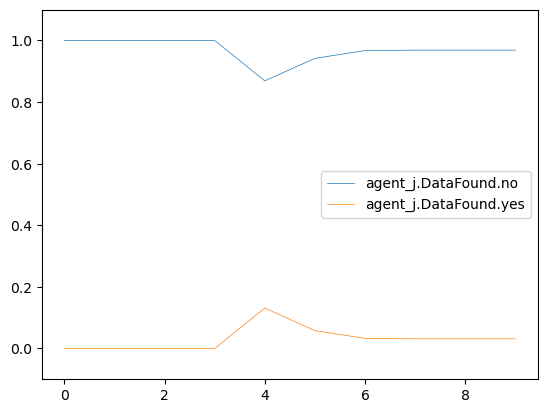

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0      FileRecon   
1                     0.0                     1.0   EnumAccounts   
2                     0.0                     1.0   EnumAccounts   
3                     0.0                     1.0      FileRecon   
4                     0.0                     1.0           Exit   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

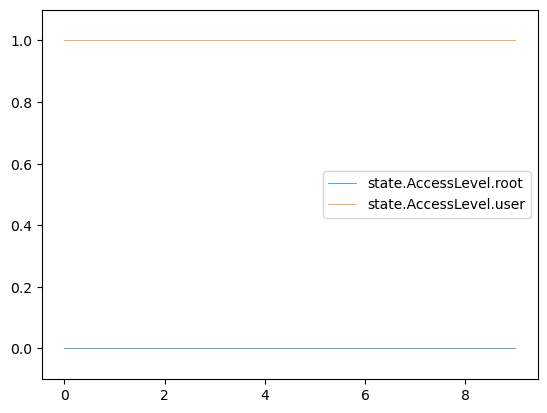

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0   EnumAccounts   
3                       0.0                       1.0      FileRecon   
4                       0.0                       1.0           Exit   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           failure                            none  
2                           failure                            none  
3                           failure                            none  
4                           failure                            none  
5                           success                            none  
6                           success                            none  
7                           success                            none  
8                           success                            none  
9                           success                            none

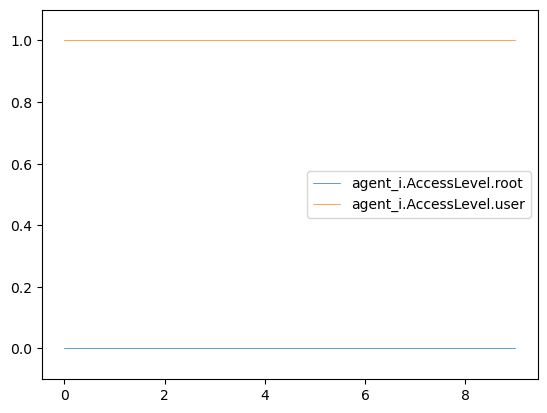

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.074294                  0.925706            Nop   
4                  0.332970                  0.667030            Nop   
5                  0.072068                  0.927933            Nop   
6                  0.033584                  0.966415            Nop   
7                  0.031635                  0.968365            Nop   
8                  0.031675                  0.968325            Nop   
9                  0.031647                  0.968353            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                       file_write  
2   EnumAccounts                        file_enum  
3      FileRecon                        file_enum  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

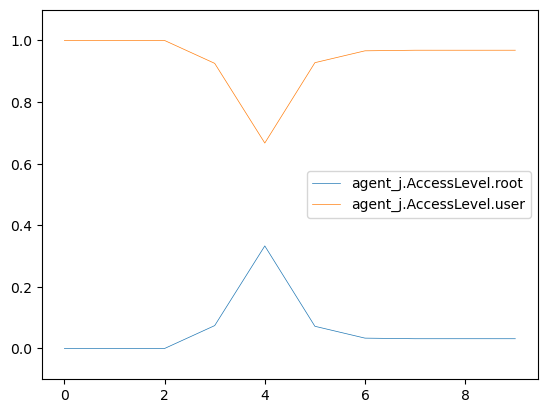

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0      FileRecon            Nop
1                   0.0                    1.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0   EnumAccounts            Nop
3                   0.0                    1.0      FileRecon            Nop
4                   0.0                    1.0           Exit            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

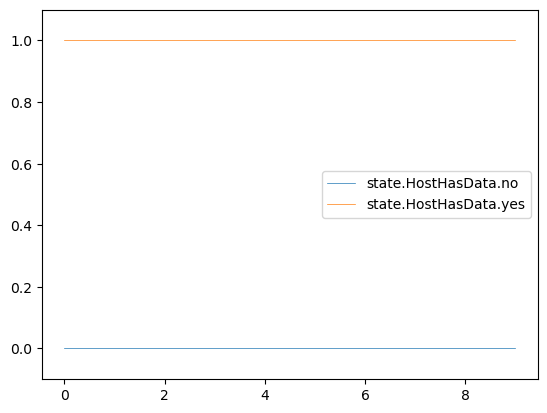

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.592105                 0.407895   EnumAccounts   
2                0.592105                 0.407895   EnumAccounts   
3                0.592105                 0.407895      FileRecon   
4                0.640620                 0.359380           Exit   
5                0.640620                 0.359380            Nop   
6                0.640620                 0.359380            Nop   
7                0.640620                 0.359380            Nop   
8                0.640620                 0.359380            Nop   
9                0.640620                 0.359380            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           failure                            none  
2                           failure                            none  
3                           failure                            none  
4                           failure                            none  
5                           success                            none  
6                           success                            none  
7                           success                            none  
8                           success                            none  
9                           success                            none

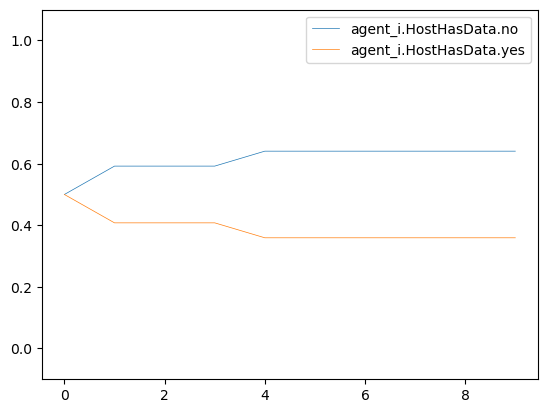

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                       file_write  
2   EnumAccounts                        file_enum  
3      FileRecon                        file_enum  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

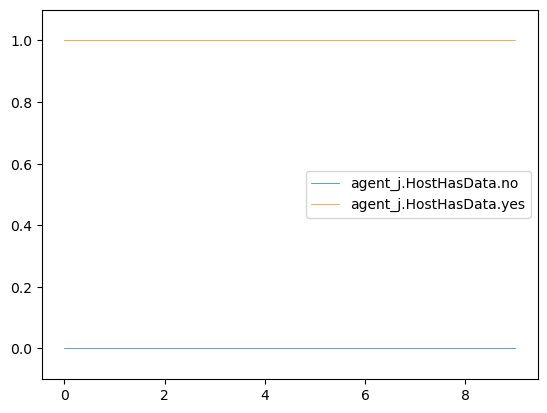

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0      FileRecon            Nop
1                 0.0                  1.0   EnumAccounts   DecoyAccount
2                 0.0                  1.0   EnumAccounts            Nop
3                 0.0                  1.0      FileRecon            Nop
4                 0.0                  1.0           Exit            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

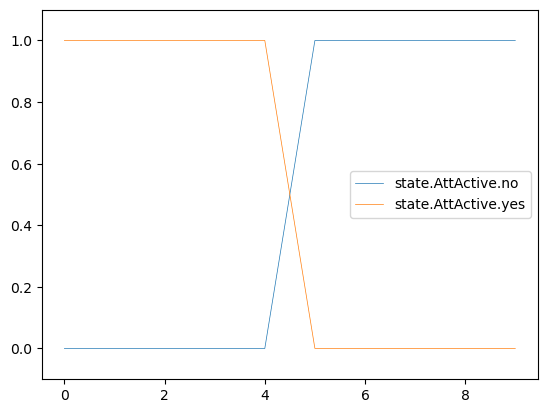

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0   EnumAccounts            Nop   
3                   0.0                    1.0      FileRecon            Nop   
4                   0.0                    1.0           Exit            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

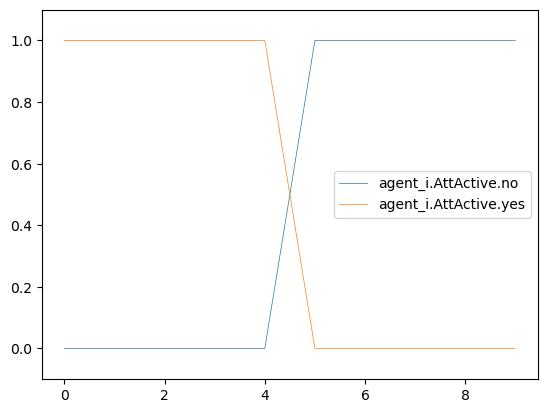

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0              0.000000               1.000000            Nop      FileRecon   
1              0.000000               1.000000   DecoyAccount   EnumAccounts   
2              0.000000               1.000000            Nop   EnumAccounts   
3              0.000092               0.999908            Nop      FileRecon   
4              0.091045               0.908955            Nop           Exit   
5              0.914445               0.085556            Nop            Nop   
6              0.993063               0.006937            Nop            Nop   
7              0.999664               0.000336            Nop            Nop   
8              0.999884               0.000116            Nop            Nop   
9              0.999995               0.000005            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

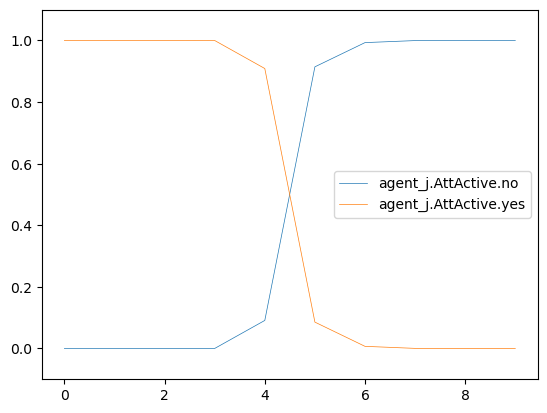

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0   EnumAccounts            Nop
3                   0.0                    1.0      FileRecon            Nop
4                   0.0                    1.0           Exit            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

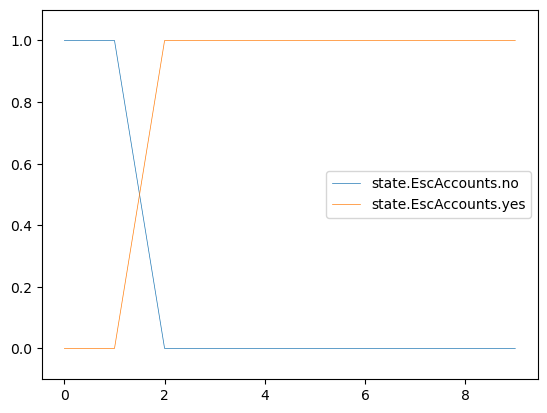

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.613636                 0.386364   EnumAccounts   
3                0.806026                 0.193974      FileRecon   
4                0.805888                 0.194111           Exit   
5                0.805888                 0.194111            Nop   
6                0.805888                 0.194111            Nop   
7                0.805888                 0.194111            Nop   
8                0.805888                 0.194111            Nop   
9                0.805888                 0.194111            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           failure                            none  
2                           failure                            none  
3                           failure                            none  
4                           failure                            none  
5                           success                            none  
6                           success                            none  
7                           success                            none  
8                           success                            none  
9                           success                            none

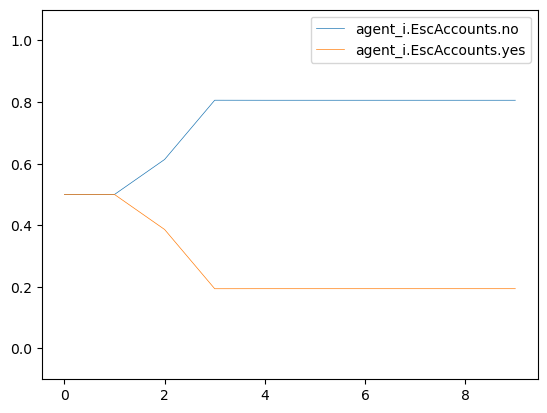

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                       file_write  
2   EnumAccounts                        file_enum  
3      FileRecon                        file_enum  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

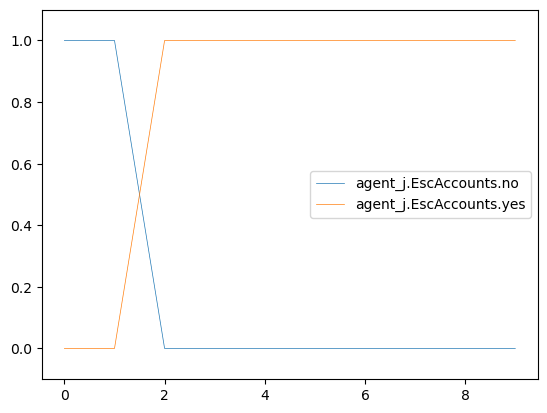

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0      FileRecon            Nop
1                1.0                 0.0   EnumAccounts   DecoyAccount
2                1.0                 0.0   EnumAccounts            Nop
3                1.0                 0.0      FileRecon            Nop
4                1.0                 0.0           Exit            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

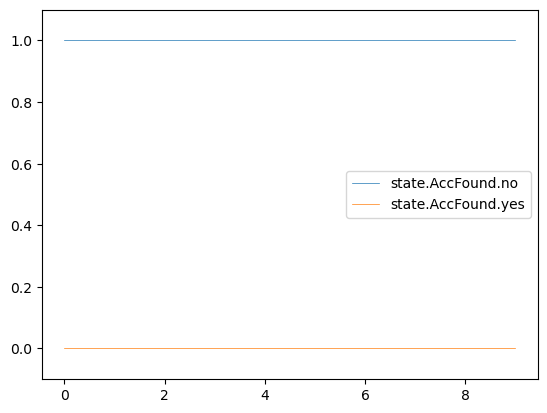

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.920455              0.079545   EnumAccounts            Nop   
3             0.949151              0.050849      FileRecon            Nop   
4             0.949114              0.050886           Exit            Nop   
5             0.949114              0.050886            Nop            Nop   
6             0.949114              0.050886            Nop            Nop   
7             0.949114              0.050886            Nop            Nop   
8             0.949114              0.050886            Nop            Nop   
9             0.949114              0.050886            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

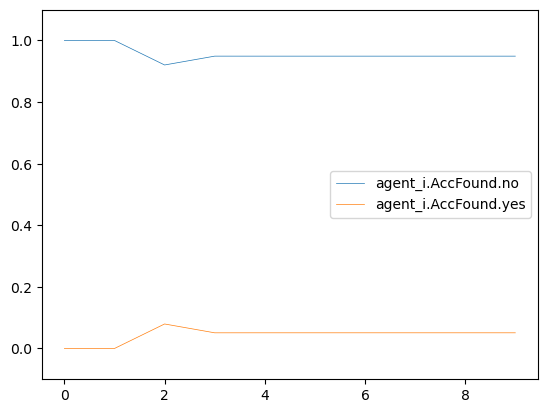

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.606250              0.393750            Nop   EnumAccounts   
3             0.418935              0.581065            Nop      FileRecon   
4             0.532971              0.467029            Nop           Exit   
5             0.739746              0.260254            Nop            Nop   
6             0.770397              0.229603            Nop            Nop   
7             0.771951              0.228049            Nop            Nop   
8             0.771919              0.228081            Nop            Nop   
9             0.771942              0.228058            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

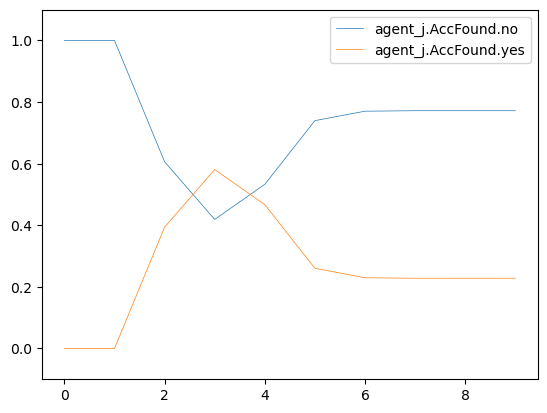

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0      FileRecon            Nop
1                   1.0                   0.0   EnumAccounts   DecoyAccount
2                   1.0                   0.0   EnumAccounts            Nop
3                   1.0                   0.0      FileRecon            Nop
4                   1.0                   0.0           Exit            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

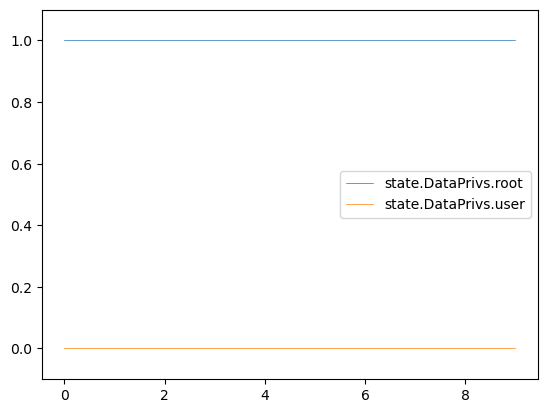

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000      FileRecon   
1                0.592105                0.407895   EnumAccounts   
2                0.592105                0.407895   EnumAccounts   
3                0.592105                0.407895      FileRecon   
4                0.640620                0.359380           Exit   
5                0.640620                0.359380            Nop   
6                0.640620                0.359380            Nop   
7                0.640620                0.359380            Nop   
8                0.640620                0.359380            Nop   
9                0.640620                0.359380            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           failure                            none  
2                           failure                            none  
3                           failure                            none  
4                           failure                            none  
5                           success                            none  
6                           success                            none  
7                           success                            none  
8                           success                            none  
9                           success                            none

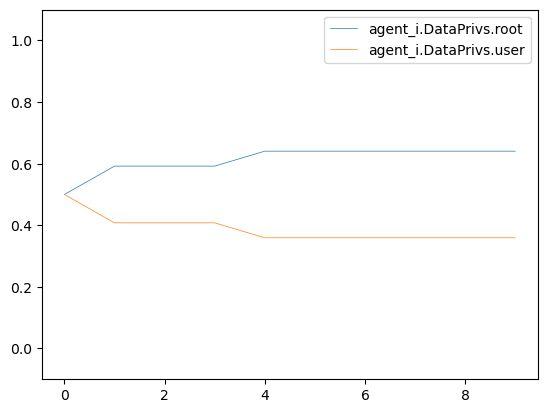

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                       file_write  
2   EnumAccounts                        file_enum  
3      FileRecon                        file_enum  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

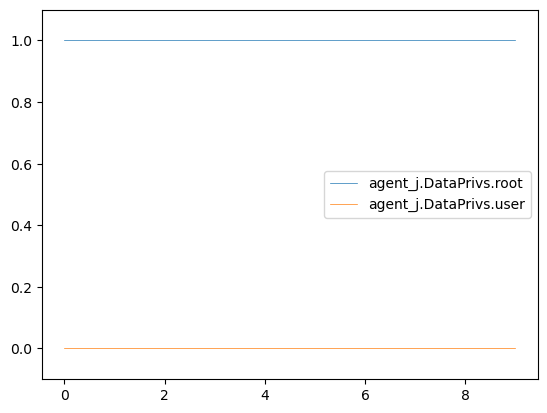

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0      FileRecon            Nop
1                    1.0                     0.0   EnumAccounts   DecoyAccount
2                    1.0                     0.0   EnumAccounts            Nop
3                    1.0                     0.0      FileRecon            Nop
4                    1.0                     0.0           Exit            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

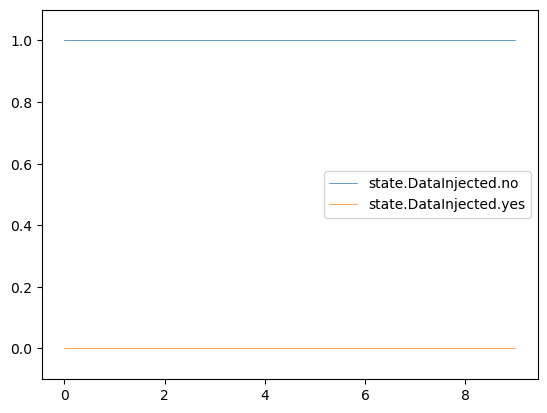

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0   EnumAccounts   
3                      1.0                       0.0      FileRecon   
4                      1.0                       0.0           Exit   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           failure                            none  
2                           failure                            none  
3                           failure                            none  
4                           failure                            none  
5                           success                            none  
6                           success                            none  
7                           success                            none  
8                           success                            none  
9                           success                            none

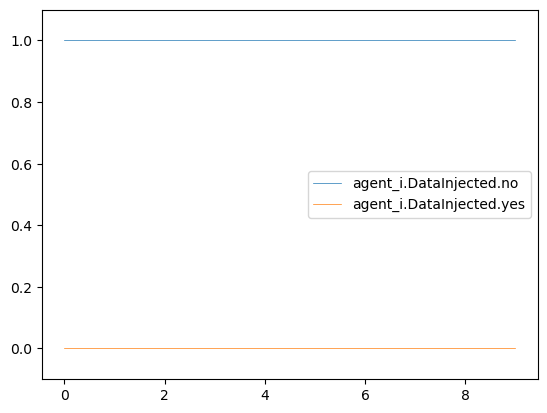

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.974479                  0.025521            Nop   
6                 0.969085                  0.030915            Nop   
7                 0.968797                  0.031203            Nop   
8                 0.968733                  0.031267            Nop   
9                 0.968727                  0.031273            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                       file_write  
2   EnumAccounts                        file_enum  
3      FileRecon                        file_enum  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

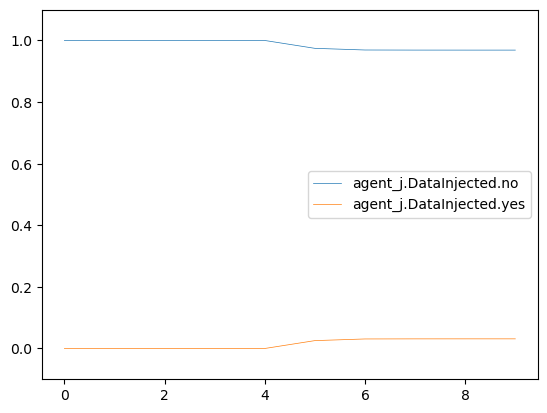

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.577778                        0.422222   
3                         0.472629                        0.527371   
4                         0.485262                        0.514738   
5                         0.491216                        0.508784   
6                         0.491216                        0.508784   
7                         0.491216                        0.508784   
8                         0.491216                        0.508784   
9                         0.491216                        0.508784   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

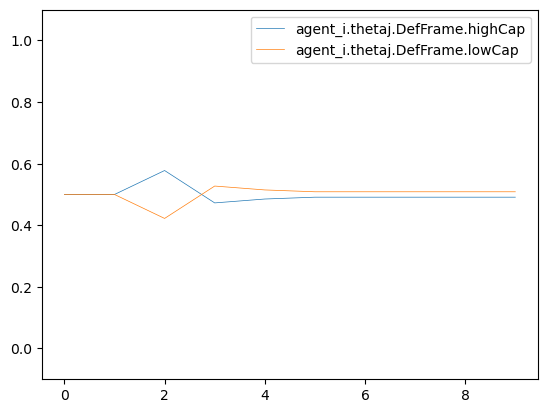

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                             none

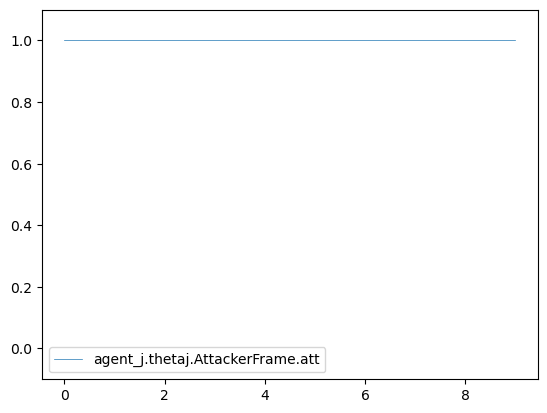

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0      PrivEscAcc            Nop  
3                      1.0       FileRecon            Nop  
4                      1.0  ManipulateData            Nop  
5                      1.0            Exit            Nop  
6                      1.0             Nop            Nop  
7                      1.0             Nop            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

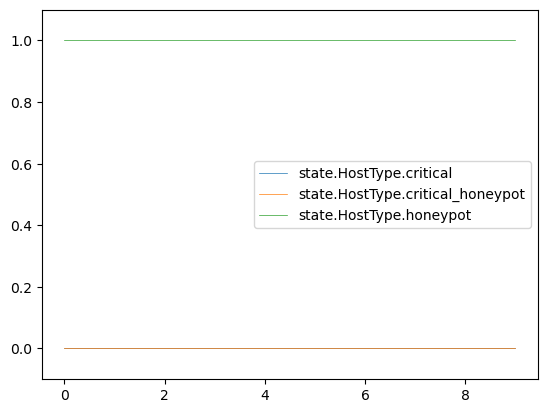

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

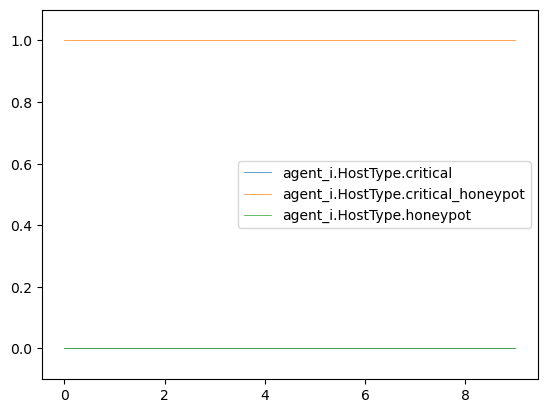

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

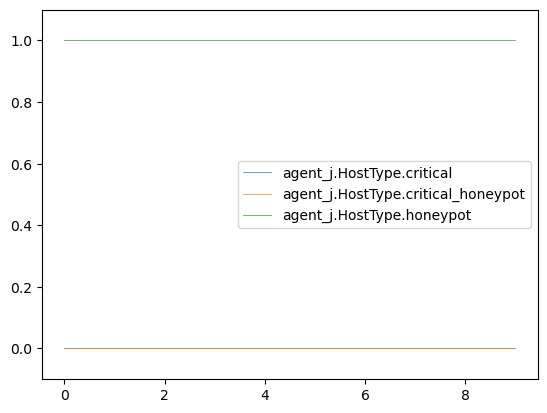

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0      PrivEscAcc            Nop
3                 1.0                  0.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 0.0                  1.0             Nop            Nop
7                 0.0                  1.0             Nop            Nop
8                 0.0                  1.0             Nop            Nop
9                 0.0                  1.0             Nop            Nop

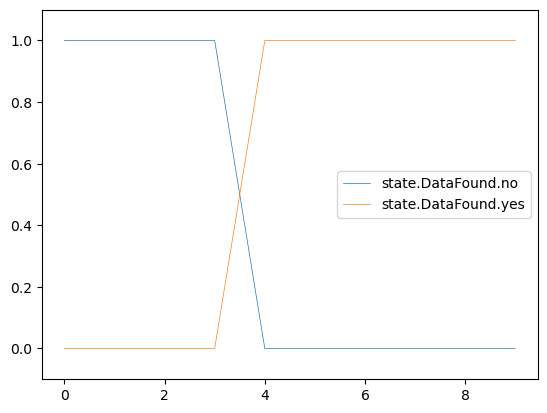

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.234274               0.765727  ManipulateData            Nop   
5              0.000306               0.999694            Exit            Nop   
6              0.000306               0.999694             Nop            Nop   
7              0.000306               0.999694             Nop            Nop   
8              0.000306               0.999694             Nop            Nop   
9              0.000306               0.999694             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

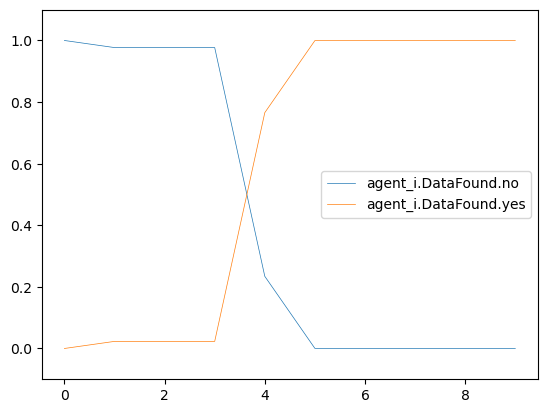

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.339744               0.660256            Nop  ManipulateData   
5              0.075347               0.924654            Nop            Exit   
6              0.022530               0.977470            Nop             Nop   
7              0.020768               0.979232            Nop             Nop   
8              0.020766               0.979234            Nop             Nop   
9              0.020766               0.979234            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

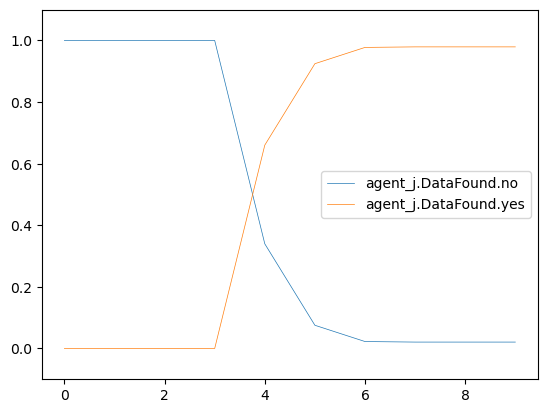

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0      PrivEscAcc   
3                     1.0                     0.0       FileRecon   
4                     1.0                     0.0  ManipulateData   
5                     1.0                     0.0            Exit   
6                     1.0                     0.0             Nop   
7                     1.0                     0.0             Nop   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

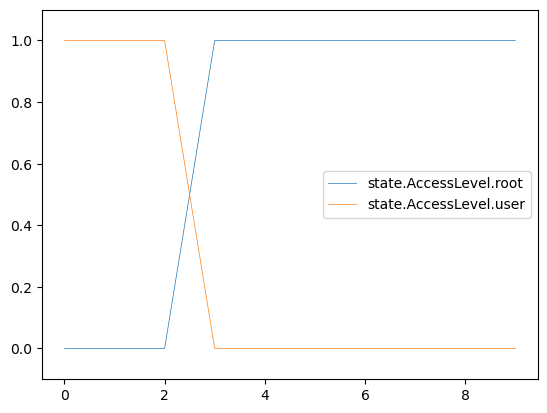

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.874325                  0.125675       FileRecon   
4                  0.932575                  0.067425  ManipulateData   
5                  0.959813                  0.040187            Exit   
6                  0.959813                  0.040187             Nop   
7                  0.959813                  0.040187             Nop   
8                  0.959813                  0.040187             Nop   
9                  0.959813                  0.040187             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           success                            none  
4                           success                            none  
5                           failure                            none  
6                           success                            none  
7                           success                            none  
8                           success                            none  
9                           failure                            none

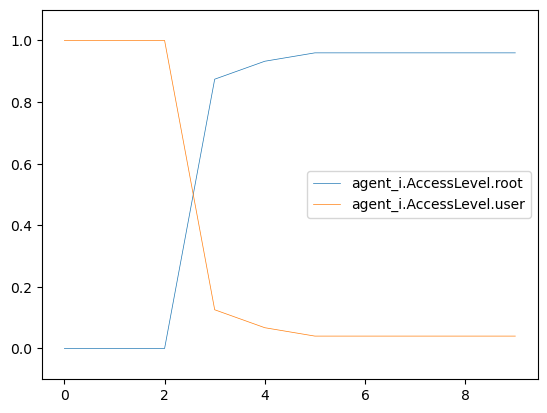

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.886277                  0.113723            Nop   
4                  0.943528                  0.056472            Nop   
5                  0.982340                  0.017660            Nop   
6                  0.980521                  0.019479            Nop   
7                  0.980372                  0.019628            Nop   
8                  0.980368                  0.019632            Nop   
9                  0.980368                  0.019632            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

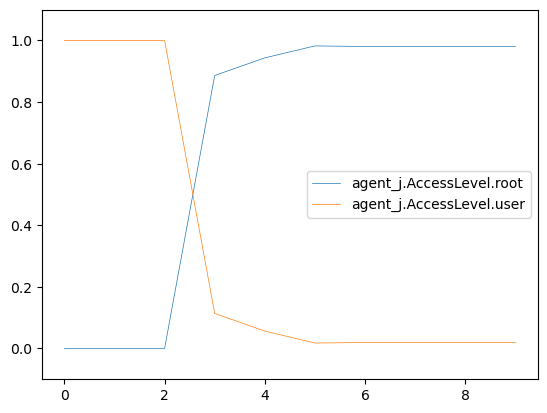

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

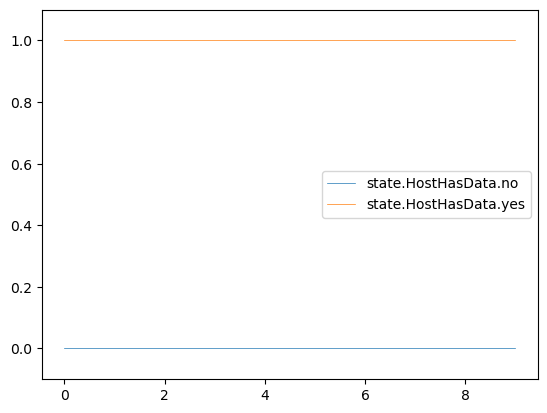

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.189091                 0.810909  ManipulateData   
5                0.000247                 0.999753            Exit   
6                0.000247                 0.999753             Nop   
7                0.000247                 0.999753             Nop   
8                0.000247                 0.999753             Nop   
9                0.000247                 0.999753             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           success                            none  
4                           success                            none  
5                           failure                            none  
6                           success                            none  
7                           success                            none  
8                           success                            none  
9                           failure                            none

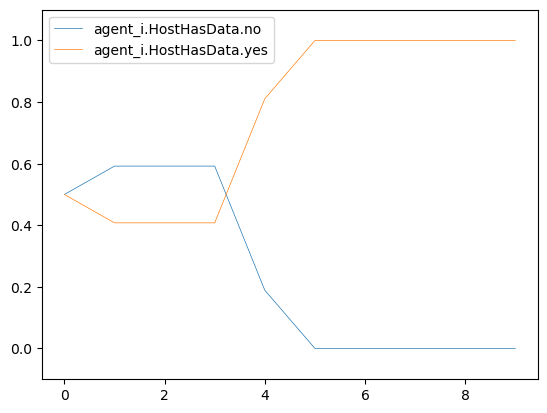

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

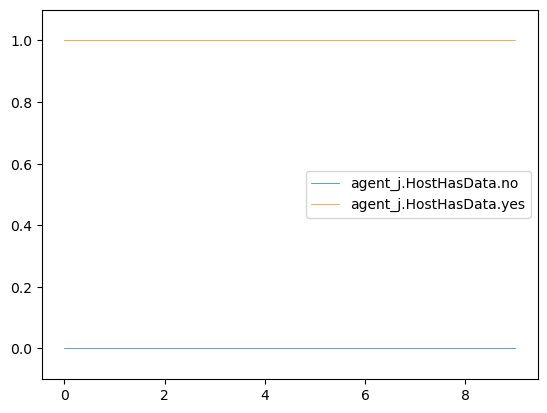

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0      PrivEscAcc            Nop
3                 0.0                  1.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 1.0                  0.0             Nop            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

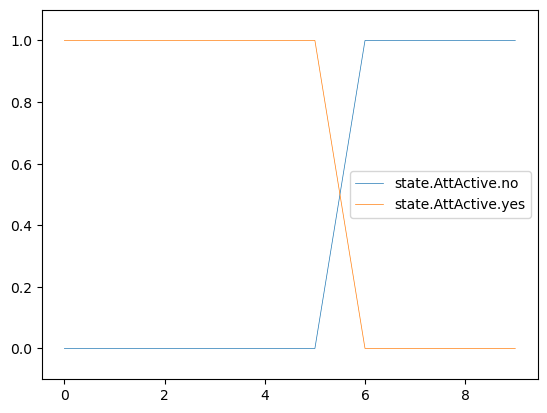

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

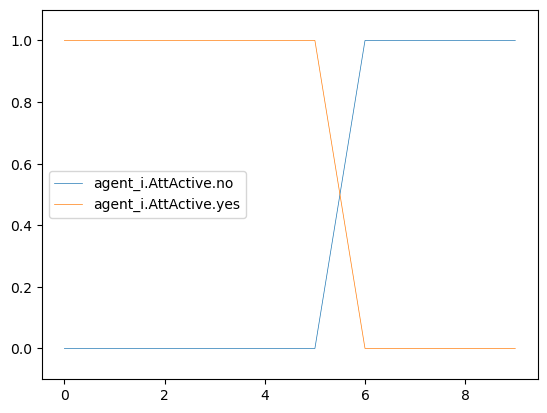

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00   DecoyAccount    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.000003           9.999967e-01            Nop       FileRecon   
4              0.009350           9.906499e-01            Nop  ManipulateData   
5              0.010945           9.890546e-01            Nop            Exit   
6              0.982698           1.730195e-02            Nop             Nop   
7              0.998717           1.283457e-03            Nop             Nop   
8              0.999967           3.274891e-05            Nop             Nop   
9              1.000000           1.059119e-08            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

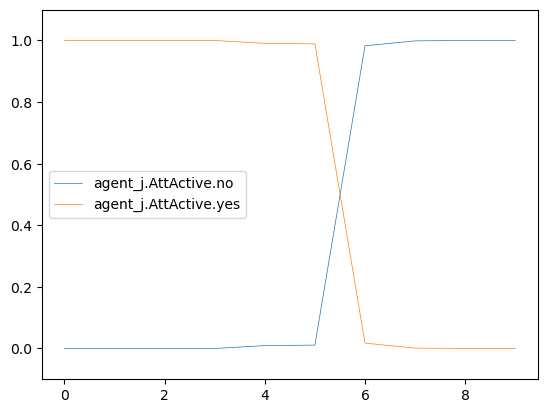

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

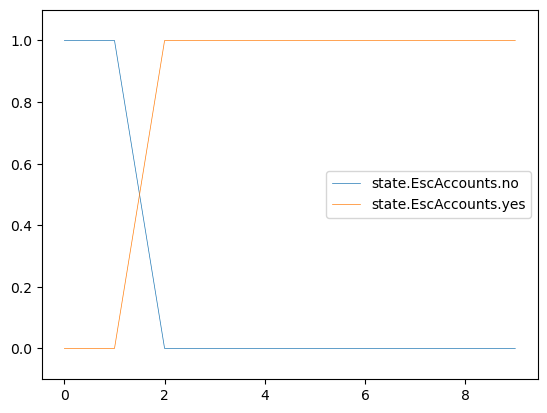

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.083333                 0.916667      PrivEscAcc   
3                0.071318                 0.928682       FileRecon   
4                0.038295                 0.961705  ManipulateData   
5                0.022825                 0.977175            Exit   
6                0.022825                 0.977175             Nop   
7                0.022825                 0.977175             Nop   
8                0.022825                 0.977175             Nop   
9                0.022825                 0.977175             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           success                            none  
4                           success                            none  
5                           failure                            none  
6                           success                            none  
7                           success                            none  
8                           success                            none  
9                           failure                            none

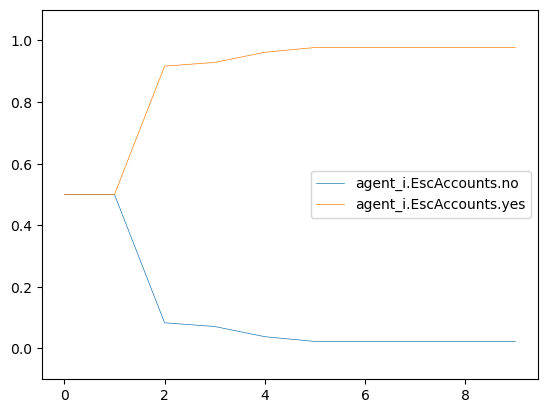

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

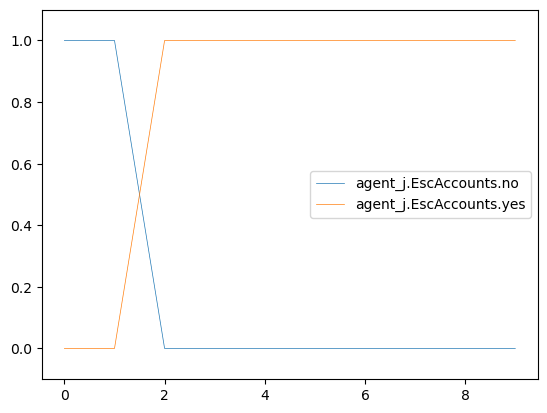

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                0.0                 1.0      PrivEscAcc            Nop
3                0.0                 1.0       FileRecon            Nop
4                0.0                 1.0  ManipulateData            Nop
5                0.0                 1.0            Exit            Nop
6                0.0                 1.0             Nop            Nop
7                0.0                 1.0             Nop            Nop
8                0.0                 1.0             Nop            Nop
9                0.0                 1.0             Nop            Nop

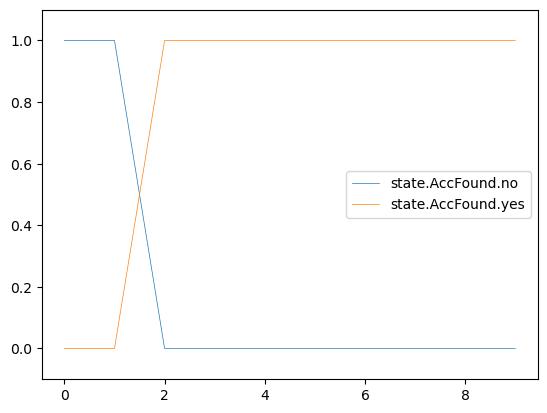

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.125000              0.875000      PrivEscAcc            Nop   
3             0.113531              0.886469       FileRecon            Nop   
4             0.060964              0.939036  ManipulateData            Nop   
5             0.036336              0.963664            Exit            Nop   
6             0.036336              0.963664             Nop            Nop   
7             0.036336              0.963664             Nop            Nop   
8             0.036336              0.963664             Nop            Nop   
9             0.036336              0.963664             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

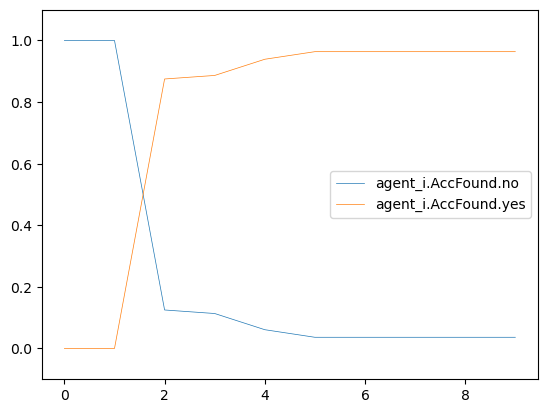

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310938              0.689063            Nop      PrivEscAcc   
3             0.097425              0.902575            Nop       FileRecon   
4             0.054096              0.945904            Nop  ManipulateData   
5             0.017132              0.982868            Nop            Exit   
6             0.018896              0.981104            Nop             Nop   
7             0.019040              0.980960            Nop             Nop   
8             0.019044              0.980956            Nop             Nop   
9             0.019044              0.980956            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

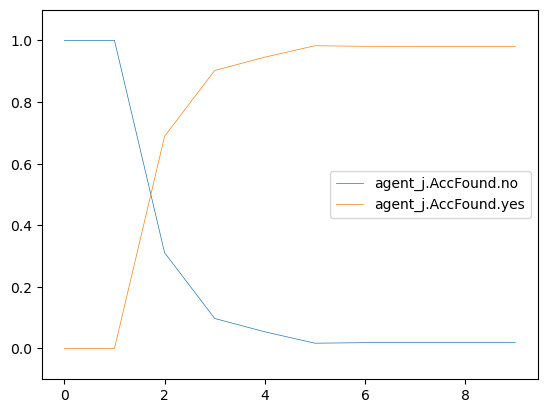

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0      PrivEscAcc            Nop
3                   1.0                   0.0       FileRecon            Nop
4                   1.0                   0.0  ManipulateData            Nop
5                   1.0                   0.0            Exit            Nop
6                   1.0                   0.0             Nop            Nop
7                   1.0                   0.0             Nop            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

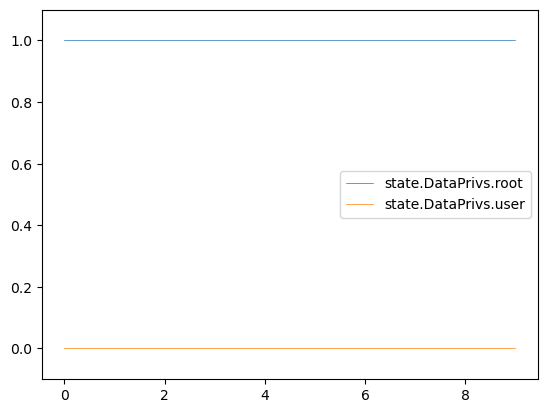

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895      PrivEscAcc   
3                0.592105                0.407895       FileRecon   
4                0.652072                0.347928  ManipulateData   
5                0.680171                0.319829            Exit   
6                0.680171                0.319829             Nop   
7                0.680171                0.319829             Nop   
8                0.680171                0.319829             Nop   
9                0.680171                0.319829             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           success                            none  
4                           success                            none  
5                           failure                            none  
6                           success                            none  
7                           success                            none  
8                           success                            none  
9                           failure                            none

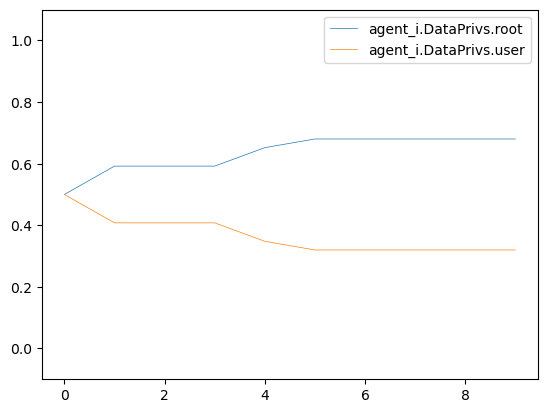

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

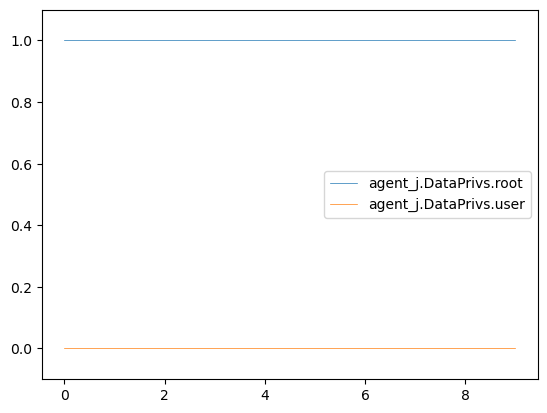

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0       FileRecon   
4                    1.0                     0.0  ManipulateData   
5                    0.0                     1.0            Exit   
6                    0.0                     1.0             Nop   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

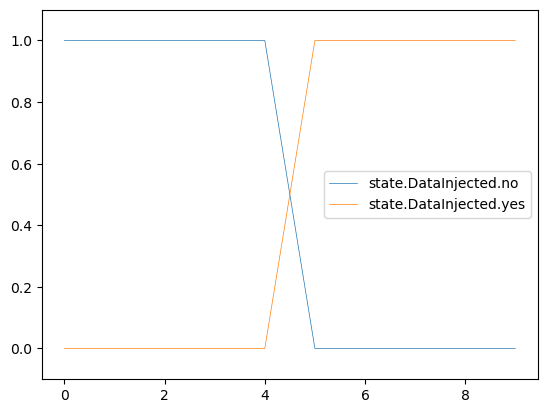

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000306                  0.999694            Exit   
6                 0.000306                  0.999694             Nop   
7                 0.000306                  0.999694             Nop   
8                 0.000306                  0.999694             Nop   
9                 0.000306                  0.999694             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           success                            none  
4                           success                            none  
5                           failure                            none  
6                           success                            none  
7                           success                            none  
8                           success                            none  
9                           failure                            none

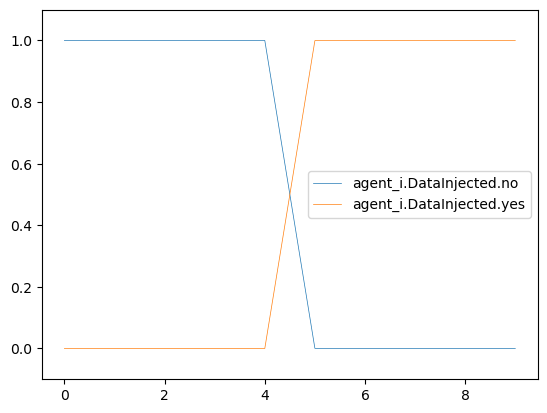

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.126646                  0.873354            Nop   
6                 0.029529                  0.970471            Nop   
7                 0.021270                  0.978730            Nop   
8                 0.021047                  0.978953            Nop   
9                 0.021047                  0.978953            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

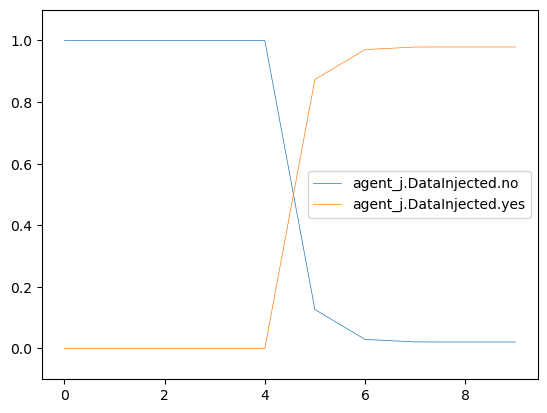

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.577778                        0.422222   
3                         0.472629                        0.527371   
4                         0.466764                        0.533236   
5                         0.480091                        0.519909   
6                         0.462810                        0.537190   
7                         0.462810                        0.537190   
8                         0.462810                        0.537190   
9                         0.462810                        0.537190   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           failure   
3                         none                           failure   
4                         none                           success   
5                   user_files                           failure   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

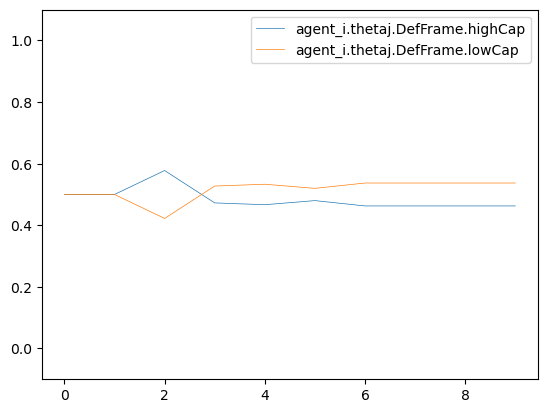

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                   login_activity
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                        file_enum
8                               1.0                       file_write
9                               1.0                             none

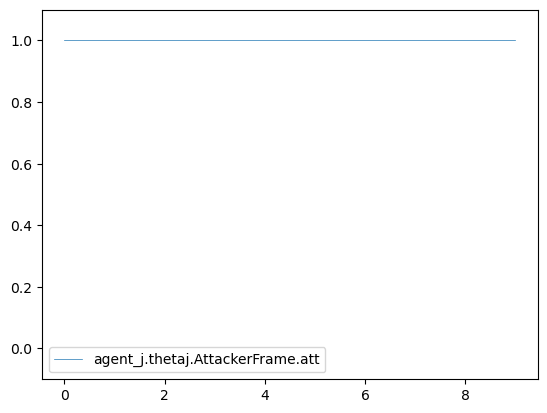

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0      PrivEscAcc            Nop  
3                      1.0       FileRecon            Nop  
4                      1.0       FileRecon            Nop  
5                      1.0  ManipulateData            Nop  
6                      1.0            Exit            Nop  
7                      1.0             Nop            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

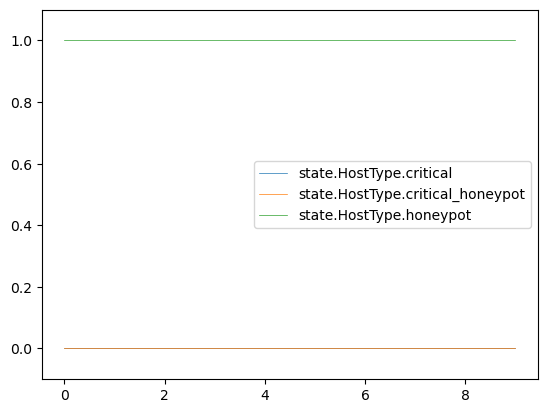

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0       FileRecon            Nop   
5                        0.0  ManipulateData            Nop   
6                        0.0            Exit            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           failure   
3                         none                           failure   
4                         none                           success   
5                   user_files                           failure   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

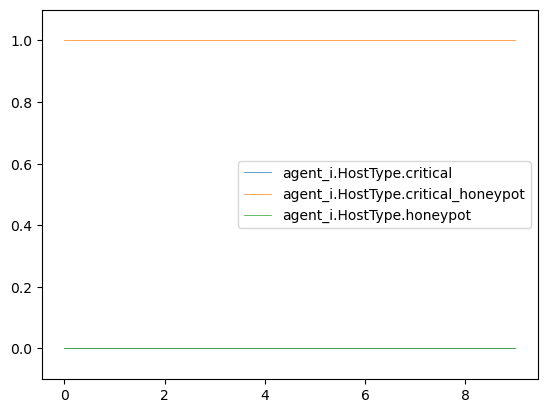

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop  ManipulateData   
6                        1.0            Nop            Exit   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                        file_enum  
8                       file_write  
9                             none

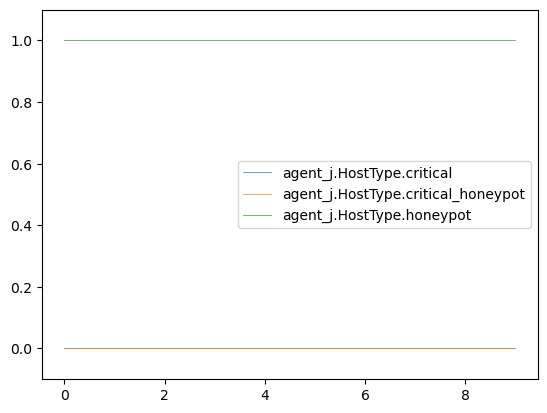

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0      PrivEscAcc            Nop
3                 1.0                  0.0       FileRecon            Nop
4                 1.0                  0.0       FileRecon            Nop
5                 1.0                  0.0  ManipulateData            Nop
6                 1.0                  0.0            Exit            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

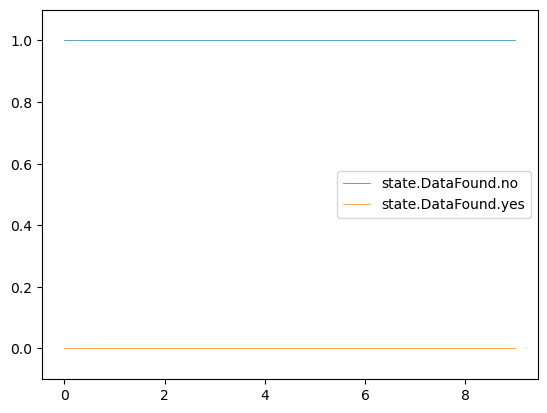

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.961213               0.038787       FileRecon            Nop   
5              0.416991               0.583009  ManipulateData            Nop   
6              0.998602               0.001398            Exit            Nop   
7              0.998602               0.001398             Nop            Nop   
8              0.998602               0.001398             Nop            Nop   
9              0.998602               0.001398             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           failure   
3                         none                           failure   
4                         none                           success   
5                   user_files                           failure   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

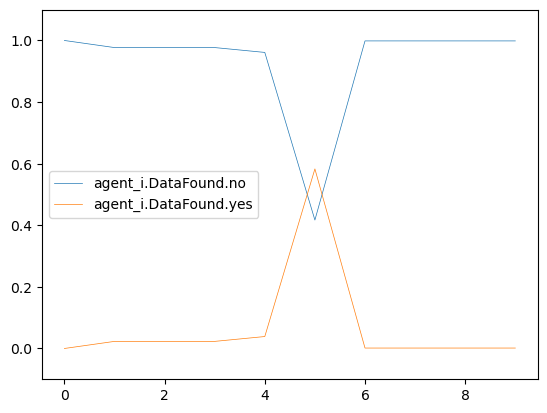

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.345530               0.654470            Nop       FileRecon   
5              0.214498               0.785502            Nop  ManipulateData   
6              0.047514               0.952486            Nop            Exit   
7              0.047195               0.952805            Nop             Nop   
8              0.047203               0.952797            Nop             Nop   
9              0.047197               0.952802            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                        file_enum  
8                       file_write  
9                             none

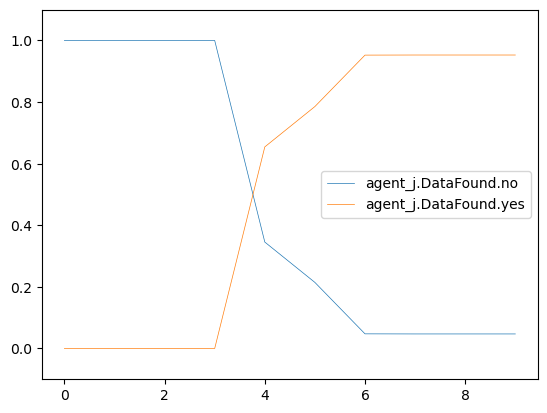

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0      PrivEscAcc   
3                     0.0                     1.0       FileRecon   
4                     0.0                     1.0       FileRecon   
5                     0.0                     1.0  ManipulateData   
6                     0.0                     1.0            Exit   
7                     0.0                     1.0             Nop   
8                     0.0                     1.0             Nop   
9                     0.0                     1.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

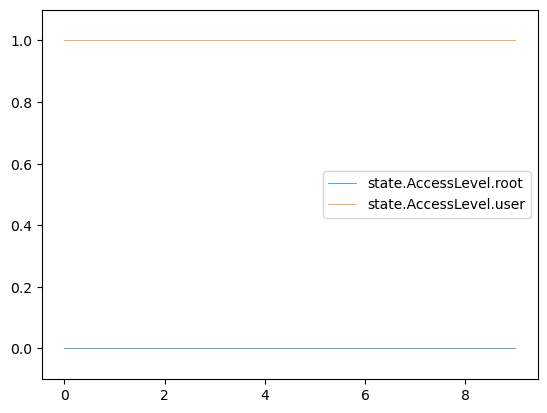

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.874325                  0.125675       FileRecon   
4                  0.847946                  0.152054       FileRecon   
5                  0.908917                  0.091083  ManipulateData   
6                  0.829859                  0.170141            Exit   
7                  0.829859                  0.170141             Nop   
8                  0.829859                  0.170141             Nop   
9                  0.829859                  0.170141             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           failure                            none  
4                           success                            none  
5                           failure                            none  
6                           failure                            none  
7                           failure                            none  
8                           failure                            none  
9                           success                            none

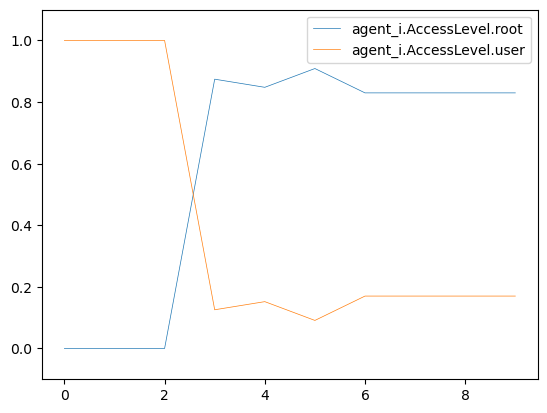

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.869632                  0.130368            Nop   
4                  0.937075                  0.062925            Nop   
5                  0.978153                  0.021847            Nop   
6                  0.994826                  0.005174            Nop   
7                  0.994643                  0.005358            Nop   
8                  0.994643                  0.005357            Nop   
9                  0.994645                  0.005355            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                        file_enum  
8             Nop                       file_write  
9             Nop                             none

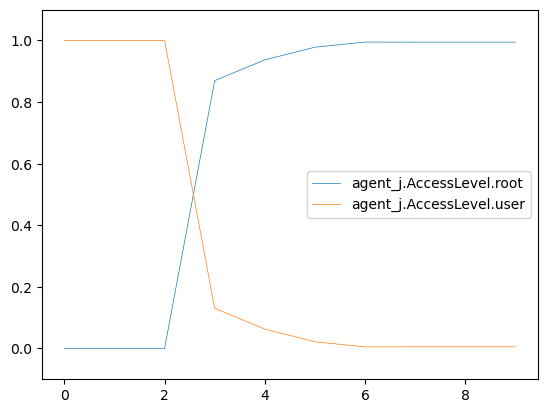

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0       FileRecon            Nop
5                   0.0                    1.0  ManipulateData            Nop
6                   0.0                    1.0            Exit            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

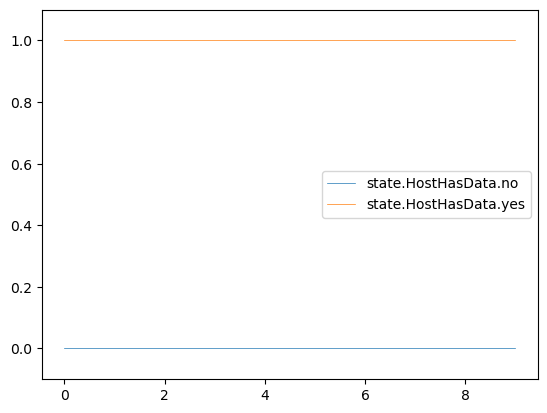

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.775833                 0.224167       FileRecon   
5                0.373773                 0.626228  ManipulateData   
6                0.895104                 0.104896            Exit   
7                0.895104                 0.104896             Nop   
8                0.895104                 0.104896             Nop   
9                0.895104                 0.104896             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           failure                            none  
4                           success                            none  
5                           failure                            none  
6                           failure                            none  
7                           failure                            none  
8                           failure                            none  
9                           success                            none

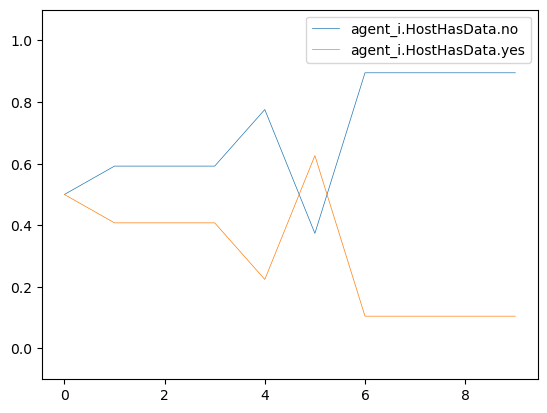

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                        file_enum  
8             Nop                       file_write  
9             Nop                             none

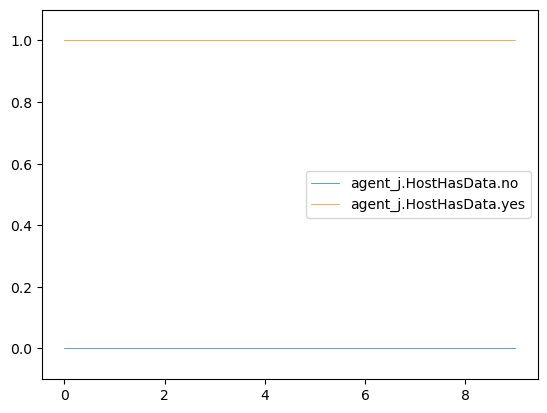

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0      PrivEscAcc            Nop
3                 0.0                  1.0       FileRecon            Nop
4                 0.0                  1.0       FileRecon            Nop
5                 0.0                  1.0  ManipulateData            Nop
6                 0.0                  1.0            Exit            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

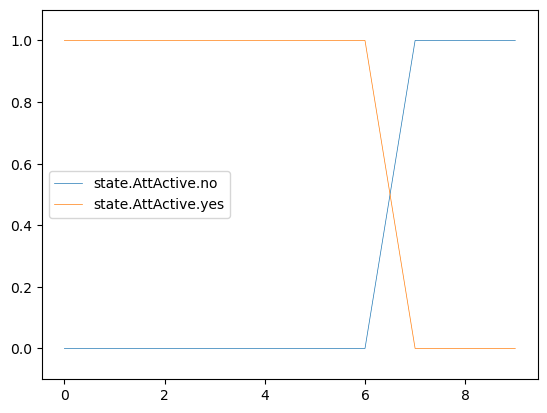

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0  ManipulateData            Nop   
6                   0.0                    1.0            Exit            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           failure   
3                         none                           failure   
4                         none                           success   
5                   user_files                           failure   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

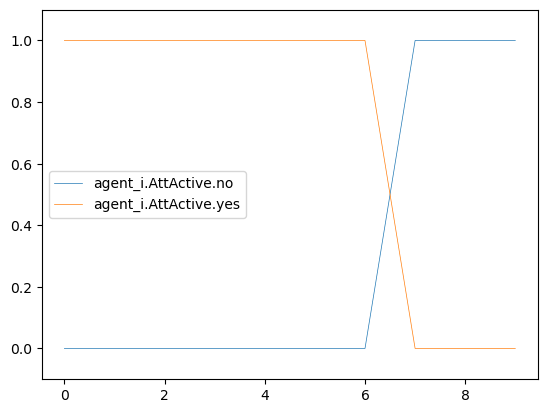

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000               1.000000            Nop       FileRecon   
1              0.000000               1.000000   DecoyAccount    EnumAccounts   
2              0.000000               1.000000            Nop      PrivEscAcc   
3              0.000022               0.999978            Nop       FileRecon   
4              0.009271               0.990729            Nop       FileRecon   
5              0.019819               0.980181            Nop  ManipulateData   
6              0.052429               0.947571            Nop            Exit   
7              0.994007               0.005993            Nop             Nop   
8              0.999793               0.000207            Nop             Nop   
9              0.999560               0.000440            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                        file_enum  
8                       file_write  
9                             none

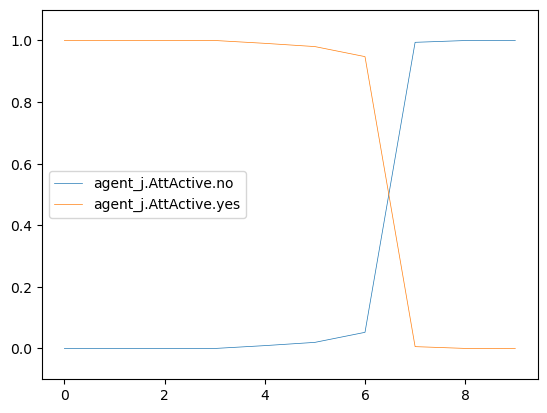

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0       FileRecon            Nop
5                   0.0                    1.0  ManipulateData            Nop
6                   0.0                    1.0            Exit            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

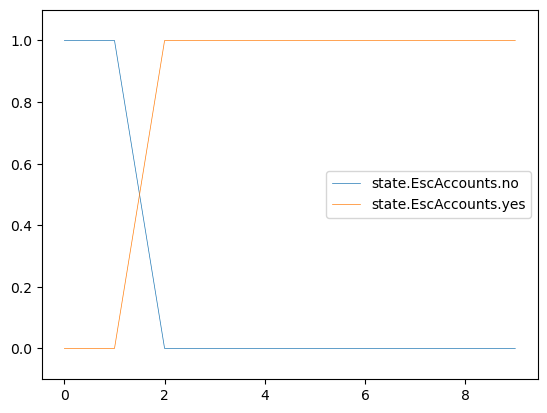

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.083333                 0.916667      PrivEscAcc   
3                0.071318                 0.928682       FileRecon   
4                0.086361                 0.913639       FileRecon   
5                0.051732                 0.948268  ManipulateData   
6                0.096634                 0.903366            Exit   
7                0.096634                 0.903366             Nop   
8                0.096634                 0.903366             Nop   
9                0.096634                 0.903366             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           failure                            none  
4                           success                            none  
5                           failure                            none  
6                           failure                            none  
7                           failure                            none  
8                           failure                            none  
9                           success                            none

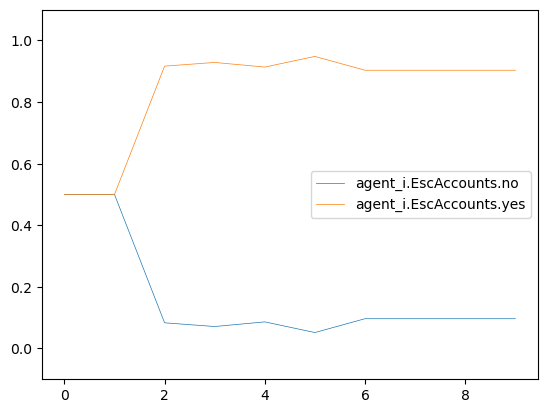

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                        file_enum  
8             Nop                       file_write  
9             Nop                             none

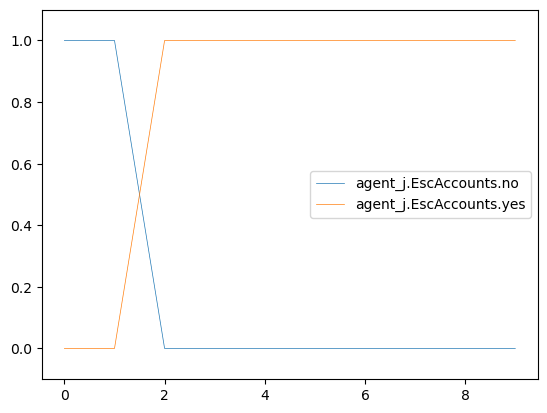

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                1.0                 0.0      PrivEscAcc            Nop
3                1.0                 0.0       FileRecon            Nop
4                1.0                 0.0       FileRecon            Nop
5                1.0                 0.0  ManipulateData            Nop
6                1.0                 0.0            Exit            Nop
7                1.0                 0.0             Nop            Nop
8                1.0                 0.0             Nop            Nop
9                1.0                 0.0             Nop            Nop

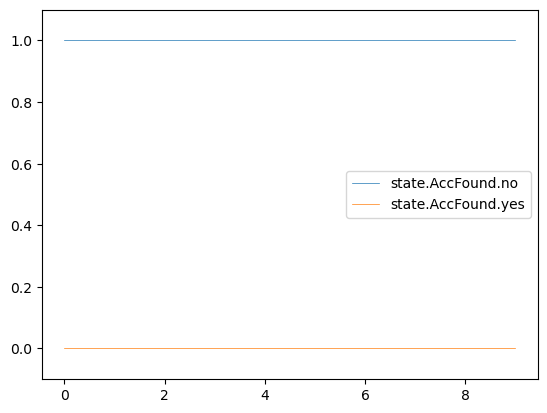

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.125000              0.875000      PrivEscAcc            Nop   
3             0.113531              0.886469       FileRecon            Nop   
4             0.137484              0.862516       FileRecon            Nop   
5             0.082356              0.917644  ManipulateData            Nop   
6             0.153838              0.846162            Exit            Nop   
7             0.153838              0.846162             Nop            Nop   
8             0.153838              0.846162             Nop            Nop   
9             0.153838              0.846162             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           failure   
3                         none                           failure   
4                         none                           success   
5                   user_files                           failure   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

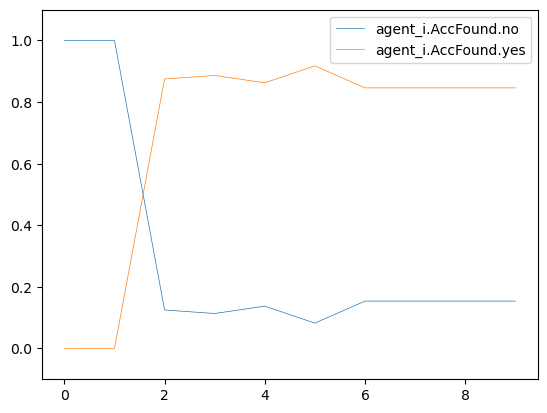

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.370000              0.630000            Nop      PrivEscAcc   
3             0.101242              0.898758            Nop       FileRecon   
4             0.059157              0.940843            Nop       FileRecon   
5             0.020556              0.979444            Nop  ManipulateData   
6             0.004871              0.995129            Nop            Exit   
7             0.005044              0.994956            Nop             Nop   
8             0.005043              0.994956            Nop             Nop   
9             0.005042              0.994958            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                        file_enum  
8                       file_write  
9                             none

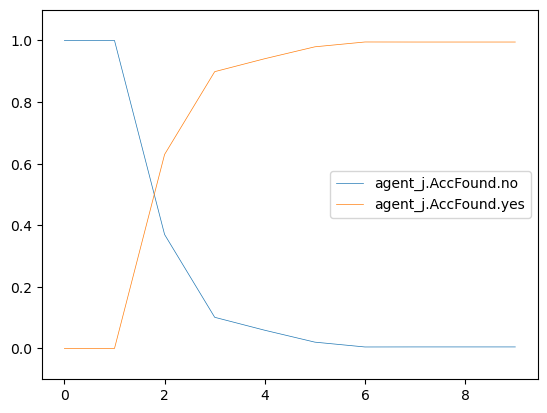

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0      PrivEscAcc            Nop
3                   1.0                   0.0       FileRecon            Nop
4                   1.0                   0.0       FileRecon            Nop
5                   1.0                   0.0  ManipulateData            Nop
6                   1.0                   0.0            Exit            Nop
7                   1.0                   0.0             Nop            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

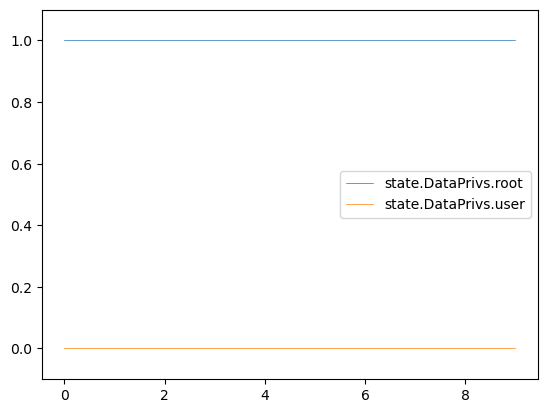

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895      PrivEscAcc   
3                0.592105                0.407895       FileRecon   
4                0.564767                0.435233       FileRecon   
5                0.648322                0.351678  ManipulateData   
6                0.539981                0.460019            Exit   
7                0.539981                0.460019             Nop   
8                0.539981                0.460019             Nop   
9                0.539981                0.460019             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           failure                            none  
4                           success                            none  
5                           failure                            none  
6                           failure                            none  
7                           failure                            none  
8                           failure                            none  
9                           success                            none

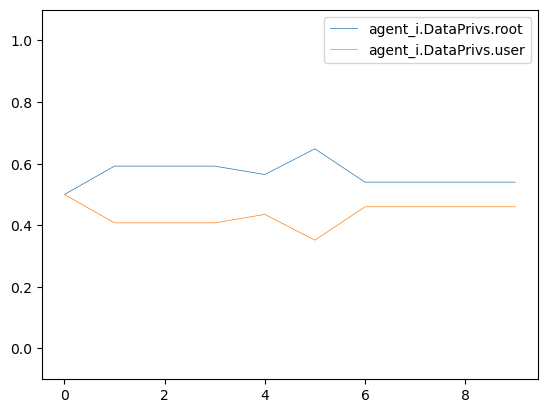

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                        file_enum  
8             Nop                       file_write  
9             Nop                             none

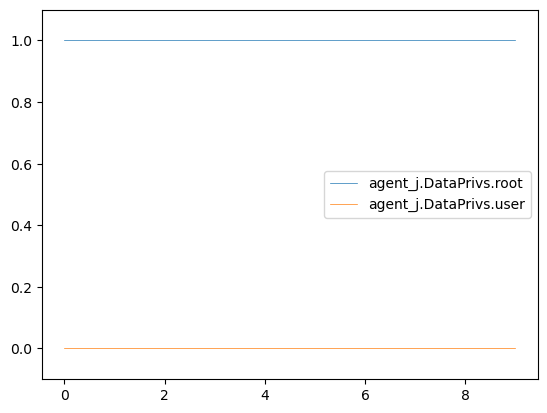

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0       FileRecon   
4                    1.0                     0.0       FileRecon   
5                    1.0                     0.0  ManipulateData   
6                    1.0                     0.0            Exit   
7                    1.0                     0.0             Nop   
8                    1.0                     0.0             Nop   
9                    1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

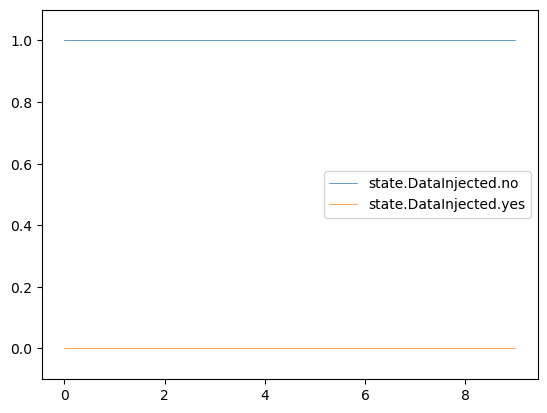

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000  ManipulateData   
6                 0.998602                  0.001398            Exit   
7                 0.998602                  0.001398             Nop   
8                 0.998602                  0.001398             Nop   
9                 0.998602                  0.001398             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           failure                            none  
4                           success                            none  
5                           failure                            none  
6                           failure                            none  
7                           failure                            none  
8                           failure                            none  
9                           success                            none

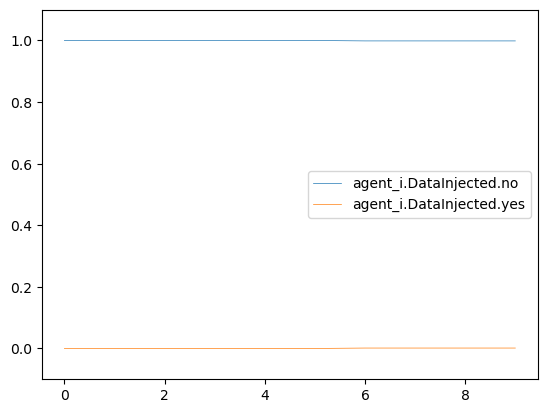

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.798208                  0.201792            Nop   
6                 0.089834                  0.910165            Nop   
7                 0.051515                  0.948485            Nop   
8                 0.051473                  0.948527            Nop   
9                 0.051406                  0.948594            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                        file_enum  
8             Nop                       file_write  
9             Nop                             none

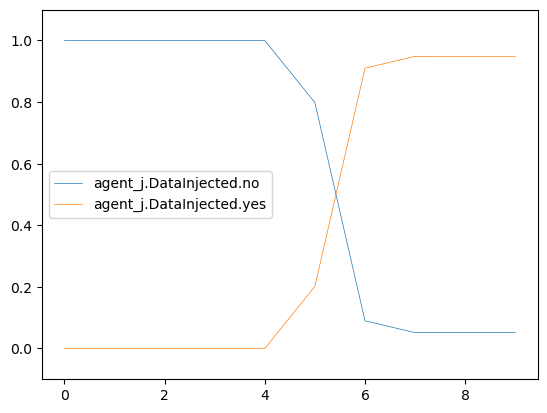

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.577778                        0.422222   
3                         0.472629                        0.527371   
4                         0.485300                        0.514700   
5                         0.491238                        0.508762   
6                         0.491238                        0.508762   
7                         0.491238                        0.508762   
8                         0.491238                        0.508762   
9                         0.491238                        0.508762   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                   user_files                           success   
4                         none                           success   
5                   user_files                           failure   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                    perms_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

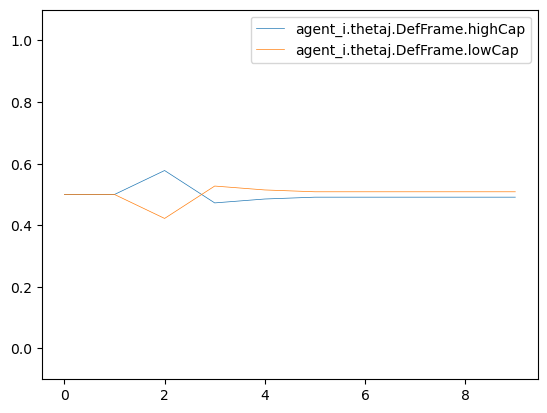

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                       file_write
6                               1.0                        file_enum
7                               1.0                             none
8                               1.0                             none
9                               1.0                        file_enum

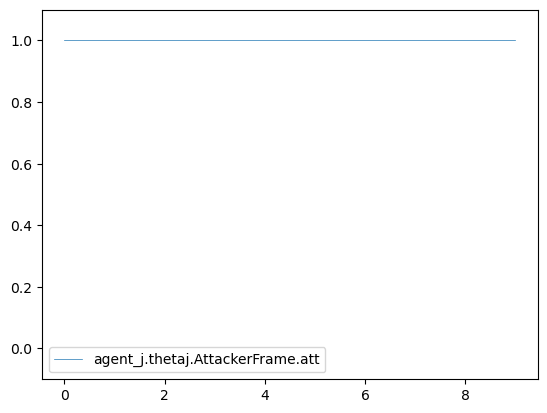

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0      PrivEscAcc            Nop  
3                      1.0       FileRecon            Nop  
4                      1.0  ManipulateData            Nop  
5                      1.0            Exit            Nop  
6                      1.0             Nop            Nop  
7                      1.0             Nop            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

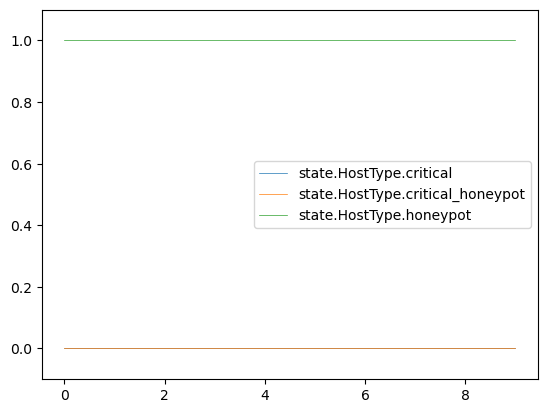

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                   user_files                           success   
4                         none                           success   
5                   user_files                           failure   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                    perms_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

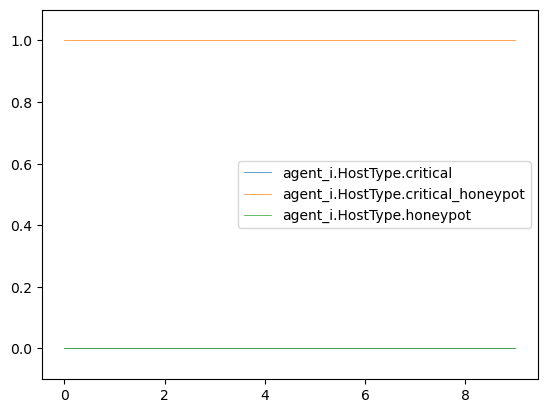

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                       file_write  
6                        file_enum  
7                             none  
8                             none  
9                        file_enum

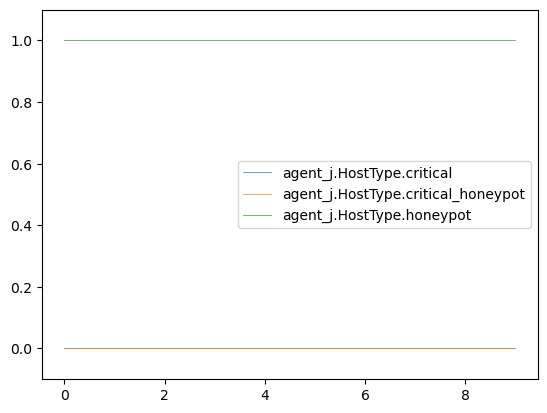

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0      PrivEscAcc            Nop
3                 1.0                  0.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 0.0                  1.0             Nop            Nop
7                 0.0                  1.0             Nop            Nop
8                 0.0                  1.0             Nop            Nop
9                 0.0                  1.0             Nop            Nop

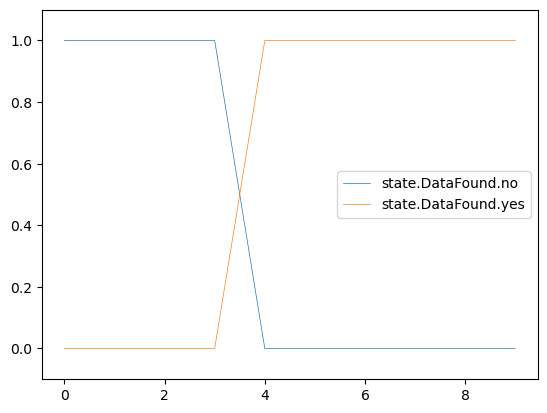

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.234297               0.765703  ManipulateData            Nop   
5              0.000306               0.999694            Exit            Nop   
6              0.000306               0.999694             Nop            Nop   
7              0.000306               0.999694             Nop            Nop   
8              0.000306               0.999694             Nop            Nop   
9              0.000306               0.999694             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                   user_files                           success   
4                         none                           success   
5                   user_files                           failure   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                    perms_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

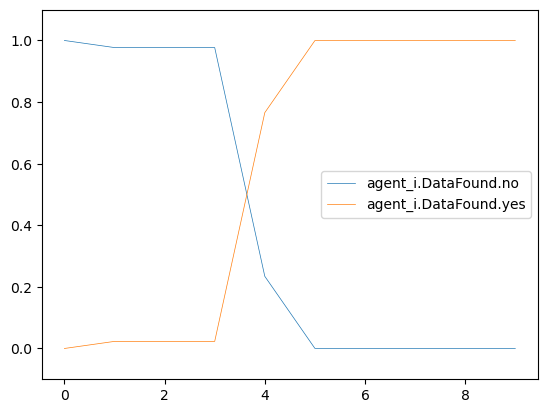

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.339744               0.660256            Nop  ManipulateData   
5              0.075347               0.924654            Nop            Exit   
6              0.035613               0.964387            Nop             Nop   
7              0.042423               0.957577            Nop             Nop   
8              0.042823               0.957177            Nop             Nop   
9              0.042823               0.957177            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                       file_write  
6                        file_enum  
7                             none  
8                             none  
9                        file_enum

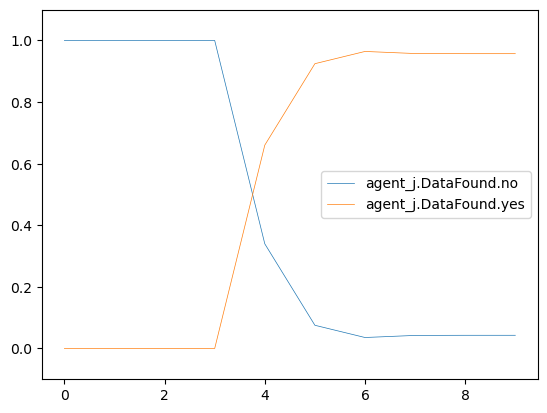

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0      PrivEscAcc   
3                     1.0                     0.0       FileRecon   
4                     1.0                     0.0  ManipulateData   
5                     1.0                     0.0            Exit   
6                     1.0                     0.0             Nop   
7                     1.0                     0.0             Nop   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

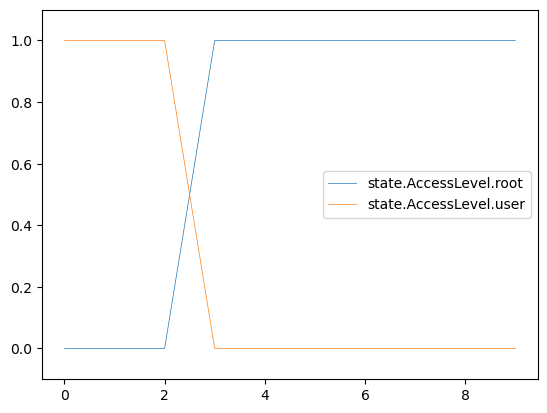

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.874325                  0.125675       FileRecon   
4                  0.932506                  0.067494  ManipulateData   
5                  0.959771                  0.040229            Exit   
6                  0.959771                  0.040229             Nop   
7                  0.959771                  0.040229             Nop   
8                  0.959771                  0.040229             Nop   
9                  0.959771                  0.040229             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           success                            none  
3                           success                    perms_change  
4                           success                            none  
5                           failure                            none  
6                           failure                            none  
7                           failure                            none  
8                           success                            none  
9                           failure                            none

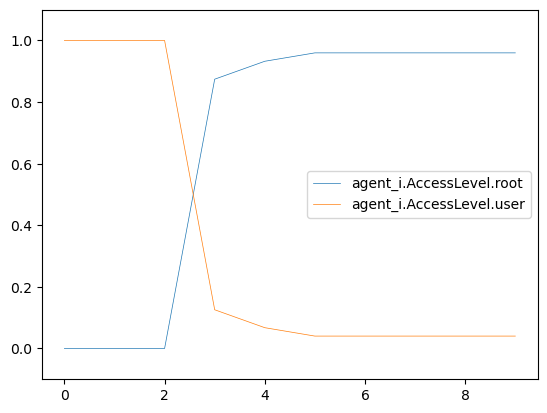

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.886277                  0.113723            Nop   
4                  0.943528                  0.056472            Nop   
5                  0.982340                  0.017660            Nop   
6                  0.986268                  0.013732            Nop   
7                  0.987096                  0.012904            Nop   
8                  0.986502                  0.013498            Nop   
9                  0.986502                  0.013498            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

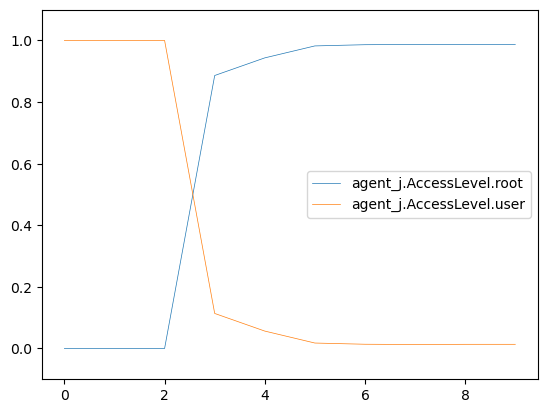

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

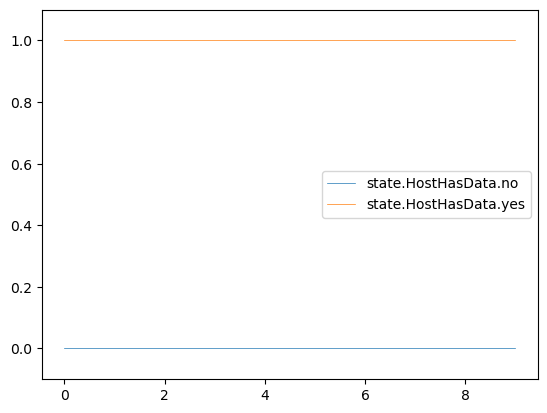

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.189103                 0.810897  ManipulateData   
5                0.000247                 0.999753            Exit   
6                0.000247                 0.999753             Nop   
7                0.000247                 0.999753             Nop   
8                0.000247                 0.999753             Nop   
9                0.000247                 0.999753             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           success                            none  
3                           success                    perms_change  
4                           success                            none  
5                           failure                            none  
6                           failure                            none  
7                           failure                            none  
8                           success                            none  
9                           failure                            none

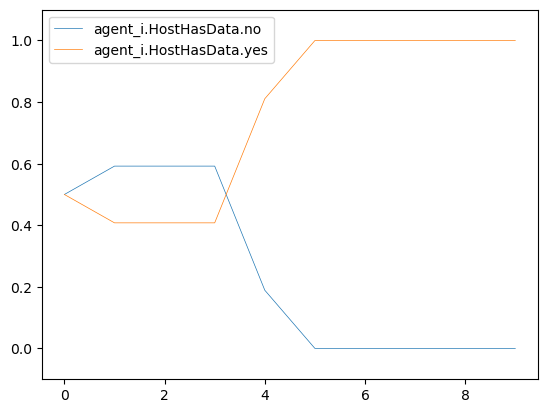

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

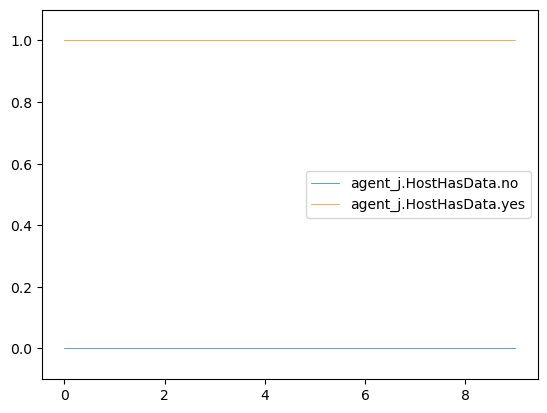

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0      PrivEscAcc            Nop
3                 0.0                  1.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 1.0                  0.0             Nop            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

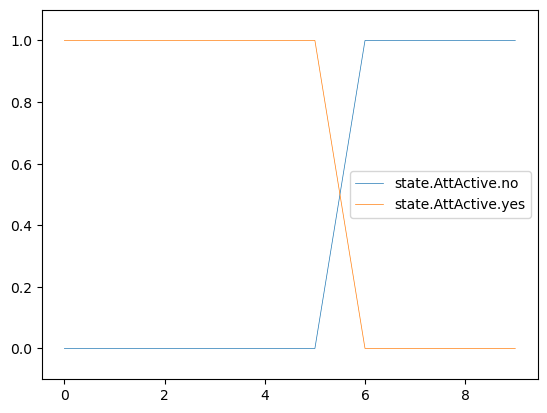

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                   user_files                           success   
4                         none                           success   
5                   user_files                           failure   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                    perms_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

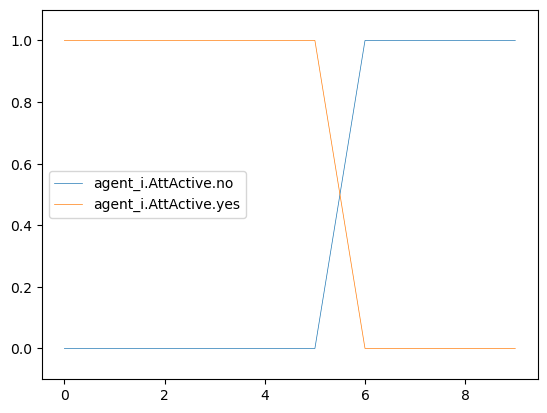

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00   DecoyAccount    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.000003           9.999967e-01            Nop       FileRecon   
4              0.009350           9.906499e-01            Nop  ManipulateData   
5              0.010945           9.890546e-01            Nop            Exit   
6              0.691973           3.080266e-01            Nop             Nop   
7              0.896568           1.034319e-01            Nop             Nop   
8              0.992291           7.708862e-03            Nop             Nop   
9              1.000000           3.557423e-07            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                       file_write  
6                        file_enum  
7                             none  
8                             none  
9                        file_enum

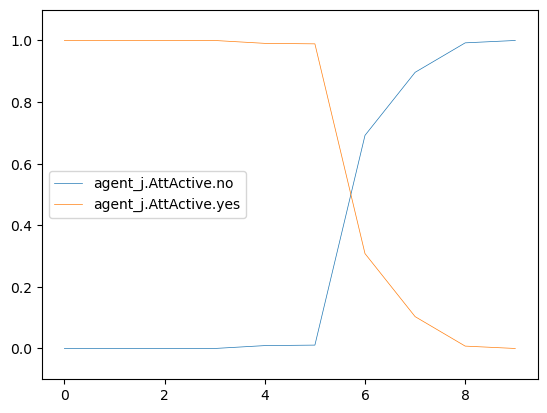

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

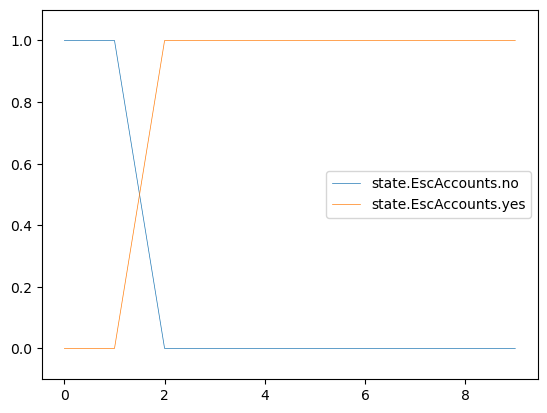

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.083333                 0.916667      PrivEscAcc   
3                0.071318                 0.928682       FileRecon   
4                0.038302                 0.961698  ManipulateData   
5                0.022829                 0.977171            Exit   
6                0.022829                 0.977171             Nop   
7                0.022829                 0.977171             Nop   
8                0.022829                 0.977171             Nop   
9                0.022829                 0.977171             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           success                            none  
3                           success                    perms_change  
4                           success                            none  
5                           failure                            none  
6                           failure                            none  
7                           failure                            none  
8                           success                            none  
9                           failure                            none

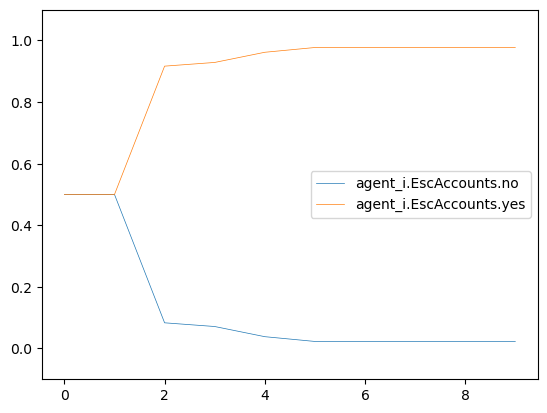

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

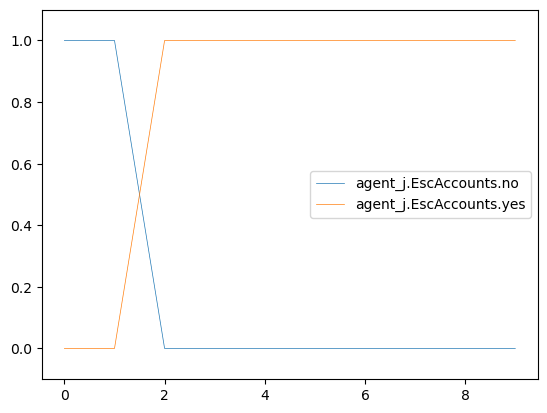

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                0.0                 1.0      PrivEscAcc            Nop
3                0.0                 1.0       FileRecon            Nop
4                0.0                 1.0  ManipulateData            Nop
5                0.0                 1.0            Exit            Nop
6                0.0                 1.0             Nop            Nop
7                0.0                 1.0             Nop            Nop
8                0.0                 1.0             Nop            Nop
9                0.0                 1.0             Nop            Nop

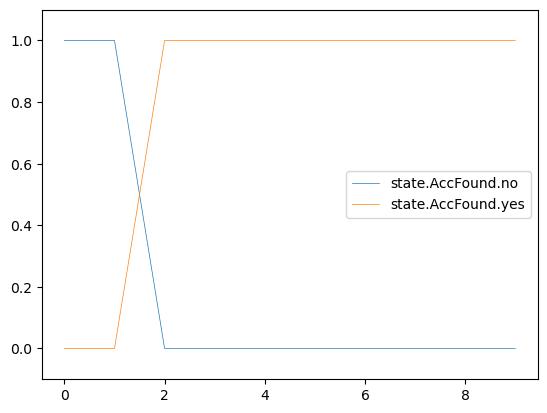

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.125000              0.875000      PrivEscAcc            Nop   
3             0.113531              0.886469       FileRecon            Nop   
4             0.060972              0.939028  ManipulateData            Nop   
5             0.036342              0.963658            Exit            Nop   
6             0.036342              0.963658             Nop            Nop   
7             0.036342              0.963658             Nop            Nop   
8             0.036342              0.963658             Nop            Nop   
9             0.036342              0.963658             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                   user_files                           success   
4                         none                           success   
5                   user_files                           failure   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                    perms_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

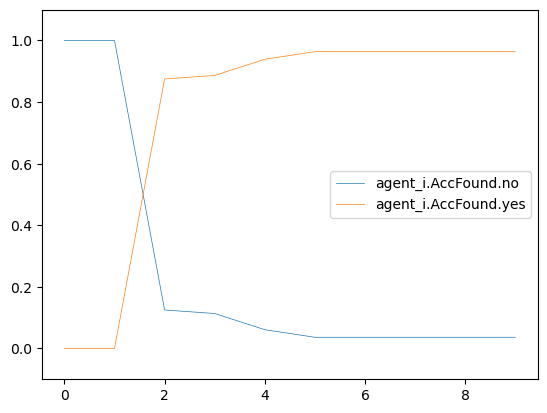

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310938              0.689063            Nop      PrivEscAcc   
3             0.097425              0.902575            Nop       FileRecon   
4             0.054096              0.945904            Nop  ManipulateData   
5             0.017132              0.982868            Nop            Exit   
6             0.013321              0.986679            Nop             Nop   
7             0.012518              0.987482            Nop             Nop   
8             0.013095              0.986905            Nop             Nop   
9             0.013095              0.986905            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                       file_write  
6                        file_enum  
7                             none  
8                             none  
9                        file_enum

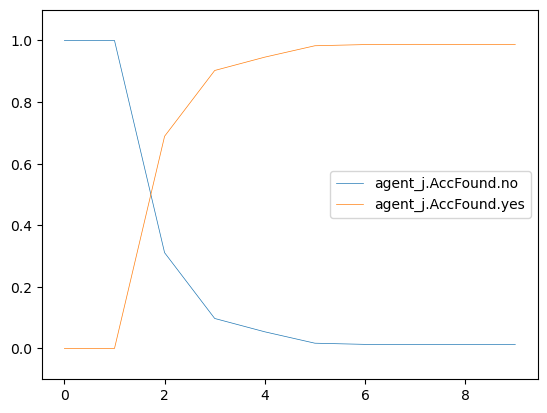

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0      PrivEscAcc            Nop
3                   1.0                   0.0       FileRecon            Nop
4                   1.0                   0.0  ManipulateData            Nop
5                   1.0                   0.0            Exit            Nop
6                   1.0                   0.0             Nop            Nop
7                   1.0                   0.0             Nop            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

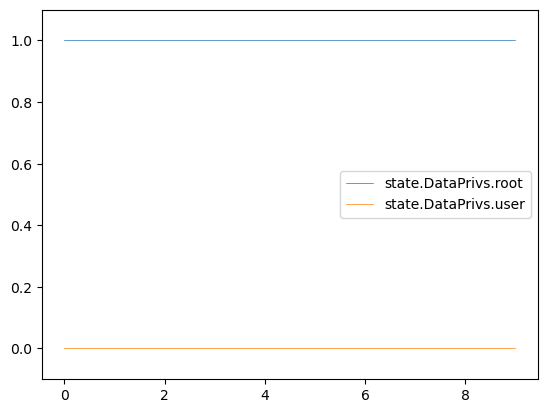

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895      PrivEscAcc   
3                0.592105                0.407895       FileRecon   
4                0.652050                0.347950  ManipulateData   
5                0.680141                0.319859            Exit   
6                0.680141                0.319859             Nop   
7                0.680141                0.319859             Nop   
8                0.680141                0.319859             Nop   
9                0.680141                0.319859             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           success                            none  
3                           success                    perms_change  
4                           success                            none  
5                           failure                            none  
6                           failure                            none  
7                           failure                            none  
8                           success                            none  
9                           failure                            none

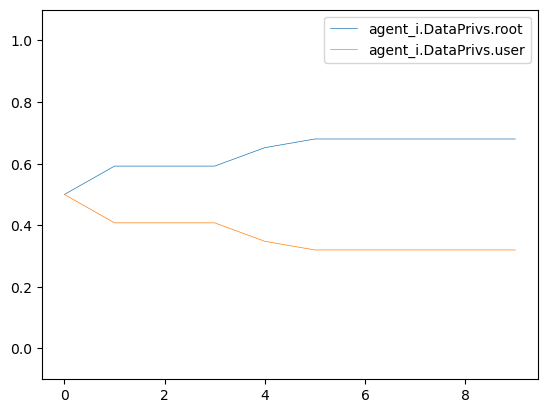

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

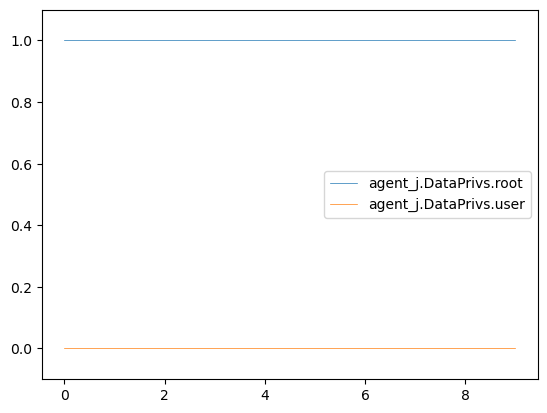

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0       FileRecon   
4                    1.0                     0.0  ManipulateData   
5                    0.0                     1.0            Exit   
6                    0.0                     1.0             Nop   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

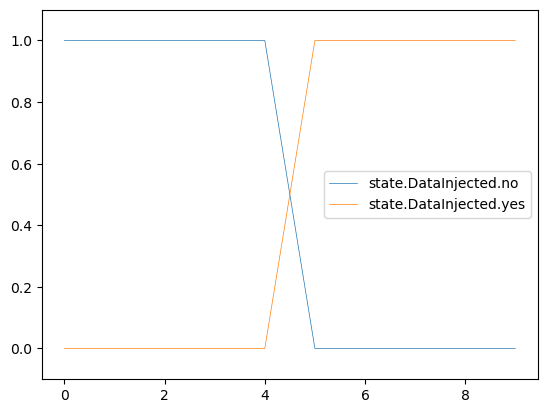

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000306                  0.999694            Exit   
6                 0.000306                  0.999694             Nop   
7                 0.000306                  0.999694             Nop   
8                 0.000306                  0.999694             Nop   
9                 0.000306                  0.999694             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           success                            none  
3                           success                    perms_change  
4                           success                            none  
5                           failure                            none  
6                           failure                            none  
7                           failure                            none  
8                           success                            none  
9                           failure                            none

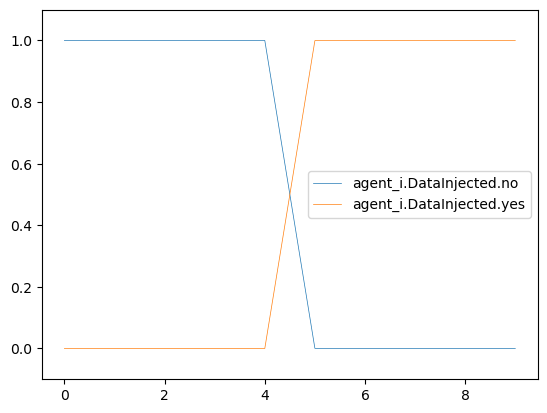

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.126646                  0.873354            Nop   
6                 0.070048                  0.929952            Nop   
7                 0.098465                  0.901535            Nop   
8                 0.049738                  0.950262            Nop   
9                 0.049736                  0.950264            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

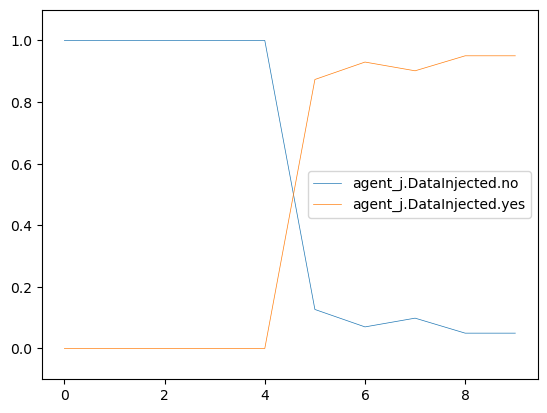

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.577778                        0.422222   
3                         0.472629                        0.527371   
4                         0.466764                        0.533236   
5                         0.463273                        0.536727   
6                         0.471661                        0.528339   
7                         0.461747                        0.538253   
8                         0.461747                        0.538253   
9                         0.461747                        0.538253   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

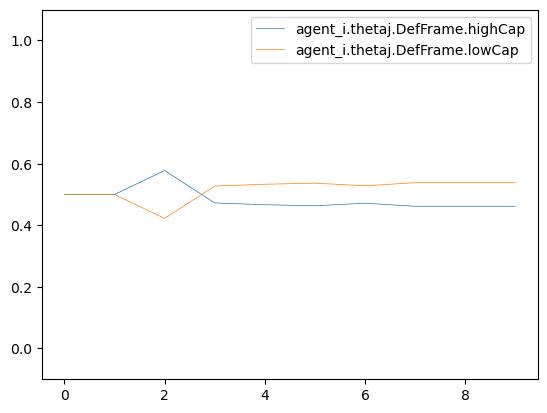

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                        file_enum
6                               1.0                       file_write
7                               1.0                   login_activity
8                               1.0                   login_activity
9                               1.0                             none

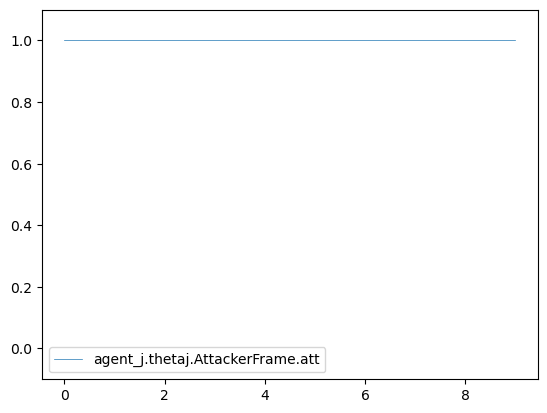

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0      PrivEscAcc            Nop  
3                      1.0       FileRecon            Nop  
4                      1.0       FileRecon            Nop  
5                      1.0       FileRecon            Nop  
6                      1.0  ManipulateData            Nop  
7                      1.0            Exit            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

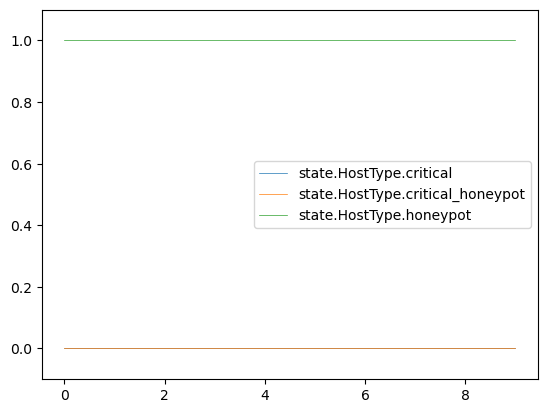

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0       FileRecon            Nop   
5                        0.0       FileRecon            Nop   
6                        0.0  ManipulateData            Nop   
7                        0.0            Exit            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

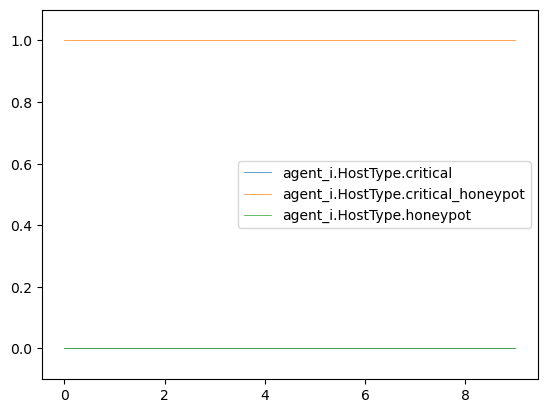

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop       FileRecon   
6                        1.0            Nop  ManipulateData   
7                        1.0            Nop            Exit   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                   login_activity  
8                   login_activity  
9                             none

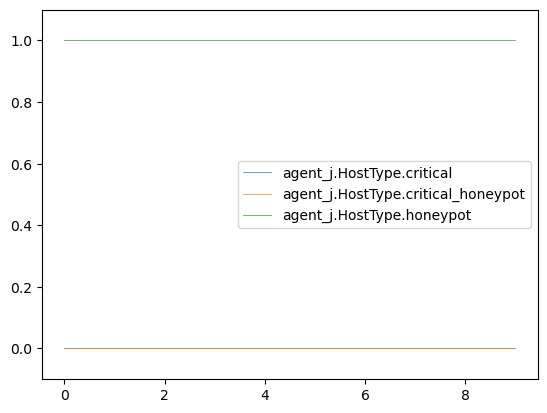

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0      PrivEscAcc            Nop
3                 1.0                  0.0       FileRecon            Nop
4                 1.0                  0.0       FileRecon            Nop
5                 1.0                  0.0       FileRecon            Nop
6                 1.0                  0.0  ManipulateData            Nop
7                 1.0                  0.0            Exit            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

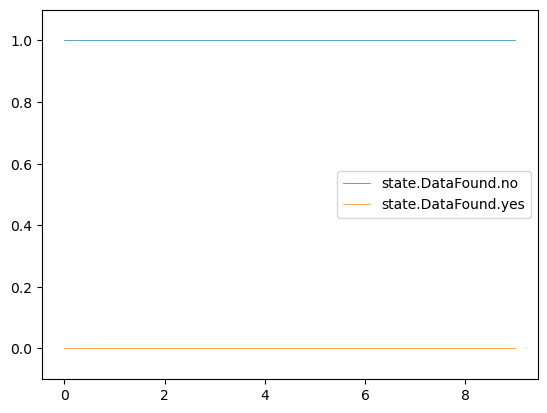

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.961213               0.038787       FileRecon            Nop   
5              0.983032               0.016968       FileRecon            Nop   
6              0.680568               0.319431  ManipulateData            Nop   
7              0.999530               0.000470            Exit            Nop   
8              0.999530               0.000470             Nop            Nop   
9              0.999530               0.000470             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

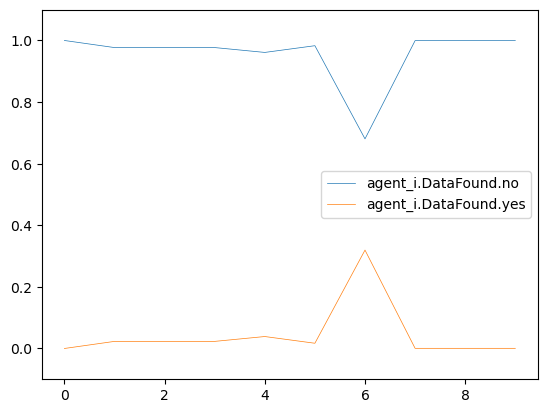

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.579282               0.420718            Nop       FileRecon   
5              0.337415               0.662585            Nop       FileRecon   
6              0.228639               0.771361            Nop  ManipulateData   
7              0.081384               0.918616            Nop            Exit   
8              0.081364               0.918636            Nop             Nop   
9              0.081364               0.918636            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                   login_activity  
8                   login_activity  
9                             none

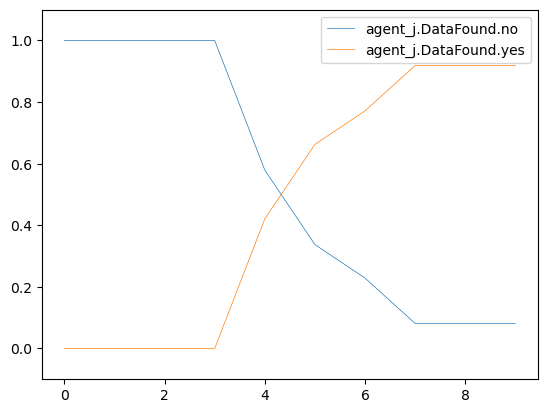

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0      PrivEscAcc   
3                     0.0                     1.0       FileRecon   
4                     0.0                     1.0       FileRecon   
5                     0.0                     1.0       FileRecon   
6                     0.0                     1.0  ManipulateData   
7                     0.0                     1.0            Exit   
8                     0.0                     1.0             Nop   
9                     0.0                     1.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

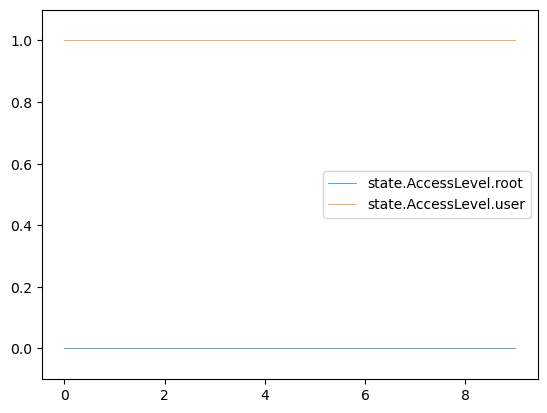

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.874325                  0.125675       FileRecon   
4                  0.847946                  0.152054       FileRecon   
5                  0.831976                  0.168024       FileRecon   
6                  0.870351                  0.129648  ManipulateData   
7                  0.824994                  0.175006            Exit   
8                  0.824994                  0.175006             Nop   
9                  0.824994                  0.175006             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           success                            none  
3                           failure                            none  
4                           failure                            none  
5                           success                            none  
6                           failure                            none  
7                           failure                            none  
8                           failure                            none  
9                           failure                            none

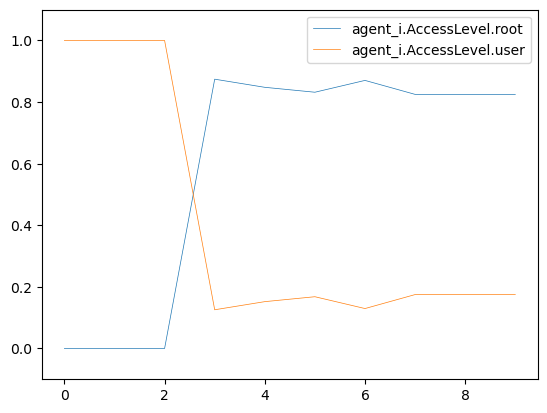

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.199936                  0.800064            Nop   
4                  0.610556                  0.389444            Nop   
5                  0.828300                  0.171700            Nop   
6                  0.921705                  0.078295            Nop   
7                  0.979064                  0.020936            Nop   
8                  0.979064                  0.020936            Nop   
9                  0.979064                  0.020936            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                   login_activity  
8             Nop                   login_activity  
9             Nop                             none

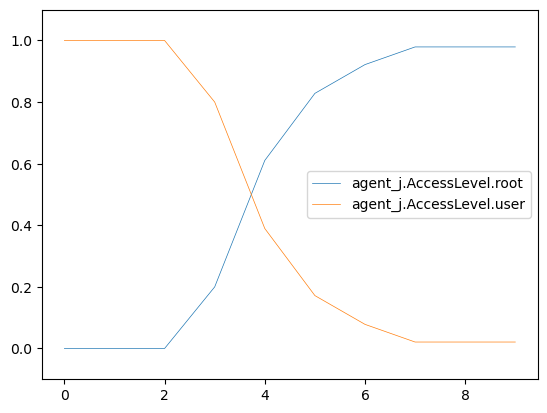

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0       FileRecon            Nop
5                   0.0                    1.0       FileRecon            Nop
6                   0.0                    1.0  ManipulateData            Nop
7                   0.0                    1.0            Exit            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

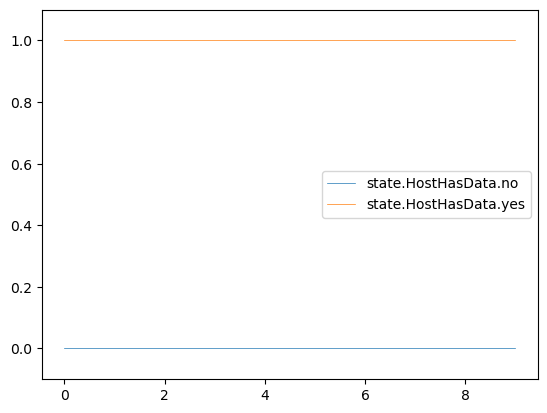

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.775833                 0.224167       FileRecon   
5                0.881148                 0.118852       FileRecon   
6                0.630955                 0.369045  ManipulateData   
7                0.926665                 0.073335            Exit   
8                0.926665                 0.073335             Nop   
9                0.926665                 0.073335             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           success                            none  
3                           failure                            none  
4                           failure                            none  
5                           success                            none  
6                           failure                            none  
7                           failure                            none  
8                           failure                            none  
9                           failure                            none

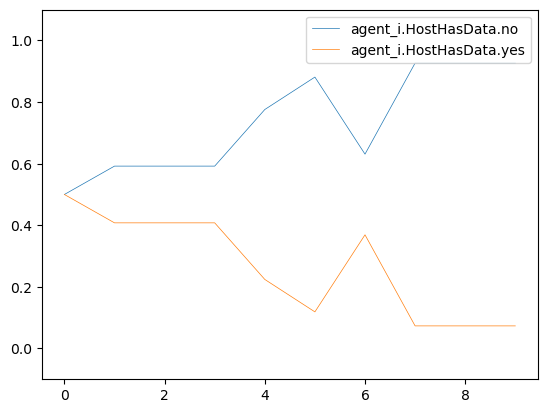

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                   login_activity  
8             Nop                   login_activity  
9             Nop                             none

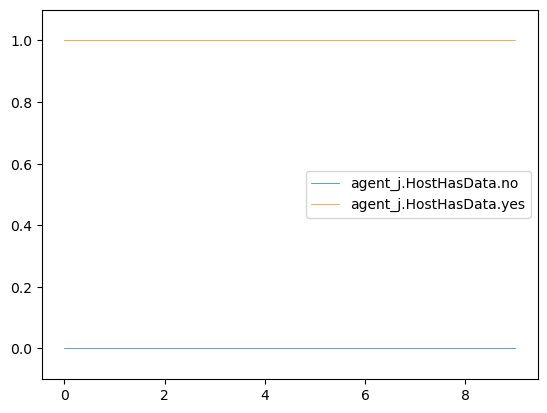

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0      PrivEscAcc            Nop
3                 0.0                  1.0       FileRecon            Nop
4                 0.0                  1.0       FileRecon            Nop
5                 0.0                  1.0       FileRecon            Nop
6                 0.0                  1.0  ManipulateData            Nop
7                 0.0                  1.0            Exit            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

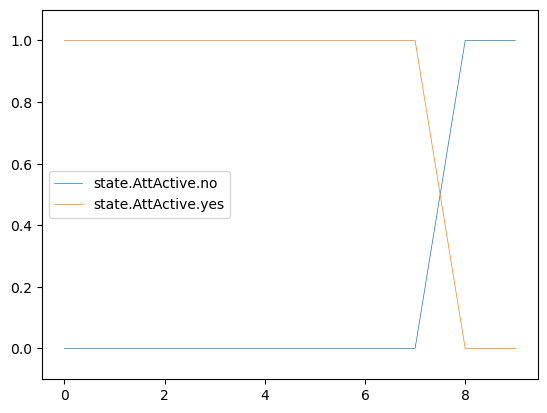

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0       FileRecon            Nop   
6                   0.0                    1.0  ManipulateData            Nop   
7                   0.0                    1.0            Exit            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

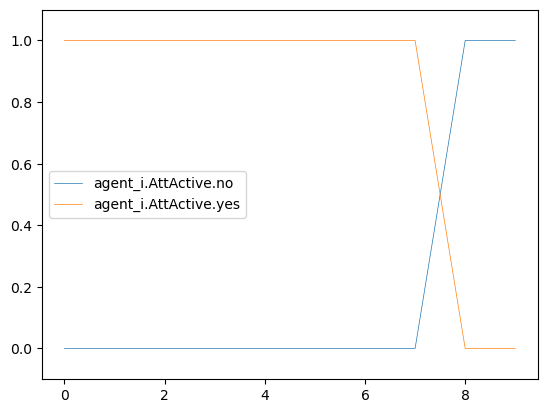

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000               1.000000            Nop       FileRecon   
1              0.000000               1.000000   DecoyAccount    EnumAccounts   
2              0.000000               1.000000            Nop      PrivEscAcc   
3              0.000005               0.999995            Nop       FileRecon   
4              0.291929               0.708071            Nop       FileRecon   
5              0.167492               0.832508            Nop       FileRecon   
6              0.153344               0.846656            Nop  ManipulateData   
7              0.139892               0.860108            Nop            Exit   
8              0.996494               0.003506            Nop             Nop   
9              0.999974               0.000026            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                   login_activity  
8                   login_activity  
9                             none

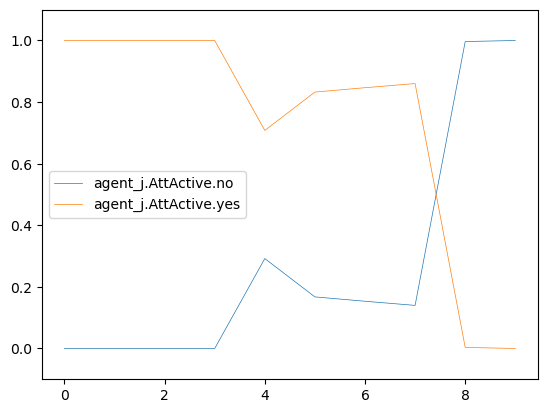

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0       FileRecon            Nop
5                   0.0                    1.0       FileRecon            Nop
6                   0.0                    1.0  ManipulateData            Nop
7                   0.0                    1.0            Exit            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

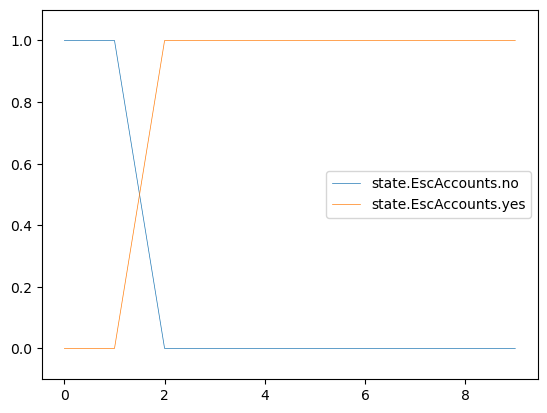

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.083333                 0.916667      PrivEscAcc   
3                0.071318                 0.928682       FileRecon   
4                0.086361                 0.913639       FileRecon   
5                0.095432                 0.904568       FileRecon   
6                0.073636                 0.926364  ManipulateData   
7                0.099397                 0.900603            Exit   
8                0.099397                 0.900603             Nop   
9                0.099397                 0.900603             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           success                            none  
3                           failure                            none  
4                           failure                            none  
5                           success                            none  
6                           failure                            none  
7                           failure                            none  
8                           failure                            none  
9                           failure                            none

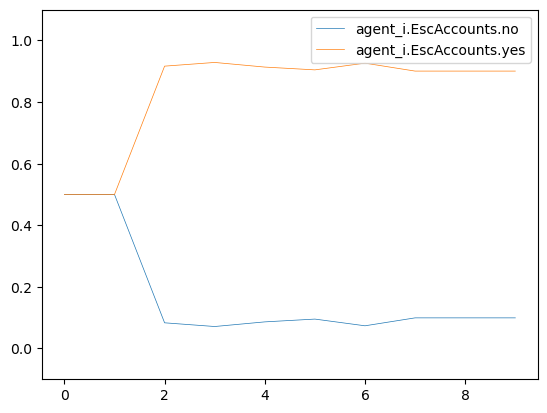

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                   login_activity  
8             Nop                   login_activity  
9             Nop                             none

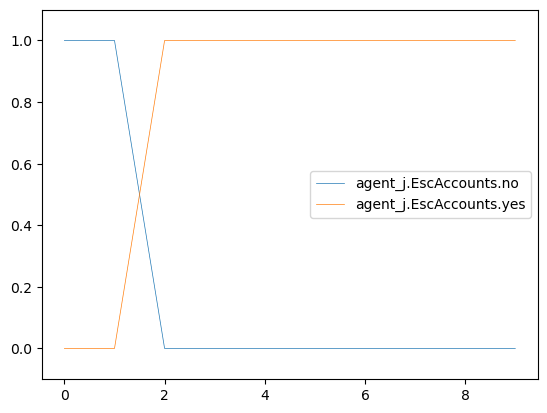

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                1.0                 0.0      PrivEscAcc            Nop
3                1.0                 0.0       FileRecon            Nop
4                1.0                 0.0       FileRecon            Nop
5                1.0                 0.0       FileRecon            Nop
6                1.0                 0.0  ManipulateData            Nop
7                1.0                 0.0            Exit            Nop
8                1.0                 0.0             Nop            Nop
9                1.0                 0.0             Nop            Nop

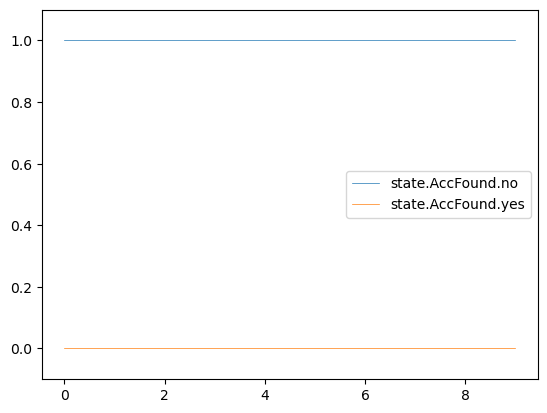

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.125000              0.875000      PrivEscAcc            Nop   
3             0.113531              0.886469       FileRecon            Nop   
4             0.137484              0.862516       FileRecon            Nop   
5             0.151924              0.848076       FileRecon            Nop   
6             0.117226              0.882774  ManipulateData            Nop   
7             0.158237              0.841763            Exit            Nop   
8             0.158237              0.841763             Nop            Nop   
9             0.158237              0.841763             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

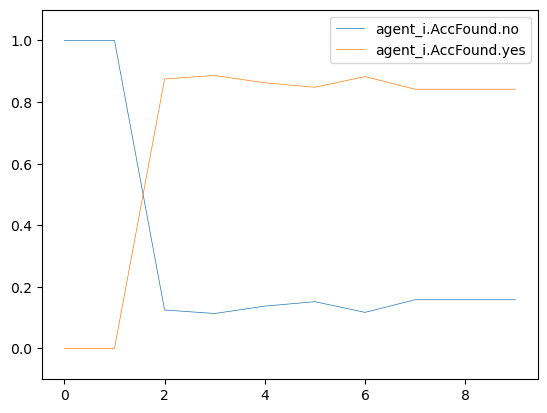

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310938              0.689063            Nop      PrivEscAcc   
3             0.619900              0.380100            Nop       FileRecon   
4             0.315250              0.684750            Nop       FileRecon   
5             0.139229              0.860771            Nop       FileRecon   
6             0.063527              0.936473            Nop  ManipulateData   
7             0.016994              0.983006            Nop            Exit   
8             0.016994              0.983006            Nop             Nop   
9             0.016994              0.983006            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                   login_activity  
8                   login_activity  
9                             none

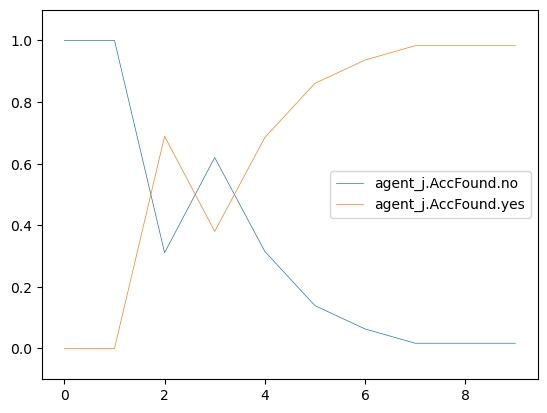

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0      PrivEscAcc            Nop
3                   1.0                   0.0       FileRecon            Nop
4                   1.0                   0.0       FileRecon            Nop
5                   1.0                   0.0       FileRecon            Nop
6                   1.0                   0.0  ManipulateData            Nop
7                   1.0                   0.0            Exit            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

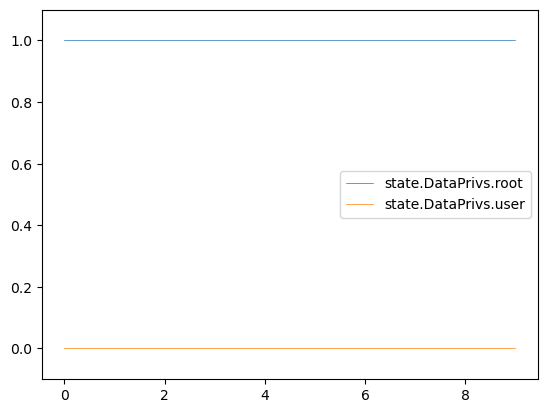

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895      PrivEscAcc   
3                0.592105                0.407895       FileRecon   
4                0.564767                0.435233       FileRecon   
5                0.542882                0.457119       FileRecon   
6                0.598342                0.401658  ManipulateData   
7                0.532791                0.467208            Exit   
8                0.532791                0.467208             Nop   
9                0.532791                0.467208             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           success                            none  
3                           failure                            none  
4                           failure                            none  
5                           success                            none  
6                           failure                            none  
7                           failure                            none  
8                           failure                            none  
9                           failure                            none

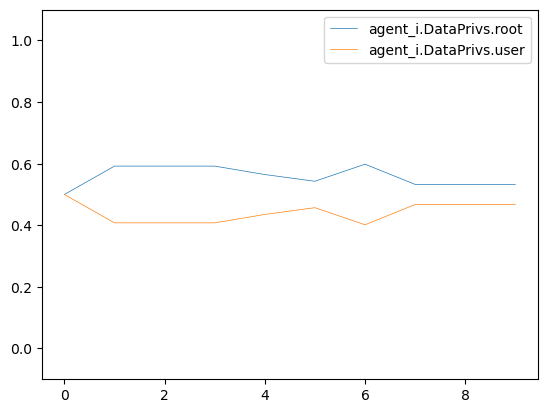

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                   login_activity  
8             Nop                   login_activity  
9             Nop                             none

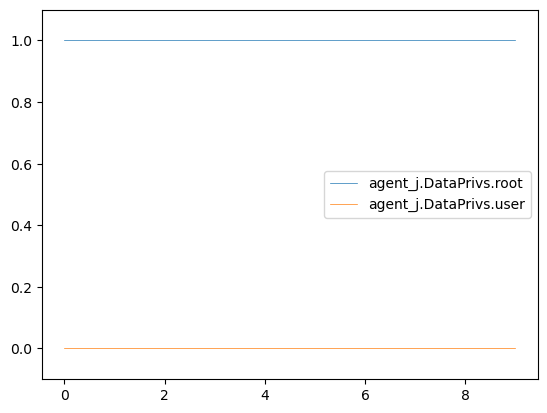

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0       FileRecon   
4                    1.0                     0.0       FileRecon   
5                    1.0                     0.0       FileRecon   
6                    1.0                     0.0  ManipulateData   
7                    1.0                     0.0            Exit   
8                    1.0                     0.0             Nop   
9                    1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

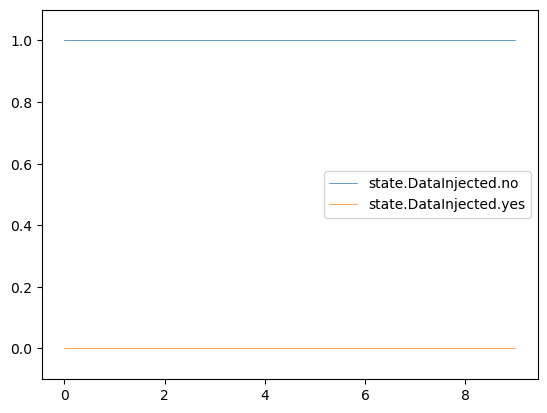

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                  1.00000                   0.00000       FileRecon   
1                  1.00000                   0.00000    EnumAccounts   
2                  1.00000                   0.00000      PrivEscAcc   
3                  1.00000                   0.00000       FileRecon   
4                  1.00000                   0.00000       FileRecon   
5                  1.00000                   0.00000       FileRecon   
6                  1.00000                   0.00000  ManipulateData   
7                  0.99953                   0.00047            Exit   
8                  0.99953                   0.00047             Nop   
9                  0.99953                   0.00047             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           success                            none  
3                           failure                            none  
4                           failure                            none  
5                           success                            none  
6                           failure                            none  
7                           failure                            none  
8                           failure                            none  
9                           failure                            none

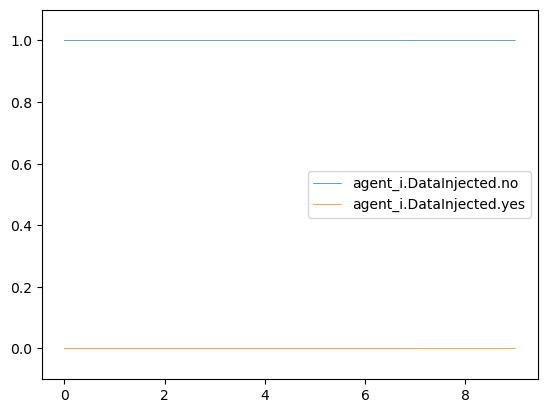

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.834285                  0.165715            Nop   
6                 0.720789                  0.279211            Nop   
7                 0.097127                  0.902873            Nop   
8                 0.093783                  0.906217            Nop   
9                 0.093759                  0.906241            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                   login_activity  
8             Nop                   login_activity  
9             Nop                             none

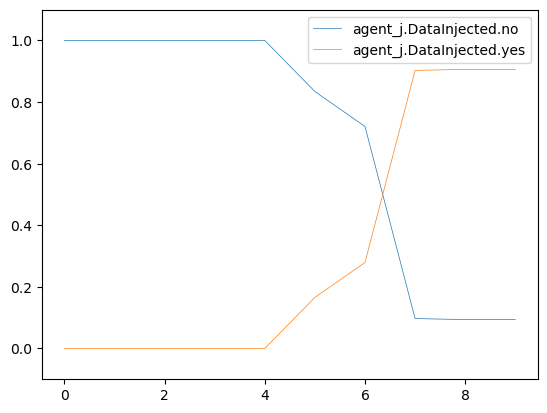

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.577778                        0.422222   
3                         0.472629                        0.527371   
4                         0.485262                        0.514738   
5                         0.491216                        0.508784   
6                         0.491216                        0.508784   
7                         0.491216                        0.508784   
8                         0.491216                        0.508784   
9                         0.491216                        0.508784   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

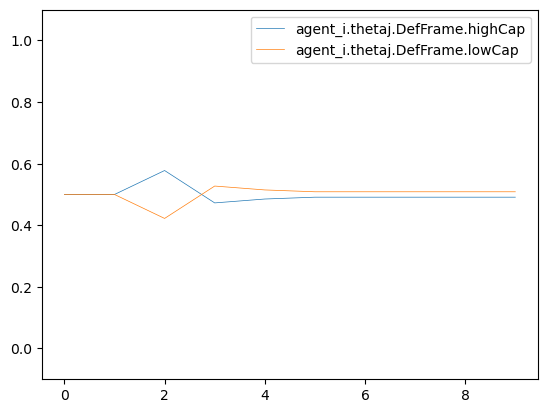

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                   login_activity
6                               1.0                             none
7                               1.0                       file_write
8                               1.0                             none
9                               1.0                             none

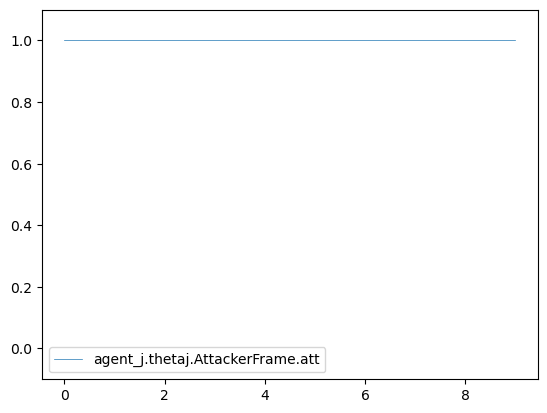

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0      PrivEscAcc            Nop  
3                      1.0       FileRecon            Nop  
4                      1.0  ManipulateData            Nop  
5                      1.0            Exit            Nop  
6                      1.0             Nop            Nop  
7                      1.0             Nop            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

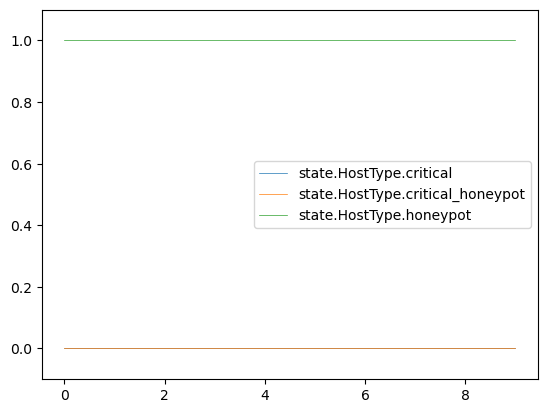

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

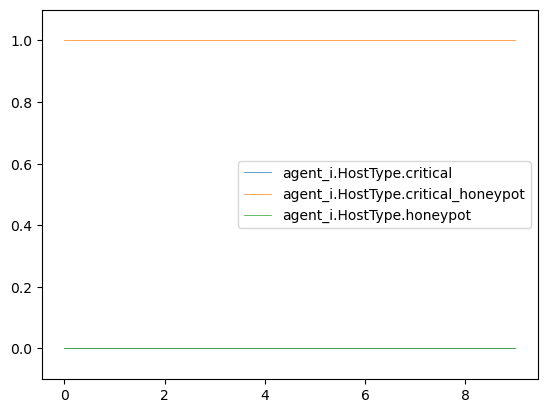

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                   login_activity  
6                             none  
7                       file_write  
8                             none  
9                             none

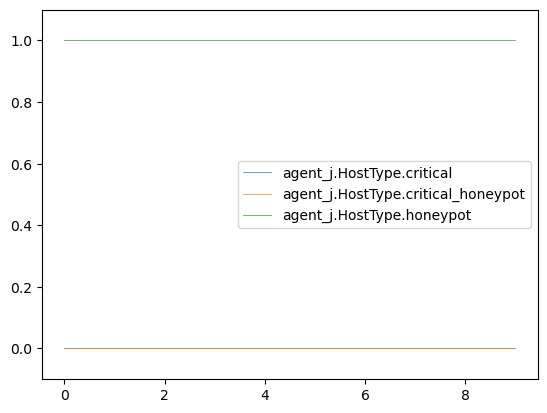

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0      PrivEscAcc            Nop
3                 1.0                  0.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 0.0                  1.0             Nop            Nop
7                 0.0                  1.0             Nop            Nop
8                 0.0                  1.0             Nop            Nop
9                 0.0                  1.0             Nop            Nop

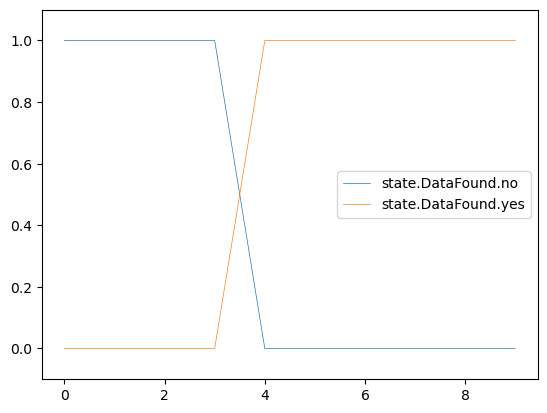

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.234274               0.765727  ManipulateData            Nop   
5              0.000306               0.999694            Exit            Nop   
6              0.000306               0.999694             Nop            Nop   
7              0.000306               0.999694             Nop            Nop   
8              0.000306               0.999694             Nop            Nop   
9              0.000306               0.999694             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

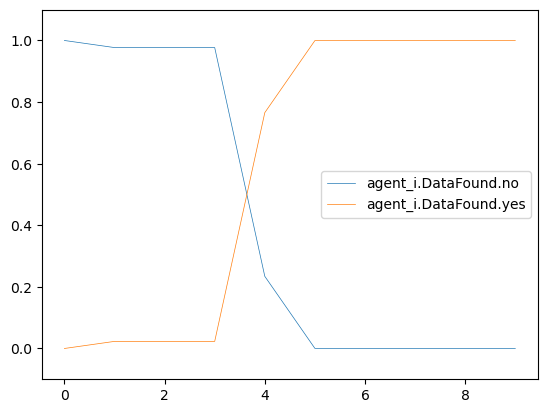

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.339744               0.660256            Nop  ManipulateData   
5              0.075347               0.924654            Nop            Exit   
6              0.036185               0.963815            Nop             Nop   
7              0.025230               0.974770            Nop             Nop   
8              0.025304               0.974696            Nop             Nop   
9              0.025304               0.974696            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                   login_activity  
6                             none  
7                       file_write  
8                             none  
9                             none

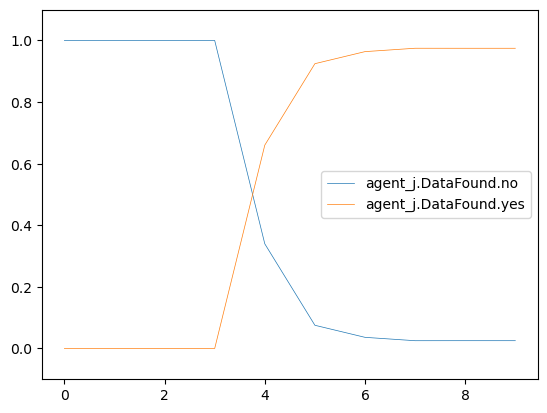

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0      PrivEscAcc   
3                     1.0                     0.0       FileRecon   
4                     1.0                     0.0  ManipulateData   
5                     1.0                     0.0            Exit   
6                     1.0                     0.0             Nop   
7                     1.0                     0.0             Nop   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

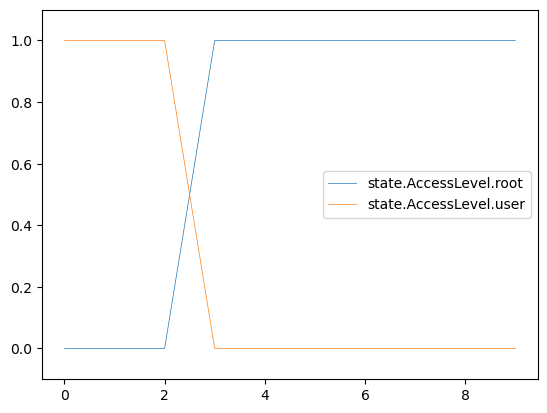

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.874325                  0.125675       FileRecon   
4                  0.932575                  0.067425  ManipulateData   
5                  0.959813                  0.040187            Exit   
6                  0.959813                  0.040187             Nop   
7                  0.959813                  0.040187             Nop   
8                  0.959813                  0.040187             Nop   
9                  0.959813                  0.040187             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           success                            none  
3                           success                            none  
4                           success                            none  
5                           failure                            none  
6                           success                            none  
7                           failure                            none  
8                           failure                            none  
9                           failure                            none

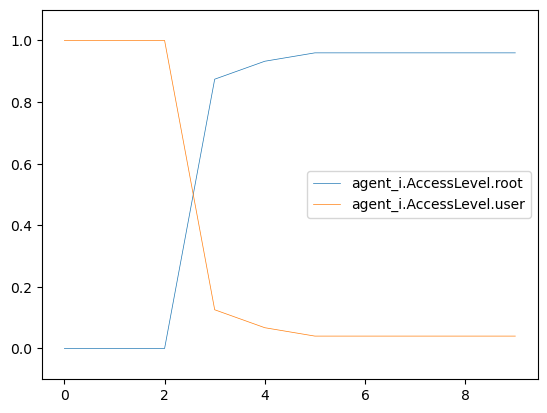

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.886277                  0.113723            Nop   
4                  0.943528                  0.056472            Nop   
5                  0.982340                  0.017660            Nop   
6                  0.982340                  0.017660            Nop   
7                  0.981447                  0.018553            Nop   
8                  0.981613                  0.018387            Nop   
9                  0.981613                  0.018387            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                   login_activity  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

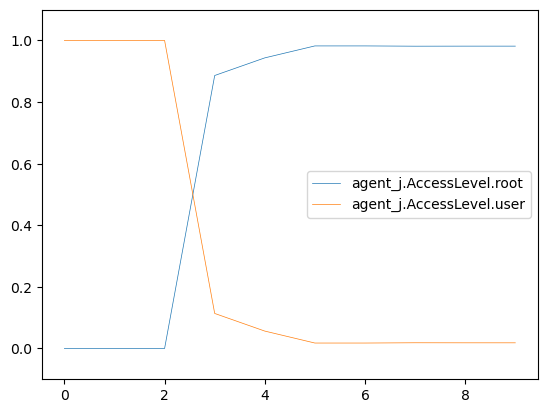

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

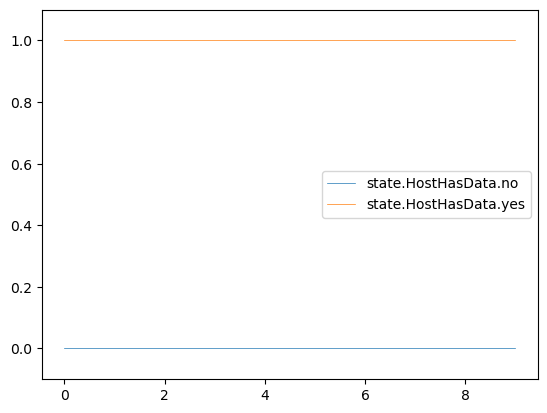

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.189091                 0.810909  ManipulateData   
5                0.000247                 0.999753            Exit   
6                0.000247                 0.999753             Nop   
7                0.000247                 0.999753             Nop   
8                0.000247                 0.999753             Nop   
9                0.000247                 0.999753             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           success                            none  
3                           success                            none  
4                           success                            none  
5                           failure                            none  
6                           success                            none  
7                           failure                            none  
8                           failure                            none  
9                           failure                            none

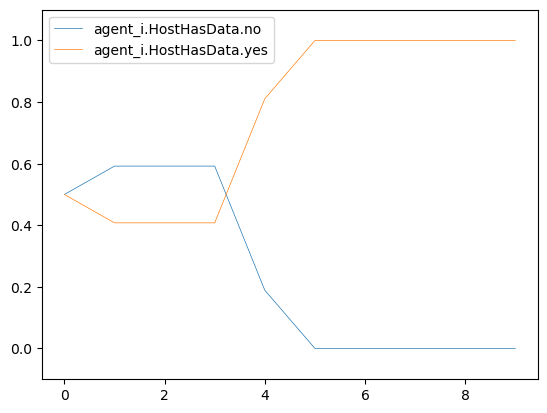

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                   login_activity  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

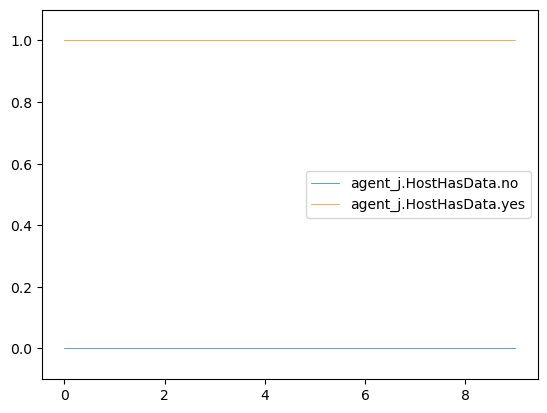

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0      PrivEscAcc            Nop
3                 0.0                  1.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 1.0                  0.0             Nop            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

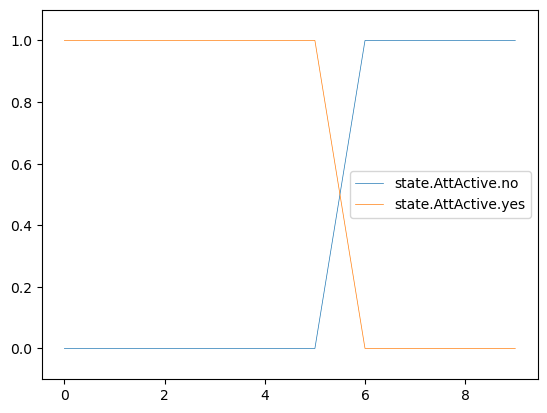

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

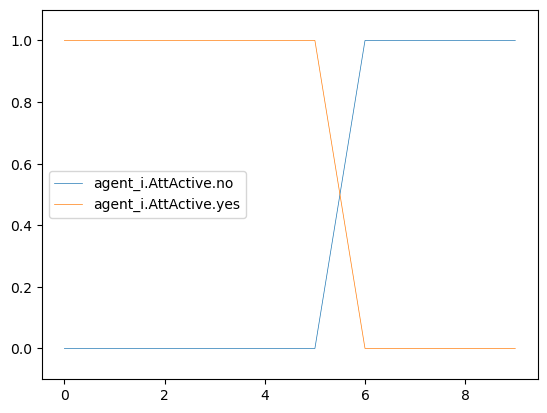

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00   DecoyAccount    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.000003           9.999967e-01            Nop       FileRecon   
4              0.009350           9.906499e-01            Nop  ManipulateData   
5              0.010945           9.890546e-01            Nop            Exit   
6              0.890277           1.097231e-01            Nop             Nop   
7              0.991512           8.488414e-03            Nop             Nop   
8              0.989485           1.051470e-02            Nop             Nop   
9              1.000000           9.914594e-09            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                   login_activity  
6                             none  
7                       file_write  
8                             none  
9                             none

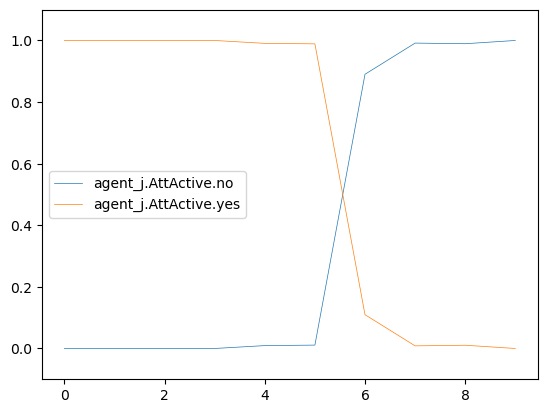

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

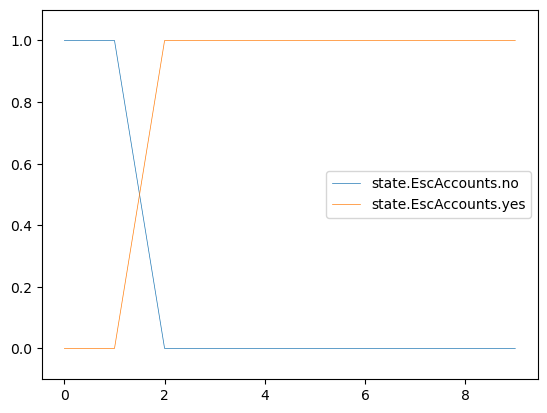

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.083333                 0.916667      PrivEscAcc   
3                0.071318                 0.928682       FileRecon   
4                0.038295                 0.961705  ManipulateData   
5                0.022825                 0.977175            Exit   
6                0.022825                 0.977175             Nop   
7                0.022825                 0.977175             Nop   
8                0.022825                 0.977175             Nop   
9                0.022825                 0.977175             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           success                            none  
3                           success                            none  
4                           success                            none  
5                           failure                            none  
6                           success                            none  
7                           failure                            none  
8                           failure                            none  
9                           failure                            none

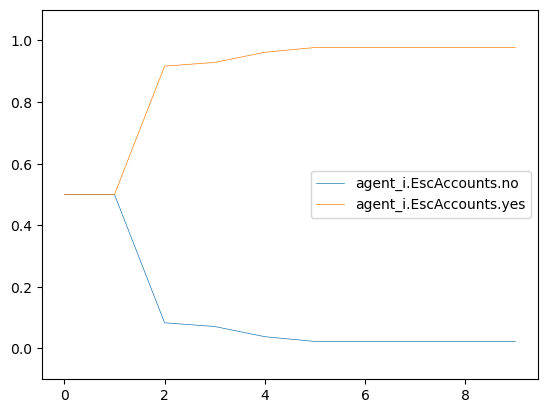

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                   login_activity  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

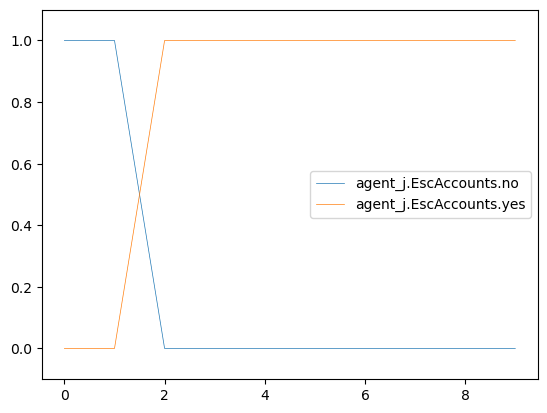

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                0.0                 1.0      PrivEscAcc            Nop
3                0.0                 1.0       FileRecon            Nop
4                0.0                 1.0  ManipulateData            Nop
5                0.0                 1.0            Exit            Nop
6                0.0                 1.0             Nop            Nop
7                0.0                 1.0             Nop            Nop
8                0.0                 1.0             Nop            Nop
9                0.0                 1.0             Nop            Nop

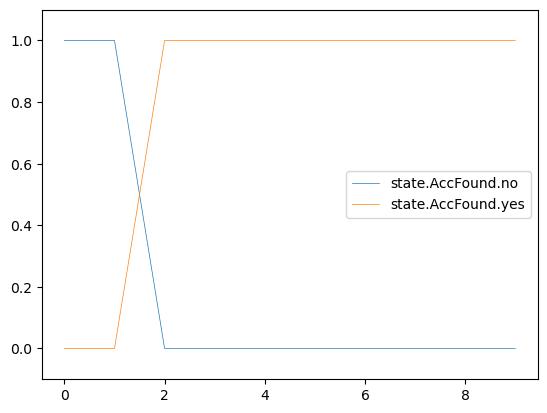

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.125000              0.875000      PrivEscAcc            Nop   
3             0.113531              0.886469       FileRecon            Nop   
4             0.060964              0.939036  ManipulateData            Nop   
5             0.036336              0.963664            Exit            Nop   
6             0.036336              0.963664             Nop            Nop   
7             0.036336              0.963664             Nop            Nop   
8             0.036336              0.963664             Nop            Nop   
9             0.036336              0.963664             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

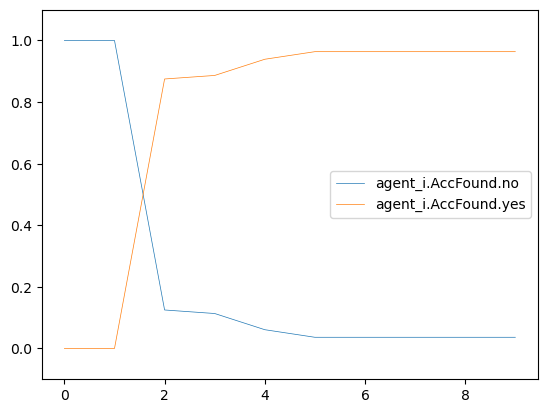

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310938              0.689063            Nop      PrivEscAcc   
3             0.097425              0.902575            Nop       FileRecon   
4             0.054096              0.945904            Nop  ManipulateData   
5             0.017132              0.982868            Nop            Exit   
6             0.017132              0.982869            Nop             Nop   
7             0.017998              0.982003            Nop             Nop   
8             0.017836              0.982164            Nop             Nop   
9             0.017836              0.982164            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                   login_activity  
6                             none  
7                       file_write  
8                             none  
9                             none

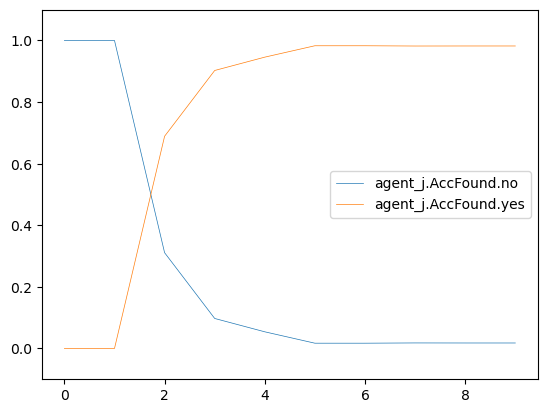

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0      PrivEscAcc            Nop
3                   1.0                   0.0       FileRecon            Nop
4                   1.0                   0.0  ManipulateData            Nop
5                   1.0                   0.0            Exit            Nop
6                   1.0                   0.0             Nop            Nop
7                   1.0                   0.0             Nop            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

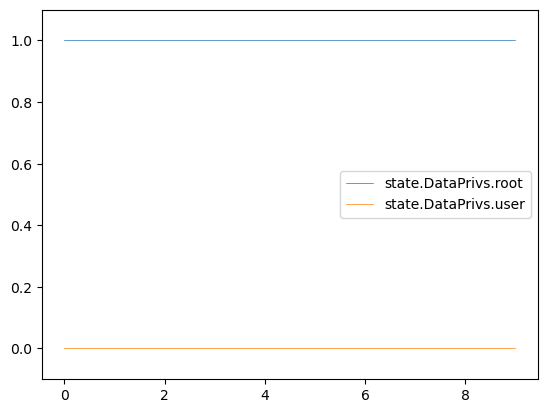

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895      PrivEscAcc   
3                0.592105                0.407895       FileRecon   
4                0.652072                0.347928  ManipulateData   
5                0.680171                0.319829            Exit   
6                0.680171                0.319829             Nop   
7                0.680171                0.319829             Nop   
8                0.680171                0.319829             Nop   
9                0.680171                0.319829             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           success                            none  
3                           success                            none  
4                           success                            none  
5                           failure                            none  
6                           success                            none  
7                           failure                            none  
8                           failure                            none  
9                           failure                            none

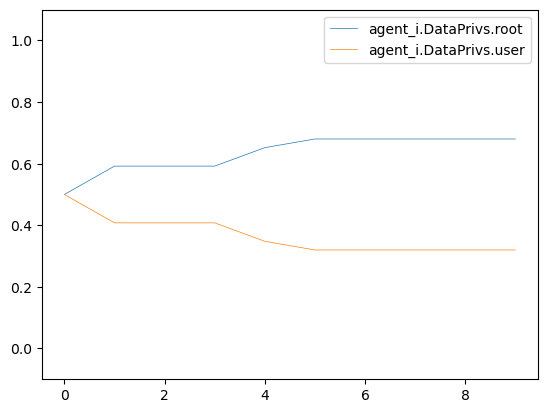

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                   login_activity  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

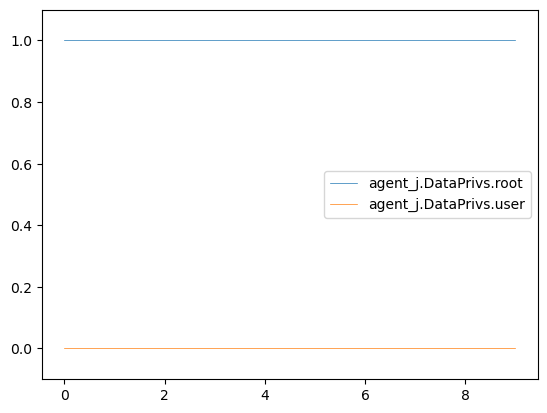

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0       FileRecon   
4                    1.0                     0.0  ManipulateData   
5                    0.0                     1.0            Exit   
6                    0.0                     1.0             Nop   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

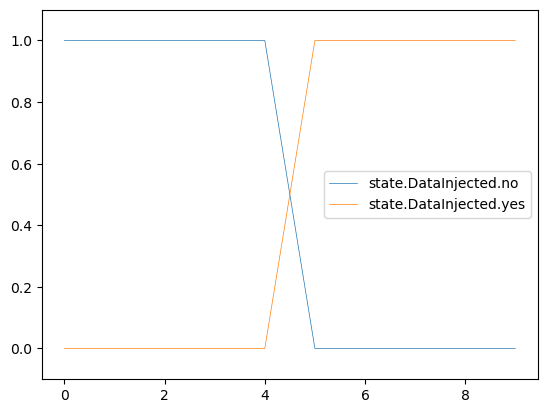

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000306                  0.999694            Exit   
6                 0.000306                  0.999694             Nop   
7                 0.000306                  0.999694             Nop   
8                 0.000306                  0.999694             Nop   
9                 0.000306                  0.999694             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           success                            none  
3                           success                            none  
4                           success                            none  
5                           failure                            none  
6                           success                            none  
7                           failure                            none  
8                           failure                            none  
9                           failure                            none

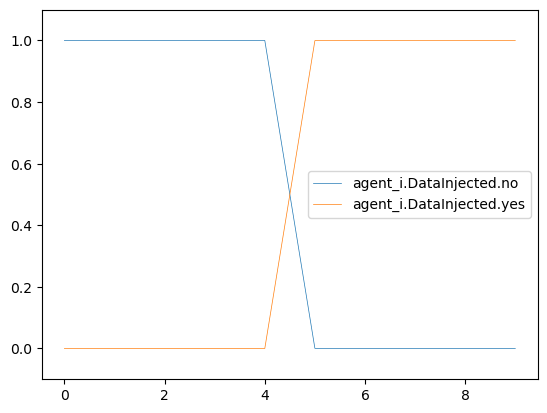

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.126646                  0.873354            Nop   
6                 0.080489                  0.919511            Nop   
7                 0.028459                  0.971541            Nop   
8                 0.027063                  0.972937            Nop   
9                 0.027063                  0.972937            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                   login_activity  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

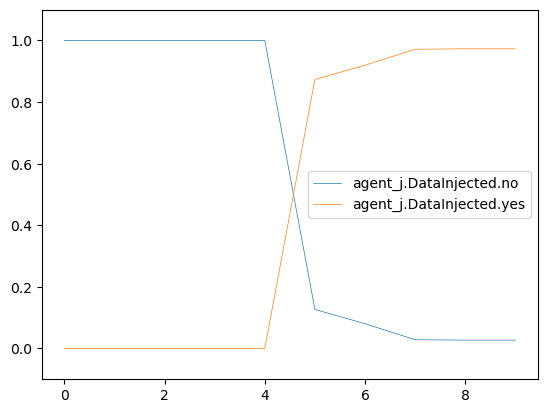

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.577778                        0.422222   
3                         0.472629                        0.527371   
4                         0.485988                        0.514012   
5                         0.491644                        0.508356   
6                         0.491644                        0.508356   
7                         0.491644                        0.508356   
8                         0.491644                        0.508356   
9                         0.491644                        0.508356   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1               acc_policy_change  
2                            none  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

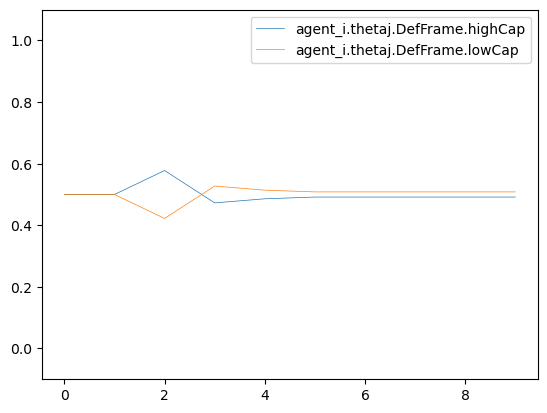

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                   login_activity
2                               1.0                       file_write
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                       file_write

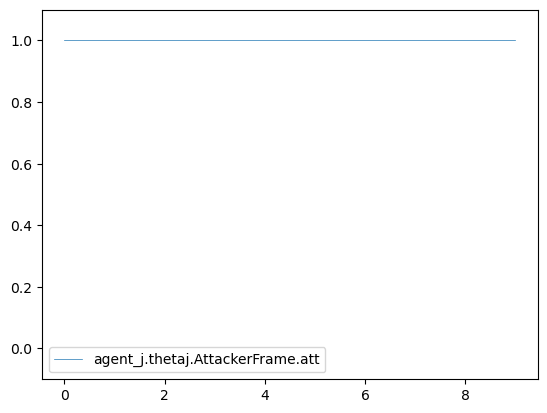

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0      PrivEscAcc            Nop  
3                      1.0       FileRecon            Nop  
4                      1.0  ManipulateData            Nop  
5                      1.0            Exit            Nop  
6                      1.0             Nop            Nop  
7                      1.0             Nop            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

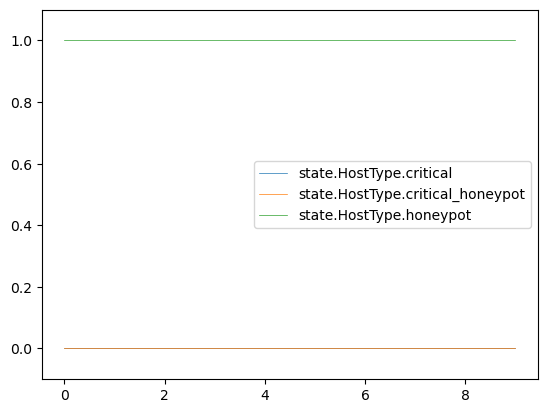

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1               acc_policy_change  
2                            none  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

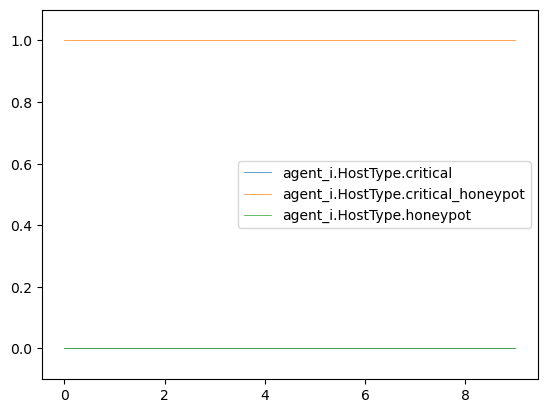

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                       file_write  
3                        file_enum  
4                       file_write  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                       file_write

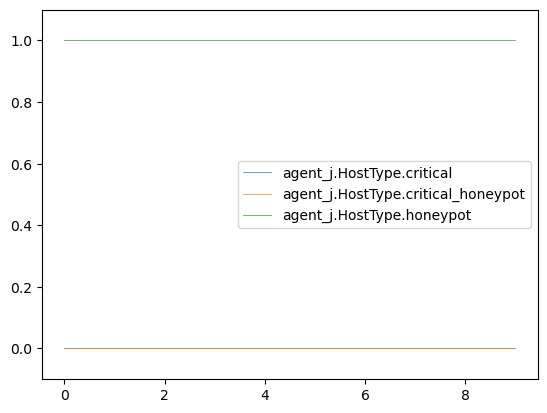

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0      PrivEscAcc            Nop
3                 1.0                  0.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 0.0                  1.0             Nop            Nop
7                 0.0                  1.0             Nop            Nop
8                 0.0                  1.0             Nop            Nop
9                 0.0                  1.0             Nop            Nop

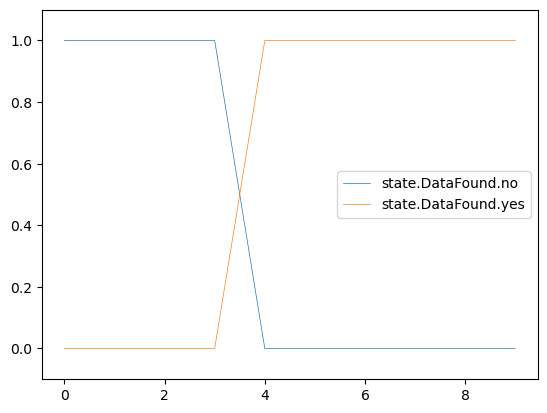

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.234710               0.765290  ManipulateData            Nop   
5              0.000307               0.999693            Exit            Nop   
6              0.000307               0.999693             Nop            Nop   
7              0.000307               0.999693             Nop            Nop   
8              0.000307               0.999693             Nop            Nop   
9              0.000307               0.999693             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1               acc_policy_change  
2                            none  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

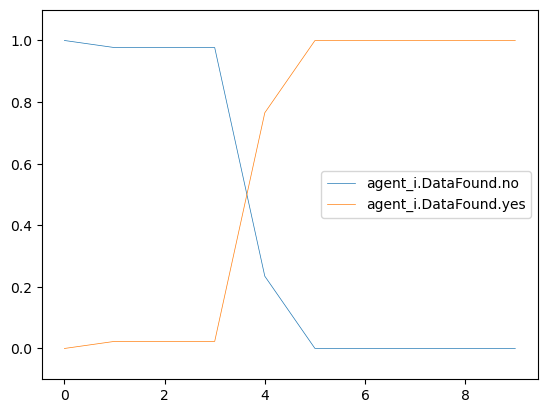

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.417278               0.582722            Nop  ManipulateData   
5              0.104456               0.895544            Nop            Exit   
6              0.058958               0.941042            Nop             Nop   
7              0.051092               0.948908            Nop             Nop   
8              0.051092               0.948908            Nop             Nop   
9              0.051092               0.948908            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                       file_write  
3                        file_enum  
4                       file_write  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                       file_write

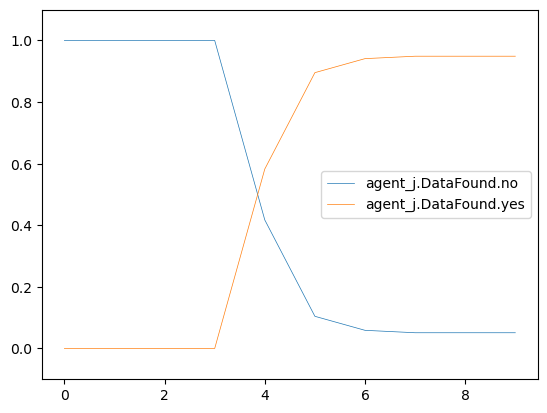

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0      PrivEscAcc   
3                     1.0                     0.0       FileRecon   
4                     1.0                     0.0  ManipulateData   
5                     1.0                     0.0            Exit   
6                     1.0                     0.0             Nop   
7                     1.0                     0.0             Nop   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

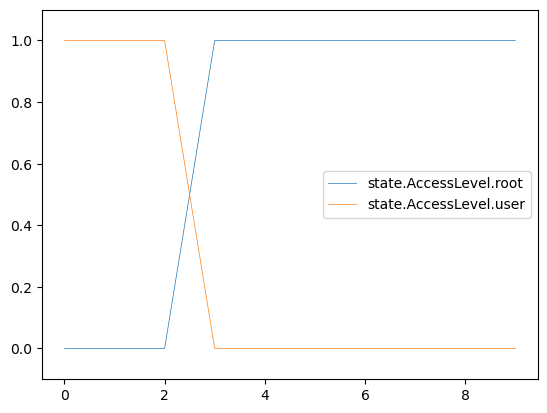

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.874325                  0.125675       FileRecon   
4                  0.931260                  0.068740  ManipulateData   
5                  0.959006                  0.040994            Exit   
6                  0.959006                  0.040994             Nop   
7                  0.959006                  0.040994             Nop   
8                  0.959006                  0.040994             Nop   
9                  0.959006                  0.040994             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success               acc_policy_change  
2                           failure                            none  
3                           success               acc_policy_change  
4                           success                            none  
5                           success                            none  
6                           failure                            none  
7                           failure                            none  
8                           success                            none  
9                           failure                            none

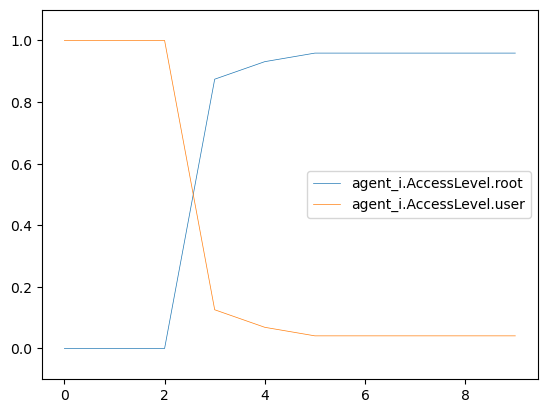

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.567000                  0.433000            Nop   
4                  0.845661                  0.154339            Nop   
5                  0.952176                  0.047824            Nop   
6                  0.962821                  0.037179            Nop   
7                  0.961380                  0.038620            Nop   
8                  0.961339                  0.038661            Nop   
9                  0.961339                  0.038661            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                       file_write  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

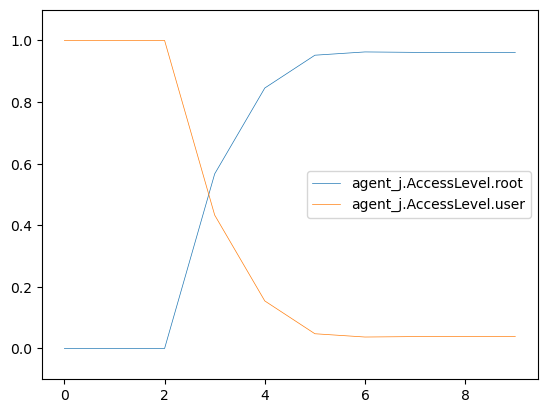

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

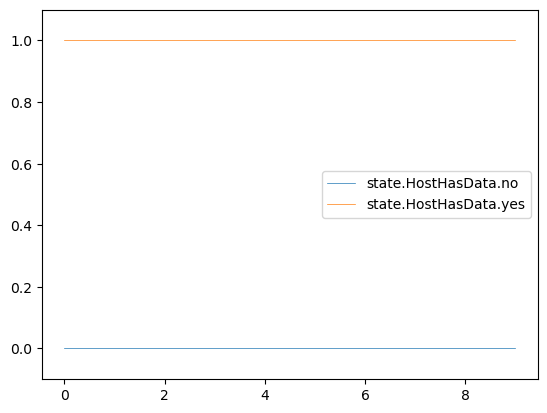

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.189321                 0.810679  ManipulateData   
5                0.000248                 0.999752            Exit   
6                0.000248                 0.999752             Nop   
7                0.000248                 0.999752             Nop   
8                0.000248                 0.999752             Nop   
9                0.000248                 0.999752             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success               acc_policy_change  
2                           failure                            none  
3                           success               acc_policy_change  
4                           success                            none  
5                           success                            none  
6                           failure                            none  
7                           failure                            none  
8                           success                            none  
9                           failure                            none

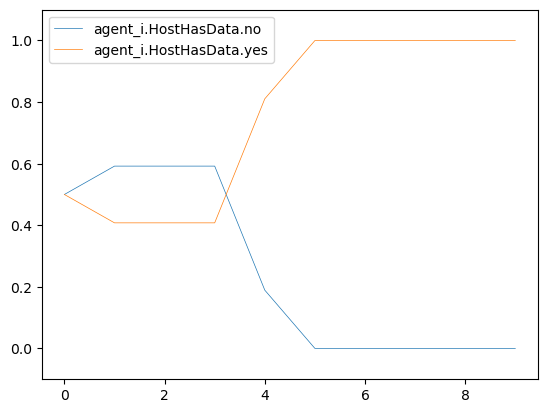

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                       file_write  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

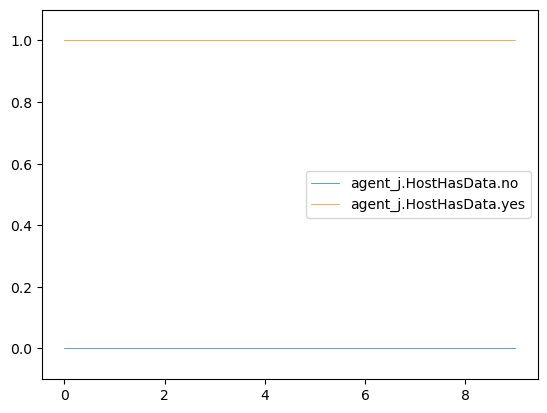

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0      PrivEscAcc            Nop
3                 0.0                  1.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 1.0                  0.0             Nop            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

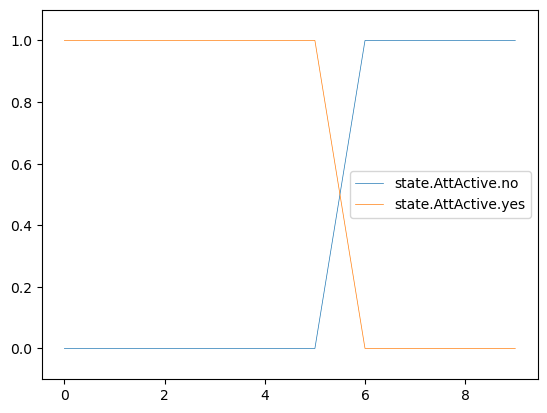

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1               acc_policy_change  
2                            none  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

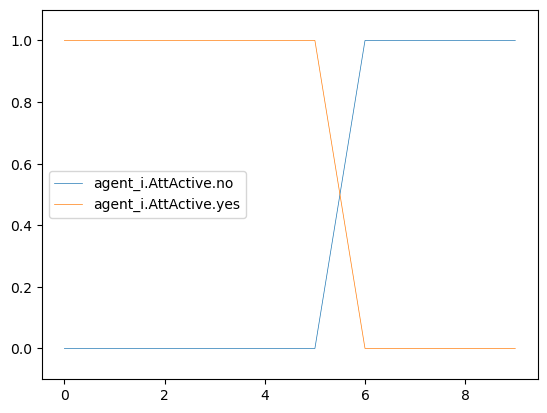

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00   DecoyAccount    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.000100           9.999001e-01            Nop       FileRecon   
4              0.057784           9.422165e-01            Nop  ManipulateData   
5              0.033333           9.666670e-01            Nop            Exit   
6              0.691353           3.086470e-01            Nop             Nop   
7              0.993518           6.482256e-03            Nop             Nop   
8              0.999825           1.748263e-04            Nop             Nop   
9              1.000000           3.637307e-07            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                       file_write  
3                        file_enum  
4                       file_write  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                       file_write

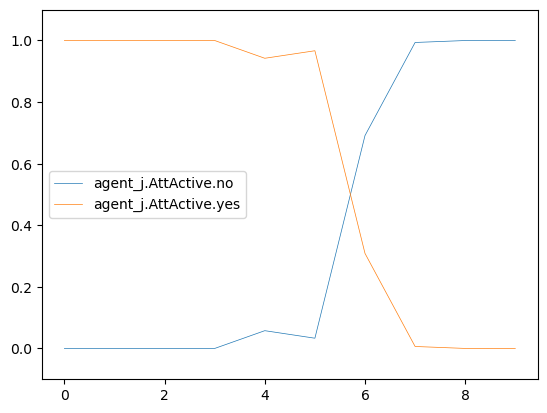

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

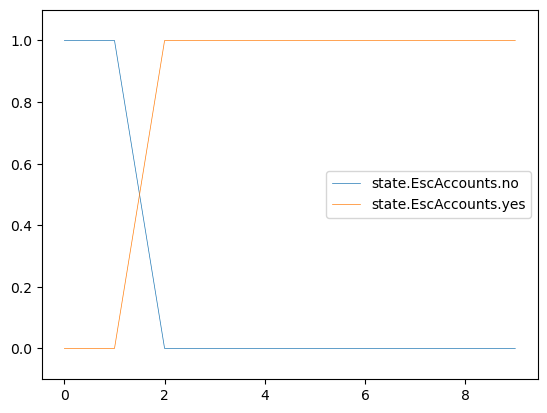

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.083333                 0.916667      PrivEscAcc   
3                0.071318                 0.928682       FileRecon   
4                0.038426                 0.961574  ManipulateData   
5                0.022916                 0.977084            Exit   
6                0.022916                 0.977084             Nop   
7                0.022916                 0.977084             Nop   
8                0.022916                 0.977084             Nop   
9                0.022916                 0.977084             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success               acc_policy_change  
2                           failure                            none  
3                           success               acc_policy_change  
4                           success                            none  
5                           success                            none  
6                           failure                            none  
7                           failure                            none  
8                           success                            none  
9                           failure                            none

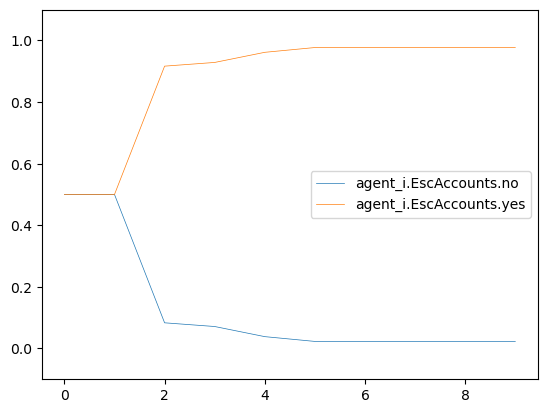

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                       file_write  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

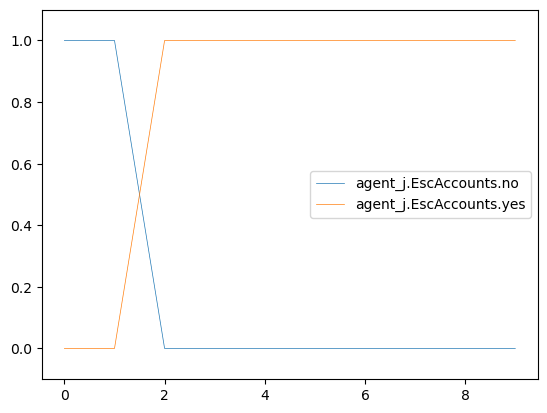

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                0.0                 1.0      PrivEscAcc            Nop
3                0.0                 1.0       FileRecon            Nop
4                0.0                 1.0  ManipulateData            Nop
5                0.0                 1.0            Exit            Nop
6                0.0                 1.0             Nop            Nop
7                0.0                 1.0             Nop            Nop
8                0.0                 1.0             Nop            Nop
9                0.0                 1.0             Nop            Nop

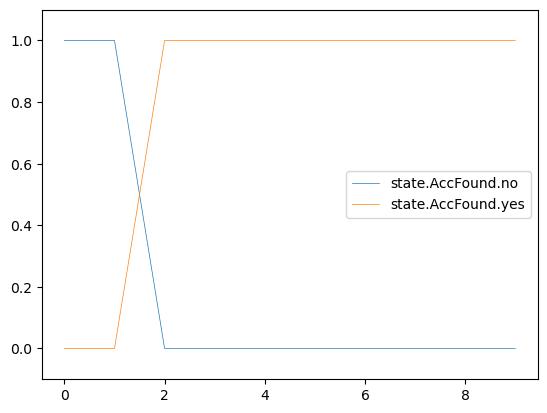

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.125000              0.875000      PrivEscAcc            Nop   
3             0.113531              0.886469       FileRecon            Nop   
4             0.061119              0.938881  ManipulateData            Nop   
5             0.036449              0.963551            Exit            Nop   
6             0.036449              0.963551             Nop            Nop   
7             0.036449              0.963551             Nop            Nop   
8             0.036449              0.963551             Nop            Nop   
9             0.036449              0.963551             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                            none  
1               acc_policy_change  
2                            none  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

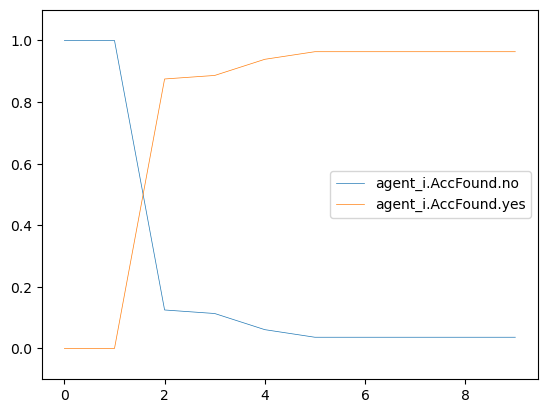

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.370000              0.630000            Nop      PrivEscAcc   
3             0.300070              0.699930            Nop       FileRecon   
4             0.130859              0.869141            Nop  ManipulateData   
5             0.041010              0.958990            Nop            Exit   
6             0.031892              0.968108            Nop             Nop   
7             0.033128              0.966872            Nop             Nop   
8             0.033162              0.966838            Nop             Nop   
9             0.033162              0.966838            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                       file_write  
3                        file_enum  
4                       file_write  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                       file_write

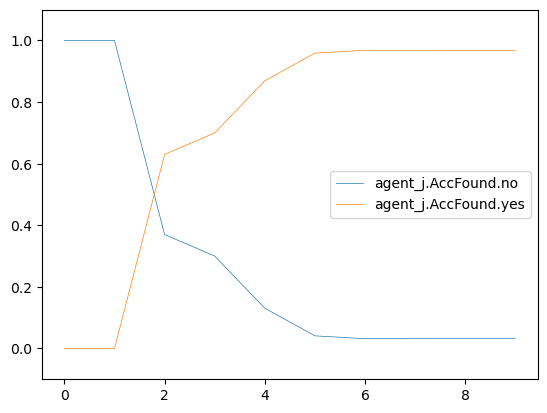

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0      PrivEscAcc            Nop
3                   1.0                   0.0       FileRecon            Nop
4                   1.0                   0.0  ManipulateData            Nop
5                   1.0                   0.0            Exit            Nop
6                   1.0                   0.0             Nop            Nop
7                   1.0                   0.0             Nop            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

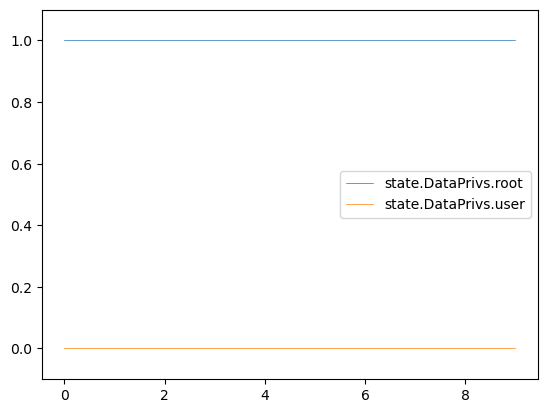

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895      PrivEscAcc   
3                0.592105                0.407895       FileRecon   
4                0.651649                0.348351  ManipulateData   
5                0.679600                0.320400            Exit   
6                0.679600                0.320400             Nop   
7                0.679600                0.320400             Nop   
8                0.679600                0.320400             Nop   
9                0.679600                0.320400             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success               acc_policy_change  
2                           failure                            none  
3                           success               acc_policy_change  
4                           success                            none  
5                           success                            none  
6                           failure                            none  
7                           failure                            none  
8                           success                            none  
9                           failure                            none

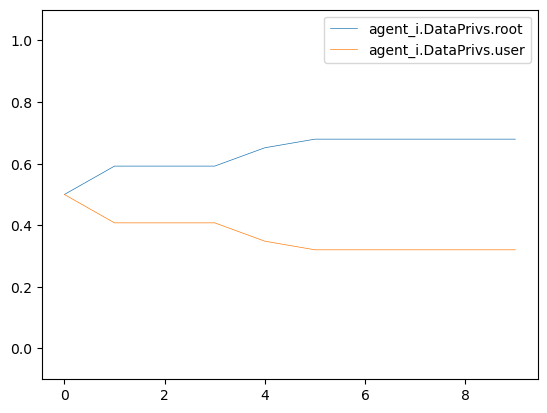

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                       file_write  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

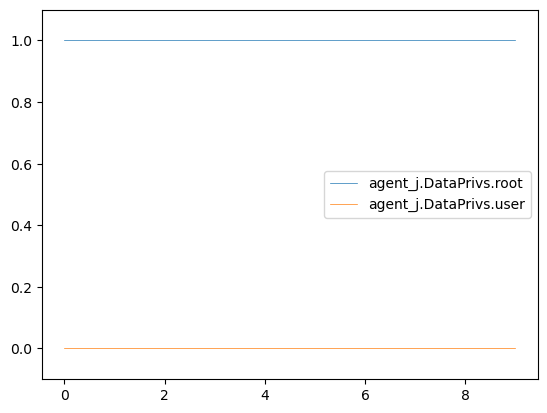

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0       FileRecon   
4                    1.0                     0.0  ManipulateData   
5                    0.0                     1.0            Exit   
6                    0.0                     1.0             Nop   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

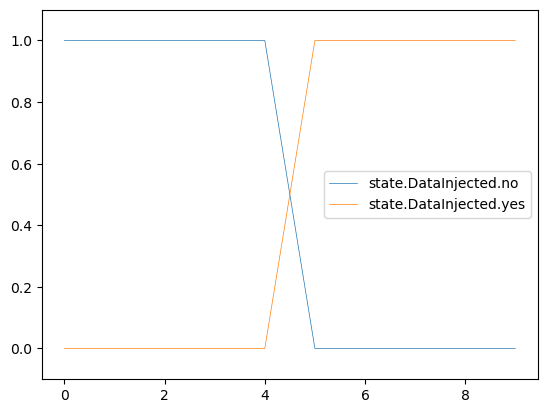

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000307                  0.999693            Exit   
6                 0.000307                  0.999693             Nop   
7                 0.000307                  0.999693             Nop   
8                 0.000307                  0.999693             Nop   
9                 0.000307                  0.999693             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success               acc_policy_change  
2                           failure                            none  
3                           success               acc_policy_change  
4                           success                            none  
5                           success                            none  
6                           failure                            none  
7                           failure                            none  
8                           success                            none  
9                           failure                            none

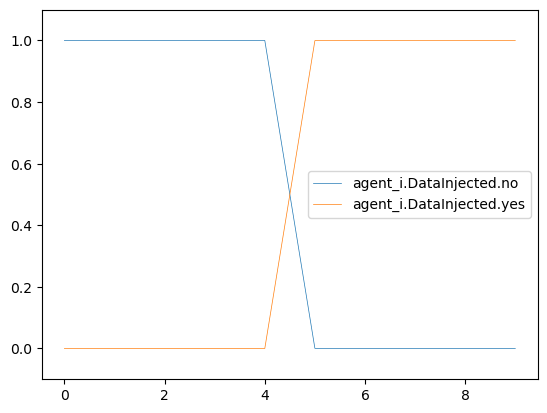

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.156106                  0.843894            Nop   
6                 0.092772                  0.907228            Nop   
7                 0.053563                  0.946437            Nop   
8                 0.052415                  0.947585            Nop   
9                 0.052413                  0.947587            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                       file_write  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

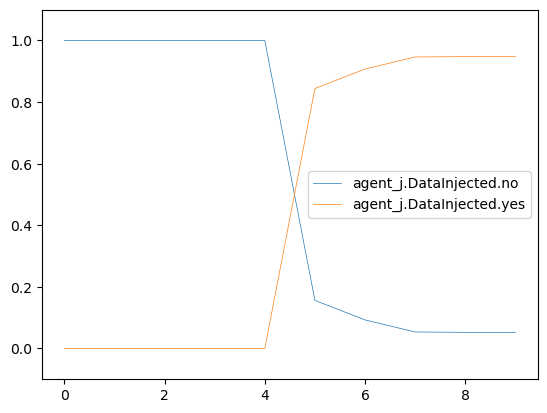

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.577778                        0.422222   
3                         0.472629                        0.527371   
4                         0.485262                        0.514738   
5                         0.491216                        0.508784   
6                         0.491216                        0.508784   
7                         0.491216                        0.508784   
8                         0.491216                        0.508784   
9                         0.491216                        0.508784   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

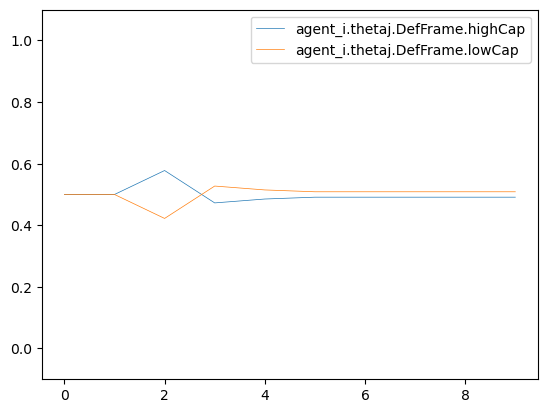

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                   login_activity
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                        file_enum
8                               1.0                             none
9                               1.0                             none

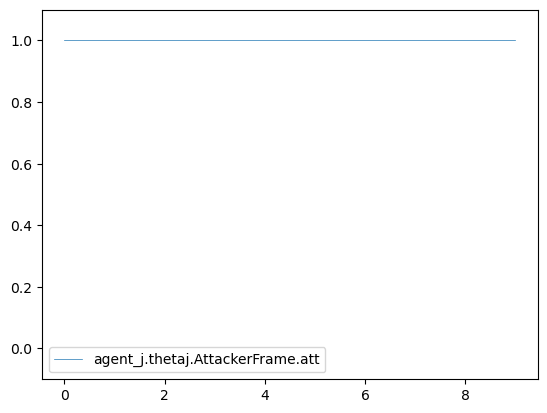

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0      PrivEscAcc            Nop  
3                      1.0       FileRecon            Nop  
4                      1.0  ManipulateData            Nop  
5                      1.0            Exit            Nop  
6                      1.0             Nop            Nop  
7                      1.0             Nop            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

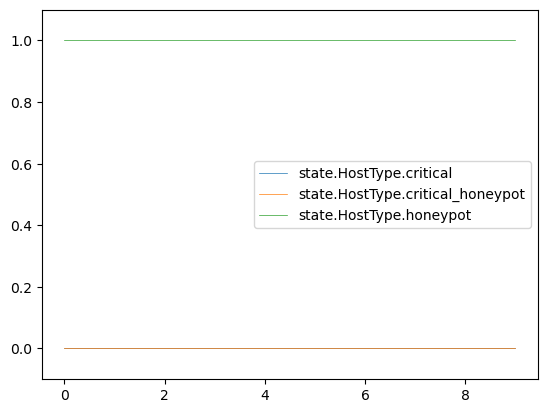

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

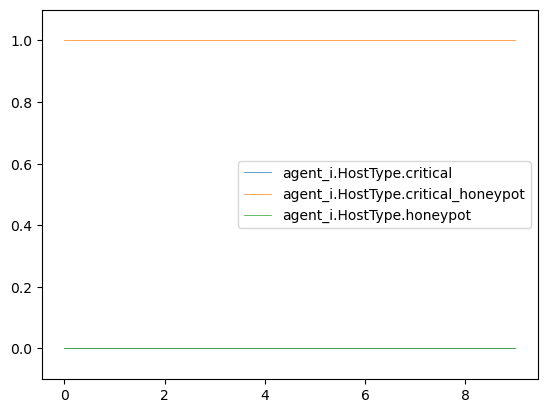

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

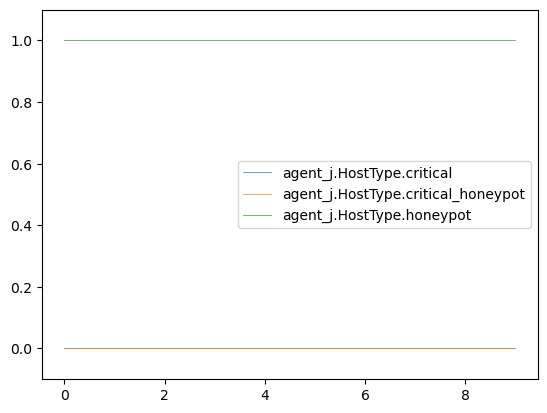

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0      PrivEscAcc            Nop
3                 1.0                  0.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 0.0                  1.0             Nop            Nop
7                 0.0                  1.0             Nop            Nop
8                 0.0                  1.0             Nop            Nop
9                 0.0                  1.0             Nop            Nop

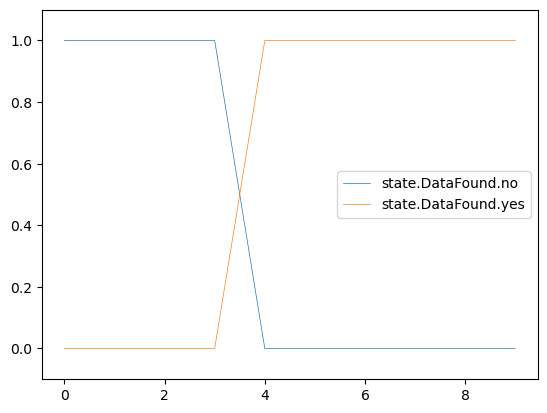

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.234274               0.765726  ManipulateData            Nop   
5              0.000306               0.999694            Exit            Nop   
6              0.000306               0.999694             Nop            Nop   
7              0.000306               0.999694             Nop            Nop   
8              0.000306               0.999694             Nop            Nop   
9              0.000306               0.999694             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

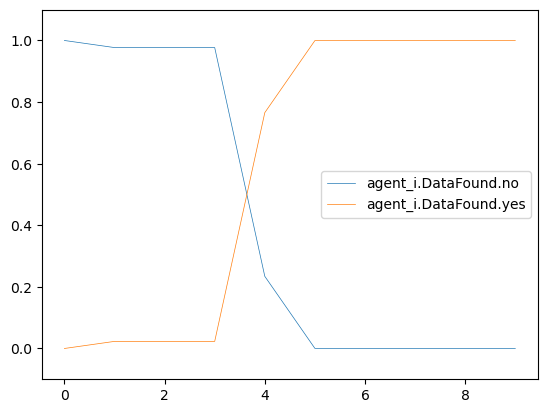

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.579282               0.420718            Nop  ManipulateData   
5              0.177280               0.822720            Nop            Exit   
6              0.139720               0.860280            Nop             Nop   
7              0.138939               0.861061            Nop             Nop   
8              0.138939               0.861061            Nop             Nop   
9              0.138939               0.861061            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

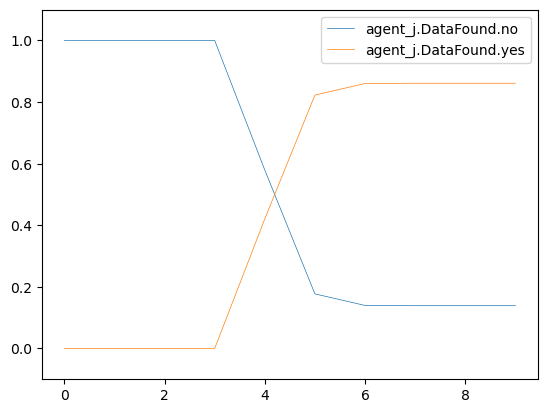

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0      PrivEscAcc   
3                     1.0                     0.0       FileRecon   
4                     1.0                     0.0  ManipulateData   
5                     1.0                     0.0            Exit   
6                     1.0                     0.0             Nop   
7                     1.0                     0.0             Nop   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

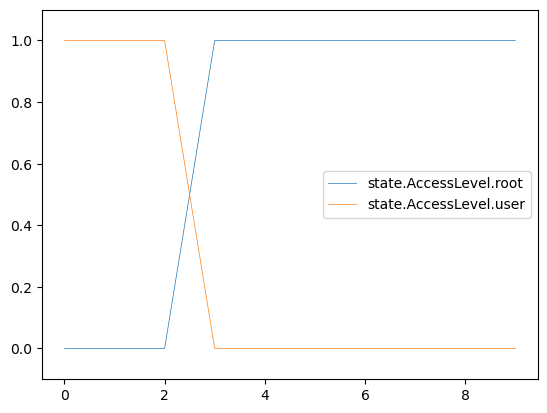

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.874325                  0.125675       FileRecon   
4                  0.932575                  0.067425  ManipulateData   
5                  0.959813                  0.040187            Exit   
6                  0.959813                  0.040187             Nop   
7                  0.959813                  0.040187             Nop   
8                  0.959813                  0.040187             Nop   
9                  0.959813                  0.040187             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                    perms_change  
1                           success                            none  
2                           success                            none  
3                           success                            none  
4                           success                            none  
5                           success                            none  
6                           success                            none  
7                           success                            none  
8                           success                            none  
9                           failure                            none

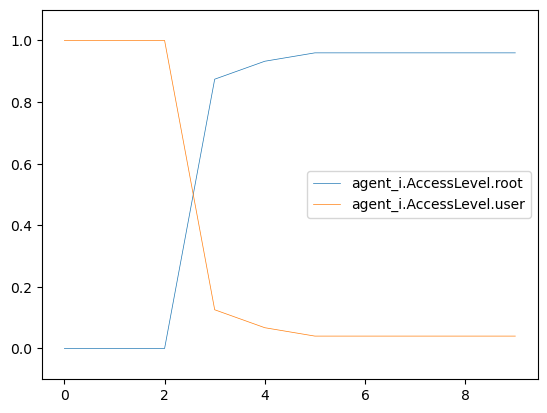

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.199936                  0.800064            Nop   
4                  0.610556                  0.389444            Nop   
5                  0.874747                  0.125253            Nop   
6                  0.863012                  0.136988            Nop   
7                  0.862067                  0.137933            Nop   
8                  0.862067                  0.137933            Nop   
9                  0.862067                  0.137933            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                             none

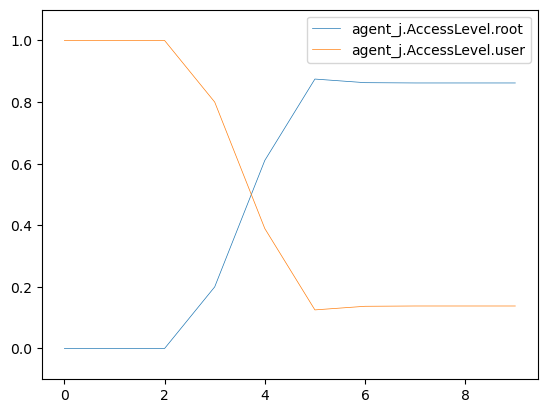

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

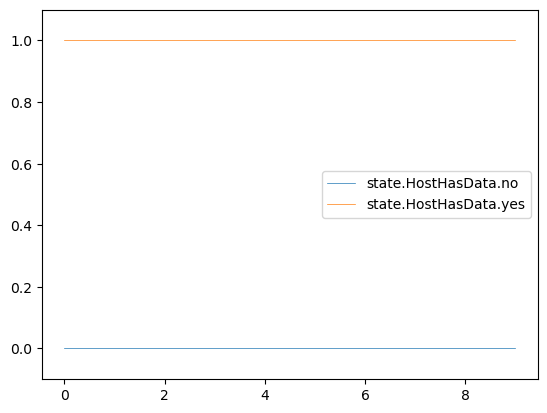

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.189091                 0.810909  ManipulateData   
5                0.000247                 0.999753            Exit   
6                0.000247                 0.999753             Nop   
7                0.000247                 0.999753             Nop   
8                0.000247                 0.999753             Nop   
9                0.000247                 0.999753             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                    perms_change  
1                           success                            none  
2                           success                            none  
3                           success                            none  
4                           success                            none  
5                           success                            none  
6                           success                            none  
7                           success                            none  
8                           success                            none  
9                           failure                            none

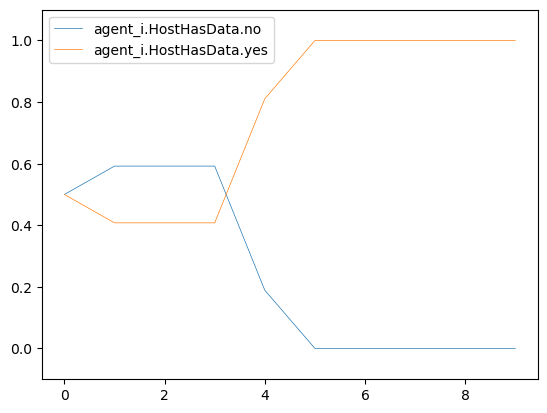

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                             none

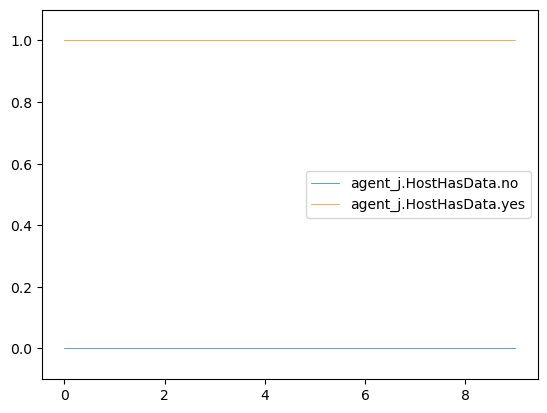

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0      PrivEscAcc            Nop
3                 0.0                  1.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 1.0                  0.0             Nop            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

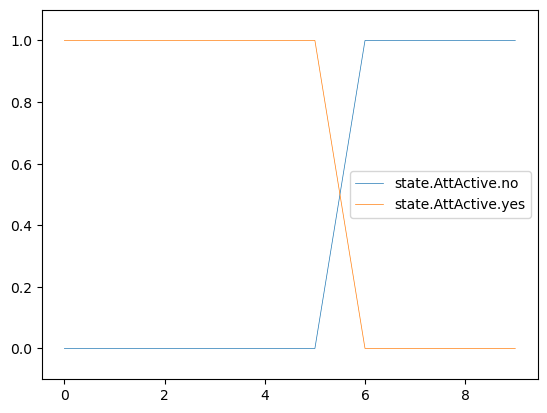

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

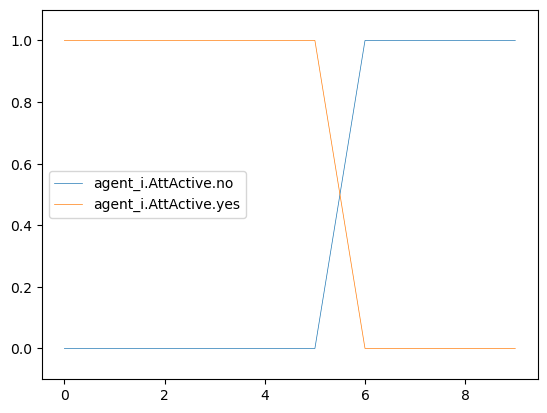

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00   DecoyAccount    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.000005           9.999949e-01            Nop       FileRecon   
4              0.291929           7.080710e-01            Nop  ManipulateData   
5              0.111940           8.880597e-01            Nop            Exit   
6              0.984351           1.564953e-02            Nop             Nop   
7              0.998849           1.150921e-03            Nop             Nop   
8              0.999788           2.115791e-04            Nop             Nop   
9              1.000000           4.560965e-07            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

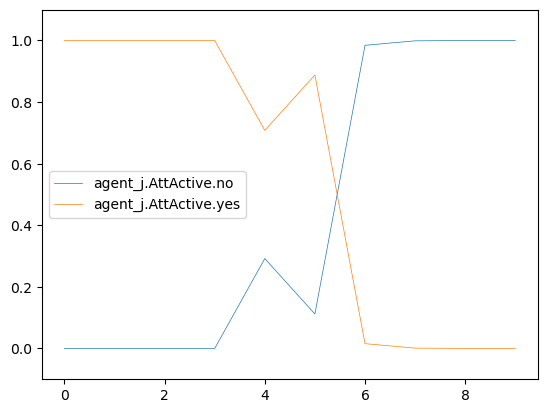

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

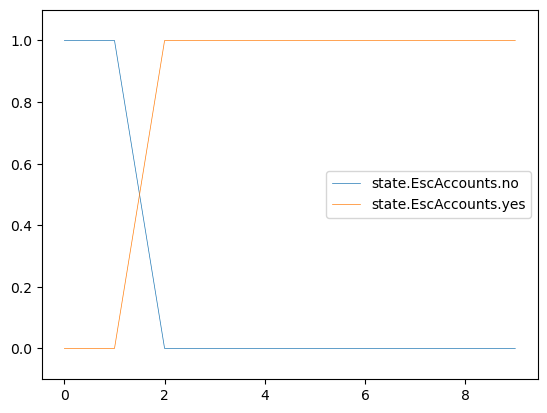

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.083333                 0.916667      PrivEscAcc   
3                0.071318                 0.928682       FileRecon   
4                0.038295                 0.961705  ManipulateData   
5                0.022825                 0.977175            Exit   
6                0.022825                 0.977175             Nop   
7                0.022825                 0.977175             Nop   
8                0.022825                 0.977175             Nop   
9                0.022825                 0.977175             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                    perms_change  
1                           success                            none  
2                           success                            none  
3                           success                            none  
4                           success                            none  
5                           success                            none  
6                           success                            none  
7                           success                            none  
8                           success                            none  
9                           failure                            none

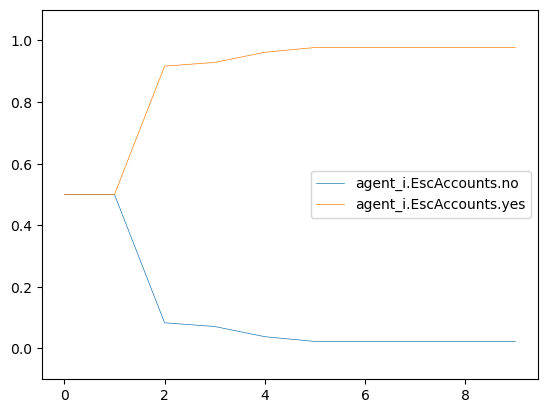

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                             none

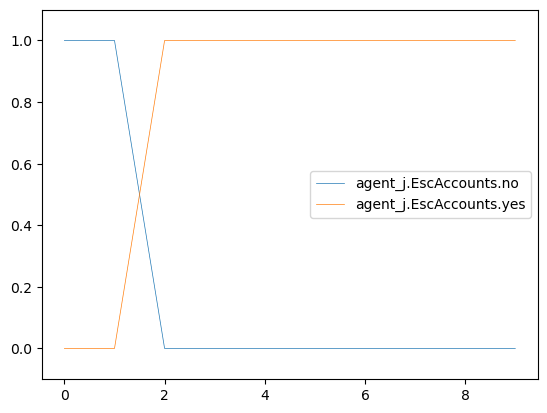

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                0.0                 1.0      PrivEscAcc            Nop
3                0.0                 1.0       FileRecon            Nop
4                0.0                 1.0  ManipulateData            Nop
5                0.0                 1.0            Exit            Nop
6                0.0                 1.0             Nop            Nop
7                0.0                 1.0             Nop            Nop
8                0.0                 1.0             Nop            Nop
9                0.0                 1.0             Nop            Nop

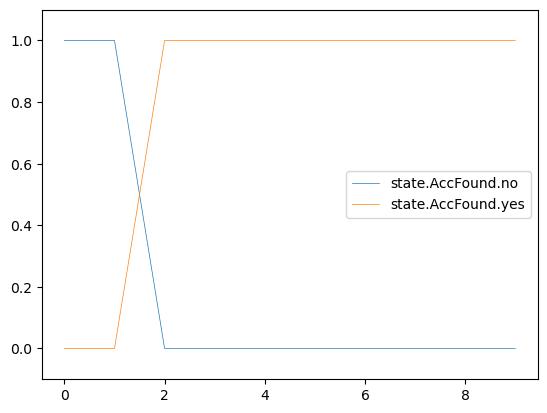

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.125000              0.875000      PrivEscAcc            Nop   
3             0.113531              0.886469       FileRecon            Nop   
4             0.060964              0.939036  ManipulateData            Nop   
5             0.036336              0.963664            Exit            Nop   
6             0.036336              0.963664             Nop            Nop   
7             0.036336              0.963664             Nop            Nop   
8             0.036336              0.963664             Nop            Nop   
9             0.036336              0.963664             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

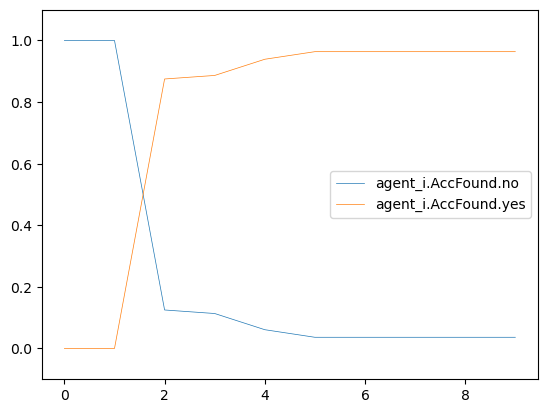

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310938              0.689063            Nop      PrivEscAcc   
3             0.619900              0.380100            Nop       FileRecon   
4             0.315250              0.684750            Nop  ManipulateData   
5             0.102250              0.897750            Nop            Exit   
6             0.111826              0.888174            Nop             Nop   
7             0.112598              0.887402            Nop             Nop   
8             0.112597              0.887403            Nop             Nop   
9             0.112598              0.887403            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

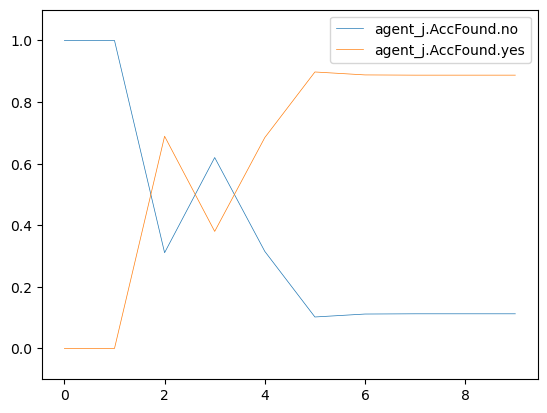

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0      PrivEscAcc            Nop
3                   1.0                   0.0       FileRecon            Nop
4                   1.0                   0.0  ManipulateData            Nop
5                   1.0                   0.0            Exit            Nop
6                   1.0                   0.0             Nop            Nop
7                   1.0                   0.0             Nop            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

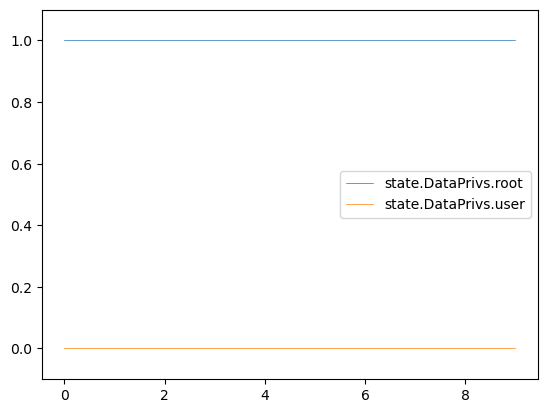

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895      PrivEscAcc   
3                0.592105                0.407895       FileRecon   
4                0.652072                0.347928  ManipulateData   
5                0.680171                0.319829            Exit   
6                0.680171                0.319829             Nop   
7                0.680171                0.319829             Nop   
8                0.680171                0.319829             Nop   
9                0.680171                0.319829             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                    perms_change  
1                           success                            none  
2                           success                            none  
3                           success                            none  
4                           success                            none  
5                           success                            none  
6                           success                            none  
7                           success                            none  
8                           success                            none  
9                           failure                            none

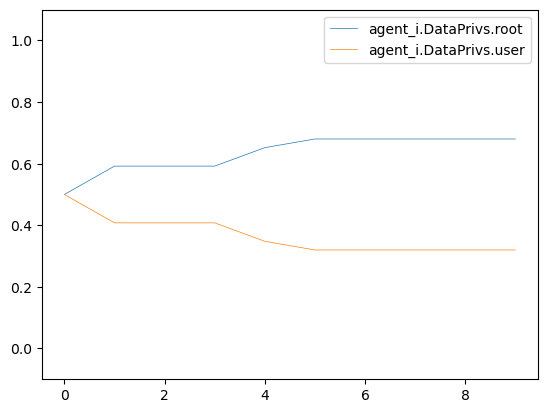

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                             none

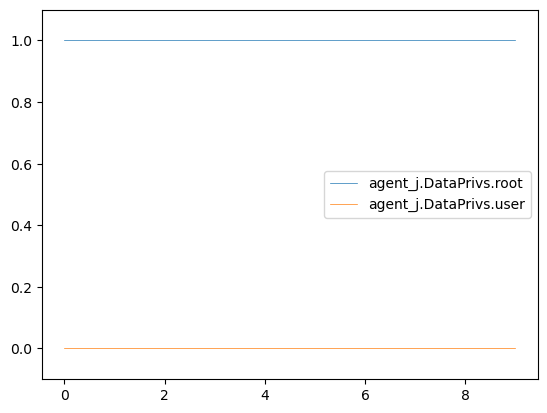

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0       FileRecon   
4                    1.0                     0.0  ManipulateData   
5                    0.0                     1.0            Exit   
6                    0.0                     1.0             Nop   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

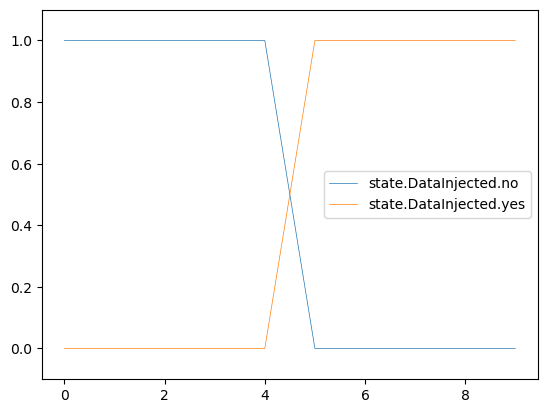

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000306                  0.999694            Exit   
6                 0.000306                  0.999694             Nop   
7                 0.000306                  0.999694             Nop   
8                 0.000306                  0.999694             Nop   
9                 0.000306                  0.999694             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                    perms_change  
1                           success                            none  
2                           success                            none  
3                           success                            none  
4                           success                            none  
5                           success                            none  
6                           success                            none  
7                           success                            none  
8                           success                            none  
9                           failure                            none

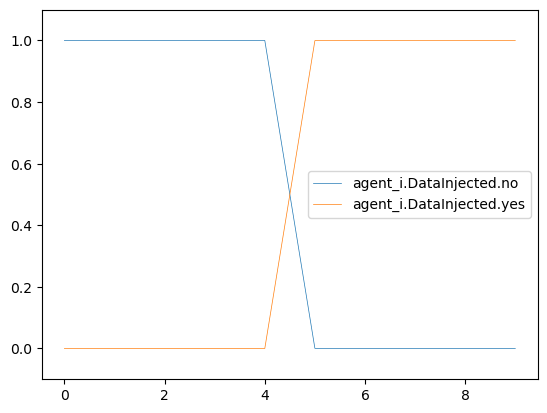

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.224729                  0.775271            Nop   
6                 0.145988                  0.854012            Nop   
7                 0.139386                  0.860614            Nop   
8                 0.139190                  0.860809            Nop   
9                 0.139188                  0.860812            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                             none

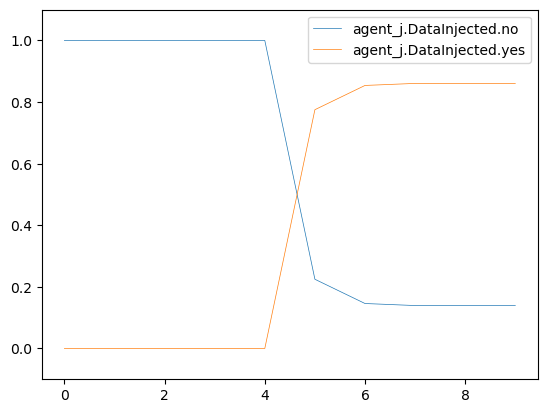

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.577778                        0.422222   
3                         0.472629                        0.527371   
4                         0.466764                        0.533236   
5                         0.463273                        0.536727   
6                         0.461911                        0.538089   
7                         0.461911                        0.538089   
8                         0.461911                        0.538089   
9                         0.461911                        0.538089   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

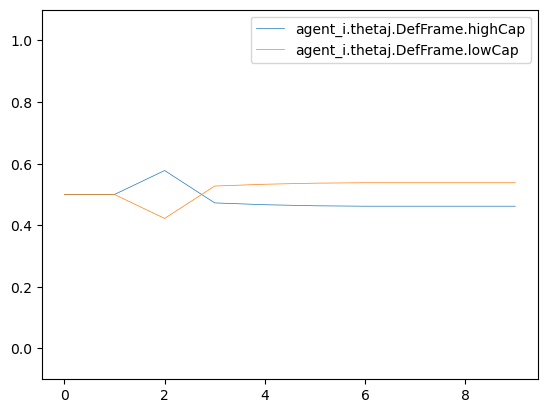

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                             none
3                               1.0                       file_write
4                               1.0                        file_enum
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                   login_activity

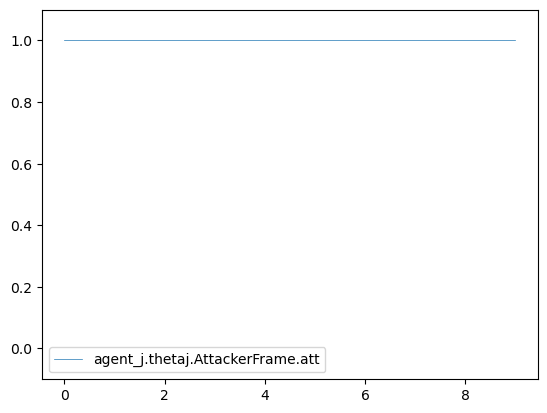

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0      FileRecon            Nop  
1                      1.0   EnumAccounts   DecoyAccount  
2                      1.0     PrivEscAcc            Nop  
3                      1.0      FileRecon            Nop  
4                      1.0      FileRecon            Nop  
5                      1.0      FileRecon            Nop  
6                      1.0           Exit            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

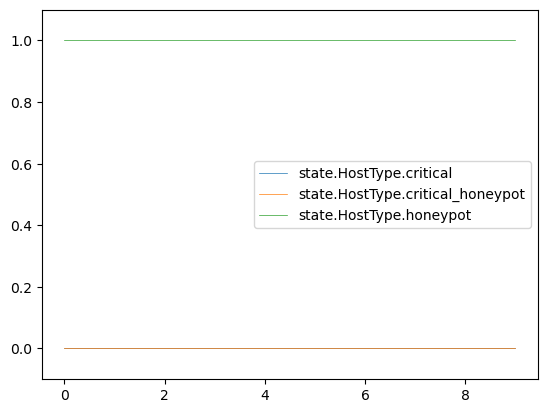

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        0.0      FileRecon            Nop   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0     PrivEscAcc            Nop   
3                        0.0      FileRecon            Nop   
4                        0.0      FileRecon            Nop   
5                        0.0      FileRecon            Nop   
6                        0.0           Exit            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

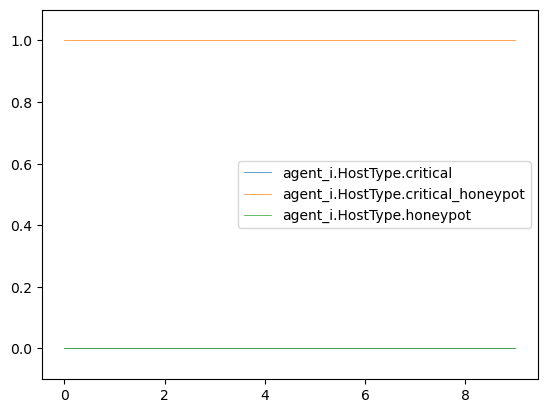

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        1.0            Nop      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0            Nop     PrivEscAcc   
3                        1.0            Nop      FileRecon   
4                        1.0            Nop      FileRecon   
5                        1.0            Nop      FileRecon   
6                        1.0            Nop           Exit   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                       file_write  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                   login_activity

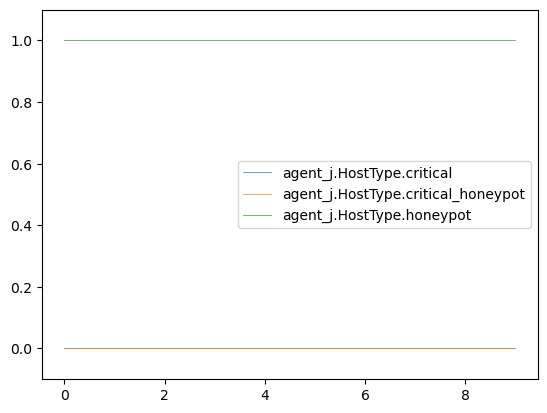

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0      FileRecon            Nop
1                 1.0                  0.0   EnumAccounts   DecoyAccount
2                 1.0                  0.0     PrivEscAcc            Nop
3                 1.0                  0.0      FileRecon            Nop
4                 1.0                  0.0      FileRecon            Nop
5                 1.0                  0.0      FileRecon            Nop
6                 1.0                  0.0           Exit            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

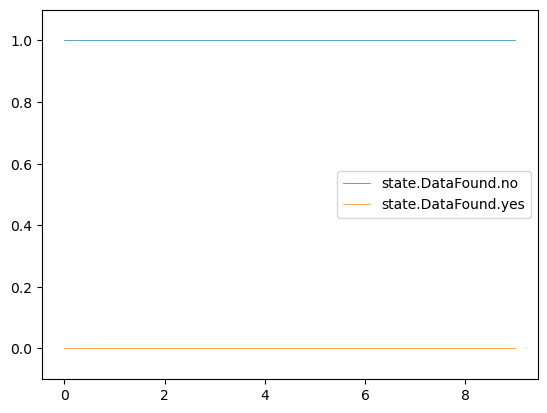

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.976974               0.023026   EnumAccounts   DecoyAccount   
2              0.976974               0.023026     PrivEscAcc            Nop   
3              0.976974               0.023026      FileRecon            Nop   
4              0.961213               0.038787      FileRecon            Nop   
5              0.983032               0.016968      FileRecon            Nop   
6              0.994239               0.005761           Exit            Nop   
7              0.994239               0.005761            Nop            Nop   
8              0.994239               0.005761            Nop            Nop   
9              0.994239               0.005761            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

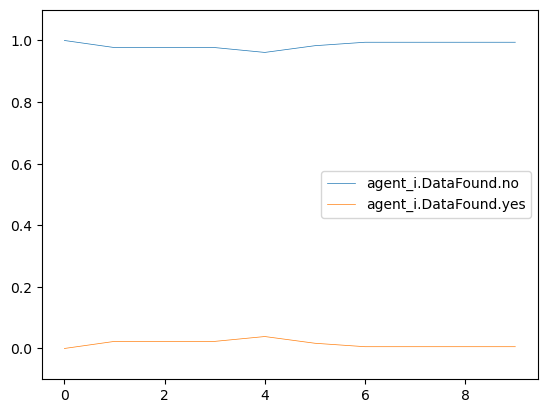

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000   DecoyAccount   EnumAccounts   
2              1.000000               0.000000            Nop     PrivEscAcc   
3              1.000000               0.000000            Nop      FileRecon   
4              0.638515               0.361485            Nop      FileRecon   
5              0.381752               0.618248            Nop      FileRecon   
6              0.500435               0.499565            Nop           Exit   
7              0.516830               0.483171            Nop            Nop   
8              0.516906               0.483094            Nop            Nop   
9              0.516902               0.483098            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                       file_write  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                   login_activity

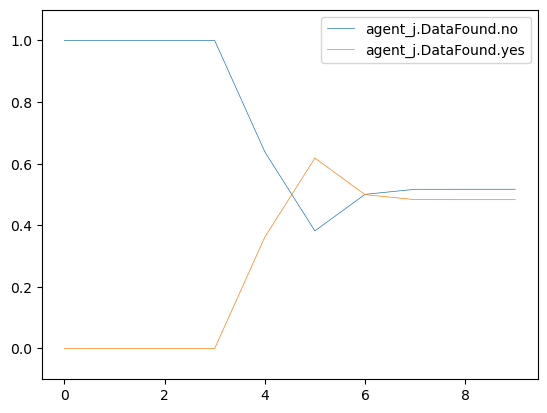

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0      FileRecon   
1                     0.0                     1.0   EnumAccounts   
2                     0.0                     1.0     PrivEscAcc   
3                     0.0                     1.0      FileRecon   
4                     0.0                     1.0      FileRecon   
5                     0.0                     1.0      FileRecon   
6                     0.0                     1.0           Exit   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

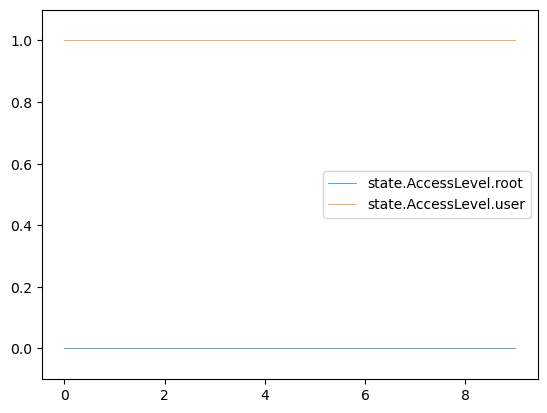

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000      FileRecon   
1                  0.000000                  1.000000   EnumAccounts   
2                  0.000000                  1.000000     PrivEscAcc   
3                  0.874325                  0.125675      FileRecon   
4                  0.847946                  0.152054      FileRecon   
5                  0.831976                  0.168024      FileRecon   
6                  0.825747                  0.174253           Exit   
7                  0.825747                  0.174253            Nop   
8                  0.825747                  0.174253            Nop   
9                  0.825747                  0.174253            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           failure                            none  
4                           failure                            none  
5                           failure                            none  
6                           success                            none  
7                           failure                            none  
8                           failure                            none  
9                           success                            none

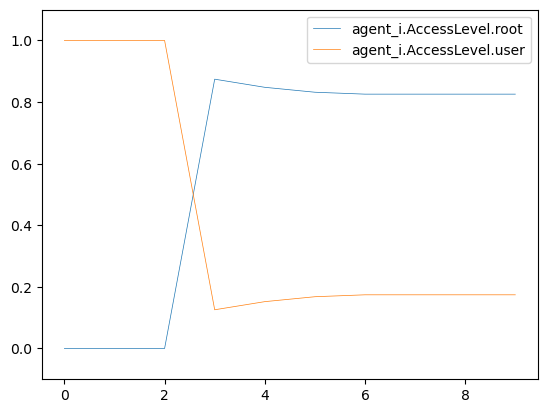

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.620098                  0.379902            Nop   
4                  0.524596                  0.475404            Nop   
5                  0.772875                  0.227125            Nop   
6                  0.516982                  0.483019            Nop   
7                  0.498668                  0.501332            Nop   
8                  0.498580                  0.501420            Nop   
9                  0.498584                  0.501416            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                             none  
3      FileRecon                       file_write  
4      FileRecon                        file_enum  
5      FileRecon                             none  
6           Exit                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

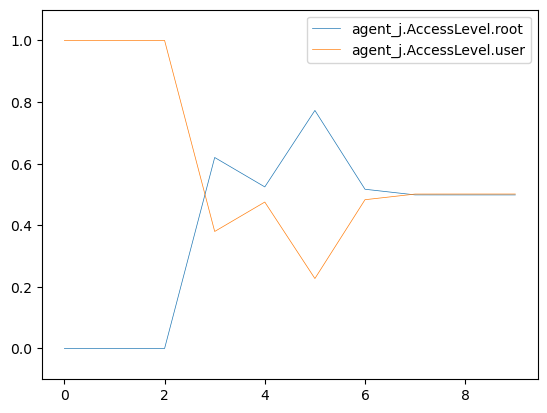

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0      FileRecon            Nop
1                   0.0                    1.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0     PrivEscAcc            Nop
3                   0.0                    1.0      FileRecon            Nop
4                   0.0                    1.0      FileRecon            Nop
5                   0.0                    1.0      FileRecon            Nop
6                   0.0                    1.0           Exit            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

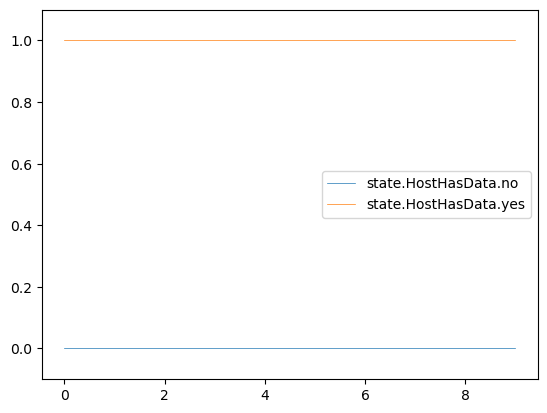

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.592105                 0.407895   EnumAccounts   
2                0.592105                 0.407895     PrivEscAcc   
3                0.592105                 0.407895      FileRecon   
4                0.775833                 0.224167      FileRecon   
5                0.881148                 0.118852      FileRecon   
6                0.921759                 0.078241           Exit   
7                0.921759                 0.078241            Nop   
8                0.921759                 0.078241            Nop   
9                0.921759                 0.078241            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           failure                            none  
4                           failure                            none  
5                           failure                            none  
6                           success                            none  
7                           failure                            none  
8                           failure                            none  
9                           success                            none

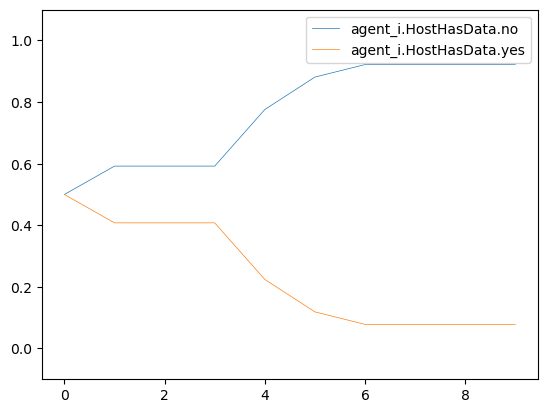

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                             none  
3      FileRecon                       file_write  
4      FileRecon                        file_enum  
5      FileRecon                             none  
6           Exit                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

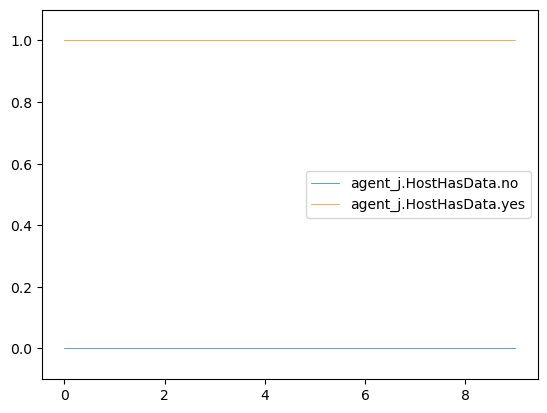

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0      FileRecon            Nop
1                 0.0                  1.0   EnumAccounts   DecoyAccount
2                 0.0                  1.0     PrivEscAcc            Nop
3                 0.0                  1.0      FileRecon            Nop
4                 0.0                  1.0      FileRecon            Nop
5                 0.0                  1.0      FileRecon            Nop
6                 0.0                  1.0           Exit            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

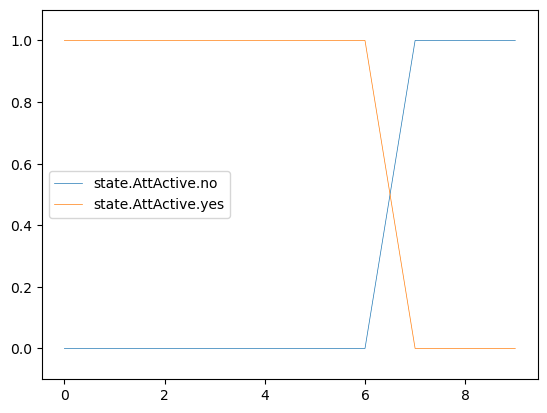

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0     PrivEscAcc            Nop   
3                   0.0                    1.0      FileRecon            Nop   
4                   0.0                    1.0      FileRecon            Nop   
5                   0.0                    1.0      FileRecon            Nop   
6                   0.0                    1.0           Exit            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

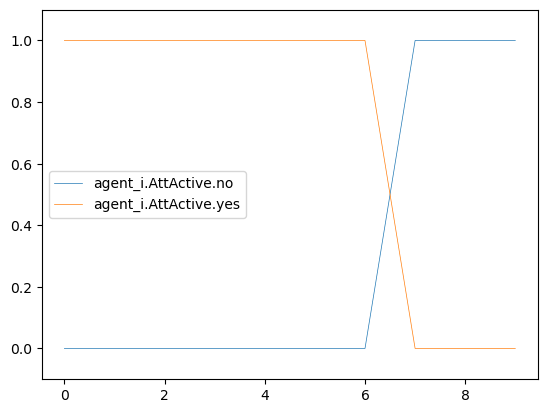

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0              0.000000               1.000000            Nop      FileRecon   
1              0.000000               1.000000   DecoyAccount   EnumAccounts   
2              0.000000               1.000000            Nop     PrivEscAcc   
3              0.000109               0.999891            Nop      FileRecon   
4              0.250917               0.749083            Nop      FileRecon   
5              0.224459               0.775541            Nop      FileRecon   
6              0.811948               0.188052            Nop           Exit   
7              0.993680               0.006320            Nop            Nop   
8              0.999971               0.000029            Nop            Nop   
9              0.999991               0.000009            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                       file_write  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                   login_activity

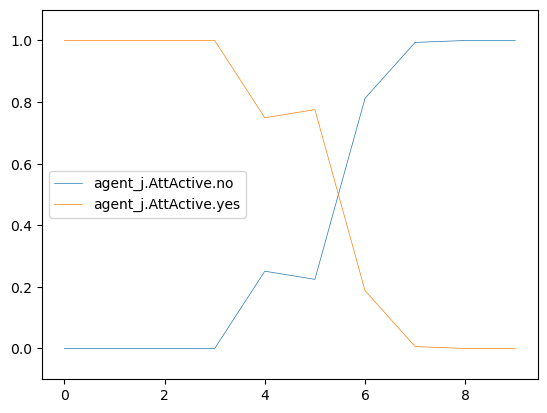

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0     PrivEscAcc            Nop
3                   0.0                    1.0      FileRecon            Nop
4                   0.0                    1.0      FileRecon            Nop
5                   0.0                    1.0      FileRecon            Nop
6                   0.0                    1.0           Exit            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

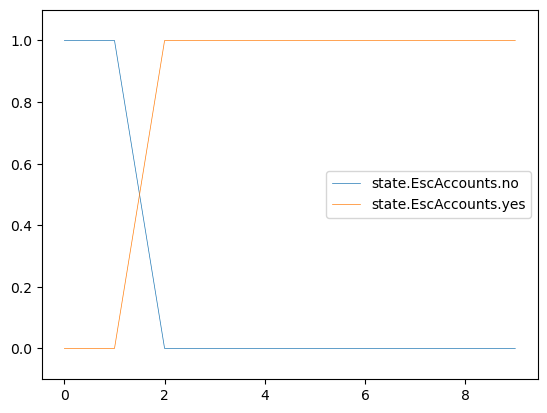

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.083333                 0.916667     PrivEscAcc   
3                0.071318                 0.928682      FileRecon   
4                0.086361                 0.913639      FileRecon   
5                0.095432                 0.904568      FileRecon   
6                0.098970                 0.901030           Exit   
7                0.098970                 0.901030            Nop   
8                0.098970                 0.901030            Nop   
9                0.098970                 0.901030            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           failure                            none  
4                           failure                            none  
5                           failure                            none  
6                           success                            none  
7                           failure                            none  
8                           failure                            none  
9                           success                            none

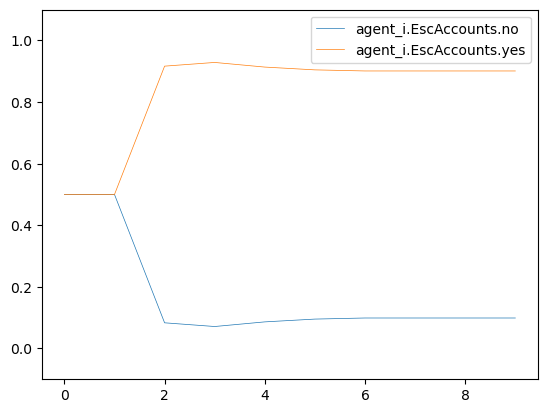

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                             none  
3      FileRecon                       file_write  
4      FileRecon                        file_enum  
5      FileRecon                             none  
6           Exit                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

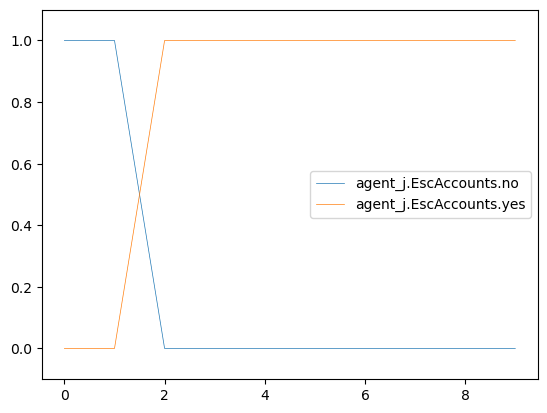

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0      FileRecon            Nop
1                1.0                 0.0   EnumAccounts   DecoyAccount
2                1.0                 0.0     PrivEscAcc            Nop
3                1.0                 0.0      FileRecon            Nop
4                1.0                 0.0      FileRecon            Nop
5                1.0                 0.0      FileRecon            Nop
6                1.0                 0.0           Exit            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

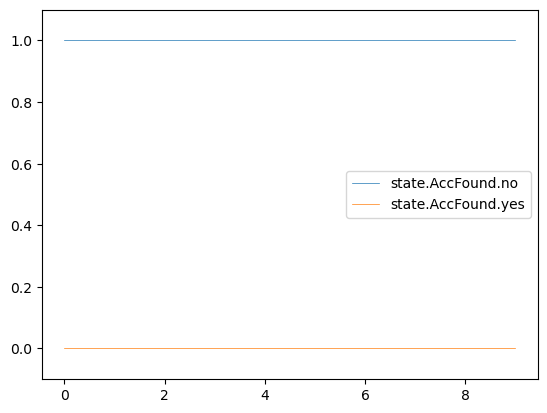

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.125000              0.875000     PrivEscAcc            Nop   
3             0.113531              0.886469      FileRecon            Nop   
4             0.137484              0.862516      FileRecon            Nop   
5             0.151924              0.848076      FileRecon            Nop   
6             0.157557              0.842443           Exit            Nop   
7             0.157557              0.842443            Nop            Nop   
8             0.157557              0.842443            Nop            Nop   
9             0.157557              0.842443            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

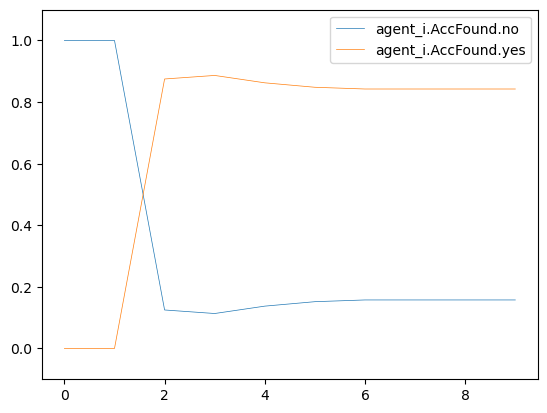

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.310938              0.689063            Nop     PrivEscAcc   
3             0.300077              0.699923            Nop      FileRecon   
4             0.382689              0.617311            Nop      FileRecon   
5             0.183060              0.816940            Nop      FileRecon   
6             0.389233              0.610767            Nop           Exit   
7             0.403990              0.596010            Nop            Nop   
8             0.404061              0.595939            Nop            Nop   
9             0.404058              0.595942            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                       file_write  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                   login_activity

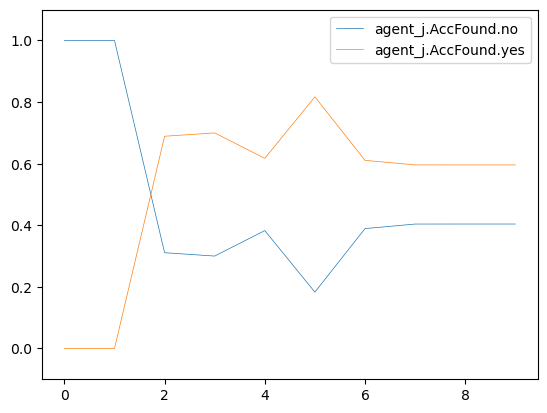

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0      FileRecon            Nop
1                   1.0                   0.0   EnumAccounts   DecoyAccount
2                   1.0                   0.0     PrivEscAcc            Nop
3                   1.0                   0.0      FileRecon            Nop
4                   1.0                   0.0      FileRecon            Nop
5                   1.0                   0.0      FileRecon            Nop
6                   1.0                   0.0           Exit            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

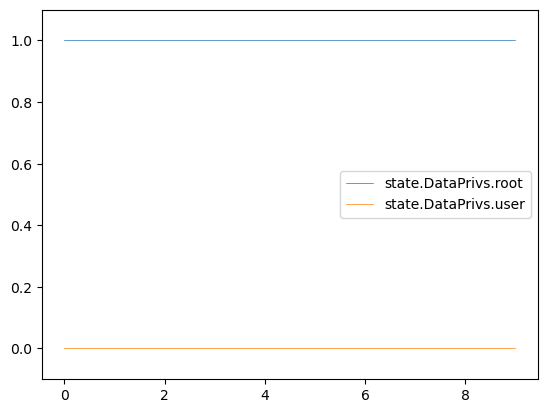

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000      FileRecon   
1                0.592105                0.407895   EnumAccounts   
2                0.592105                0.407895     PrivEscAcc   
3                0.592105                0.407895      FileRecon   
4                0.564767                0.435233      FileRecon   
5                0.542882                0.457119      FileRecon   
6                0.533879                0.466121           Exit   
7                0.533879                0.466121            Nop   
8                0.533879                0.466121            Nop   
9                0.533879                0.466121            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           failure                            none  
4                           failure                            none  
5                           failure                            none  
6                           success                            none  
7                           failure                            none  
8                           failure                            none  
9                           success                            none

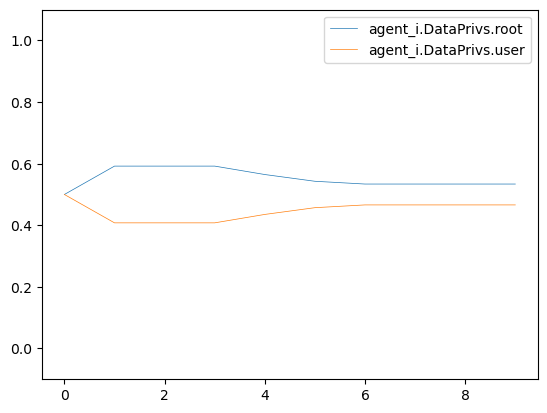

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                             none  
3      FileRecon                       file_write  
4      FileRecon                        file_enum  
5      FileRecon                             none  
6           Exit                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

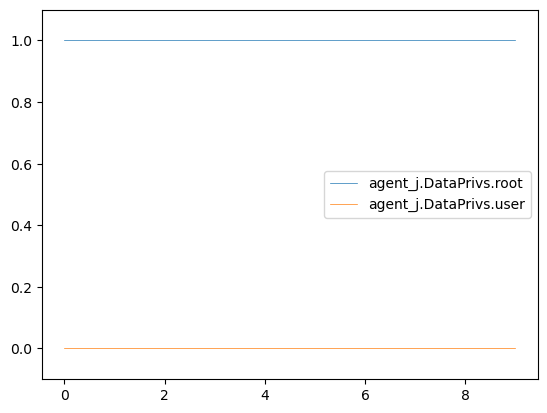

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0      FileRecon            Nop
1                    1.0                     0.0   EnumAccounts   DecoyAccount
2                    1.0                     0.0     PrivEscAcc            Nop
3                    1.0                     0.0      FileRecon            Nop
4                    1.0                     0.0      FileRecon            Nop
5                    1.0                     0.0      FileRecon            Nop
6                    1.0                     0.0           Exit            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

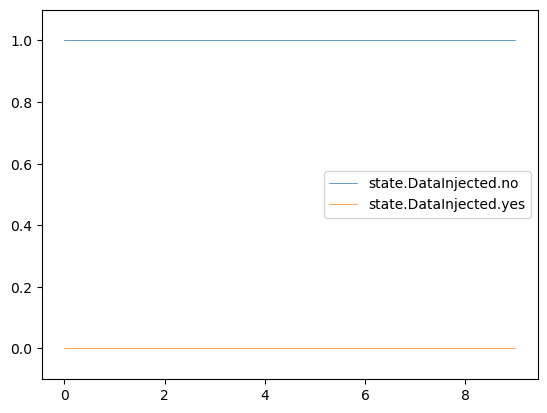

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0     PrivEscAcc   
3                      1.0                       0.0      FileRecon   
4                      1.0                       0.0      FileRecon   
5                      1.0                       0.0      FileRecon   
6                      1.0                       0.0           Exit   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.DefenseObs'  
0                           failure                            none  
1                           success                            none  
2                           failure                            none  
3                           failure                            none  
4                           failure                            none  
5                           failure                            none  
6                           success                            none  
7                           failure                            none  
8                           failure                            none  
9                           success                            none

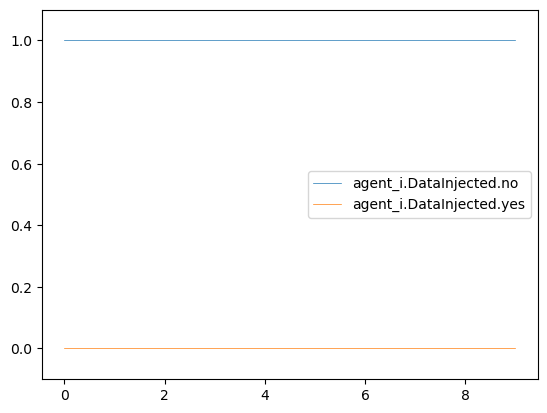

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.845374                  0.154626            Nop   
6                 0.544329                  0.455671            Nop   
7                 0.521244                  0.478756            Nop   
8                 0.521135                  0.478865            Nop   
9                 0.521130                  0.478870            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                             none  
3      FileRecon                       file_write  
4      FileRecon                        file_enum  
5      FileRecon                             none  
6           Exit                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

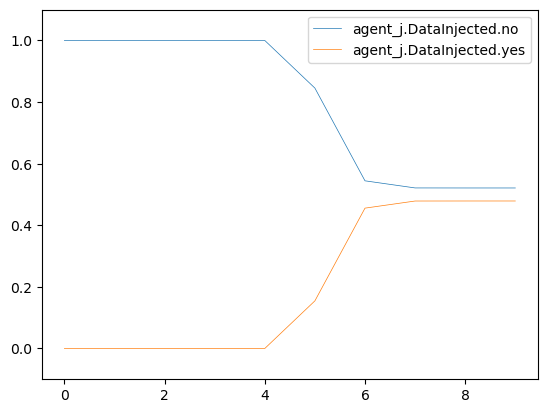

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    